In [1]:
import pandas as pd
import Lindel, os, sys
from Lindel.Predictor import * 
import pickle
from tqdm import tqdm
os.getcwd()

'/cluster/JideEzike/ShendureBioxrv_CrispPred/Lindel'

In [ ]:
#Same pipeline can be used for Cho cells; just replace sampled target sequences: sampled_oligos_RPE.txt with "Sampled_test_Oligos_modified.txt"

#and path for collcting mutational profile ground truth data from: '/cluster/JideEzike/ShendureBioxrv_CrispPred/Lindel/ST_Feb_2018_RPE1_500x_7B_DPI7_dec'
#to ''/cluster/JideEzike/ShendureBioxrv_CrispPred/Lindel/ST_June_2017_CHO_LV7A_DPI7/ST_June_2017_CHO_LV7A_DPI7'

#Lastly replace trial03_RPE_actual_mutation_frequencies.txt with trial03_actual_mutation_frequencies.txt

#mutational profile data found from Lindel/Leopold et al. paper: https://figshare.com/articles/processed_mutational_profiles/7312067

In [2]:
#collect_ground_truth("/cluster/JideEzike/ShendureBioxrv_CrispPred/Lindel/ST_Feb_2018_RPE1_500x_7B_DPI7_dec/",'Oligo78358')

In [6]:
#collect_ground_truth("/cluster/JideEzike/ShendureBioxrv_CrispPred/Lindel/ST_June_2017_CHO_LV7A_DPI7/ST_June_2017_CHO_LV7A_DPI7/",'Oligo31918')
#generate data frame out of sampled oligo target sequences
RPE_sample_modified=pd.read_csv("sampled_oligos_RPE.txt", sep="\t")
RPE_sample_modified
Filtered_RPE_sample_modified=(RPE_sample_modified[['ID','Guide Sequence','TargetSequence','PAM Index','Strand']])
Filtered_RPE_sample_modified[['ID','TargetSequence','PAM Index','Strand']]
Filtered_RPE_sample_modified

In [61]:
#Truncating RPE1 target sequences to be amenable for Shendure model, setting PAM to start at index 33: 

for i in tqdm(range(Filtered_RPE_sample_modified.shape[0])):
    Filtered_RPE_sample_modified['TargetSequence'][i]=Filtered_RPE_sample_modified['TargetSequence'][i][Filtered_RPE_sample_modified['PAM Index'][i]-33:]
    Filtered_RPE_sample_modified['PAM Index'][i]=33


  0%|          | 0/3000 [00:00<?, ?it/s]/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

In [8]:
#write modified sequences to file; visualize data frame of modified target sequences

#Filtered_RPE_sample_modified.to_csv('sampled_oligos_modified_RPE.txt',sep='\t')

Filtered_RPE_sample_modified1=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")
Filtered_RPE_sample_modified1


,Unnamed: 0,ID,Guide Sequence,TargetSequence,PAM Index,Strand
0,0,Oligo28402,GATTCTATATTGAGTTGCGG,GTTCTAACATAATCATTCTATATTGAGTTGCGGAGGGGTAATTGTT...,33,FORWARD
1,1,Oligo16058,GCCACTTTCAGACAGACCCG,AGGCAATCGTGGGGCCACTTTCAGACAGACCCGAGGTGGTTTAGTA...,33,FORWARD
2,2,Oligo78358,GCGGCGTGTGGCCAACGCCA,TGGTGCTGGAGCGGCGGCGTGTGGCCAACGCCAAGGAGCGTGAGCG...,33,FORWARD
3,3,Oligo10077,GAACGTCAGTCGTTTCGCAG,CCACCGTTCTGTGCAACGTCAGTCGTTTCGCAGGGGCTGCTATCAA...,33,FORWARD
4,4,Oligo25298,GGCTACATTTGACACTCAAC,ACCGCCAGTTTCGTGCTACATTTGACACTCAACTGGTCACCTACCC...,33,FORWARD
5,5,Oligo78292,GGCTTGTGCAAAACCAACTG,GTGCGGCGCCAGCGGCTTGTGCAAAACCAACTGTGGCGTGTGCTGC...,33,FORWARD
6,6,Oligo49261,GTAGTTACAGTTAACTTAGC,ATGCTGACAAACTTTAGTTACAGTTAACTTAGCCGGCCGTCCTCTT...,33,FORWARD
7,7,Oligo84204,GAACACTTACAGATTCCCGA,ATATCTATAAGGTTAACACTTACAGATTCCCGAAGGTACCCCTGCC...,33,FORWARD
8,8,Oligo32259,GAGTACATTTCGCTTAAAGT,AGCTGTTATCATTGAGTACATTTCGCTTAAAGTGGGTCTACATTTC...,33,FORWARD
9,9,Oligo762,GGAAATTTAGCGAGAGACTG,AAAACTTCGTACCGGAAATTTAGCGAGAGACTGTGGTACGTTGAGG...,33,FORWARD


In [10]:
Filtered_RPE_sample_modified1['ID'][0]

def get_target_sequence(Oligo_ID):
    Modified_Input=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")
    Modified_Input.set_index('ID', inplace=True)
    pr=Modified_Input.loc[Oligo_ID, :][2]
    return(pr)

get_target_sequence('Oligo28402')


'GTTCTAACATAATCATTCTATATTGAGTTGCGGAGGGGTAATTGTTCGGTGAGTGG'

In [9]:

#Filtered_RPE_sample_modified1=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")
# #Modified_Input.set_index('ID', inplace=True)
Filtered_RPE_sample_modified1

,Unnamed: 0,ID,Guide Sequence,TargetSequence,PAM Index,Strand
0,0,Oligo28402,GATTCTATATTGAGTTGCGG,GTTCTAACATAATCATTCTATATTGAGTTGCGGAGGGGTAATTGTT...,33,FORWARD
1,1,Oligo16058,GCCACTTTCAGACAGACCCG,AGGCAATCGTGGGGCCACTTTCAGACAGACCCGAGGTGGTTTAGTA...,33,FORWARD
2,2,Oligo78358,GCGGCGTGTGGCCAACGCCA,TGGTGCTGGAGCGGCGGCGTGTGGCCAACGCCAAGGAGCGTGAGCG...,33,FORWARD
3,3,Oligo10077,GAACGTCAGTCGTTTCGCAG,CCACCGTTCTGTGCAACGTCAGTCGTTTCGCAGGGGCTGCTATCAA...,33,FORWARD
4,4,Oligo25298,GGCTACATTTGACACTCAAC,ACCGCCAGTTTCGTGCTACATTTGACACTCAACTGGTCACCTACCC...,33,FORWARD
5,5,Oligo78292,GGCTTGTGCAAAACCAACTG,GTGCGGCGCCAGCGGCTTGTGCAAAACCAACTGTGGCGTGTGCTGC...,33,FORWARD
6,6,Oligo49261,GTAGTTACAGTTAACTTAGC,ATGCTGACAAACTTTAGTTACAGTTAACTTAGCCGGCCGTCCTCTT...,33,FORWARD
7,7,Oligo84204,GAACACTTACAGATTCCCGA,ATATCTATAAGGTTAACACTTACAGATTCCCGAAGGTACCCCTGCC...,33,FORWARD
8,8,Oligo32259,GAGTACATTTCGCTTAAAGT,AGCTGTTATCATTGAGTACATTTCGCTTAAAGTGGGTCTACATTTC...,33,FORWARD
9,9,Oligo762,GGAAATTTAGCGAGAGACTG,AAAACTTCGTACCGGAAATTTAGCGAGAGACTGTGGTACGTTGAGG...,33,FORWARD


In [8]:
#Predict mutational profile for num_iterations number of oligos and write to 'OligoX_pred_RPE1.txt' file

def Predict_specificSubset(num_iterations, df):
    weights = pickle.load(open(os.path.join(Lindel.__path__[0], "Model_weights.pkl"),'rb'))
    prerequesites = pickle.load(open(os.path.join(Lindel.__path__[0],'model_prereq.pkl'),'rb'))
    list_pred_oligos=[]
    
    for i in tqdm(range(num_iterations)):
        Oligo_ID=df['ID'][i]
        seq =  get_target_sequence(Oligo_ID) #input your sequence here
        filename = Oligo_ID+'_'+'pred_RPE1.txt'
        list_pred_oligos.append(Oligo_ID)
        try:
            y_hat, fs = gen_prediction(seq,weights,prerequesites)
            #filename += '_fs=' + str(round(fs,3))+'.txt'
            rev_index = prerequesites[1]
            pred_freq = {}
            for i in range(len(y_hat)):
                if y_hat[i]!=0:
                    pred_freq[rev_index[i]] = y_hat[i]
            pred_sorted = sorted(pred_freq.items(), key=lambda kv: kv[1],reverse=True)
            write_file(seq,pred_sorted,pred_freq,filename)
        except ValueError:
            print ('Error: No PAM sequence is identified.Please check your sequence and try again')
    return(list_pred_oligos)


In [9]:
#run function to generate prediction files
Predict_specificSubset(3000, Filtered_RPE_sample_modified1)
#pkl write
#pickle.dump(a, open( "pickle_dump_combinedindels.p", "wb" ) )

# aj=list(Filtered_RPE_sample_modified1['ID'])
# if any("Oligo44111" in s for s in aj):
#     print('yes!')
    
# Filtered_RPE_sample_modified1['ID'][326]
# #pd.read_csv(Filtered_RPE_sample_modified1['ID'][326]+'_'+'pred_RPE1.txt', sep="\t")
# pd.read_csv('Oligo762_pred_RPE1.txt', sep="\t")



100%|██████████| 3000/3000 [09:50<00:00,  4.87it/s]


['Oligo28402',
 'Oligo16058',
 'Oligo78358',
 'Oligo10077',
 'Oligo25298',
 'Oligo78292',
 'Oligo49261',
 'Oligo84204',
 'Oligo32259',
 'Oligo762',
 'Oligo32224',
 'Oligo39141',
 'Oligo44447',
 'Oligo11187',
 'Oligo86130',
 'Oligo5001',
 'Oligo77108',
 'Oligo14365',
 'Oligo44281',
 'Oligo9127',
 'Oligo79211',
 'Oligo34156',
 'Oligo88235',
 'Oligo42186',
 'Oligo8025',
 'Oligo9258',
 'Oligo32238',
 'Oligo43305',
 'Oligo41405',
 'Oligo24093',
 'Oligo8204',
 'Oligo31323',
 'Oligo25420',
 'Oligo31082',
 'Oligo24310',
 'Oligo81284',
 'Oligo72178',
 'Oligo16427',
 'Oligo42247',
 'Oligo25390',
 'Oligo73397',
 'Oligo89438',
 'Oligo18333',
 'Oligo85166',
 'Oligo7334',
 'Oligo45041',
 'Oligo76116',
 'Oligo1306',
 'Oligo13275',
 'Oligo77228',
 'Oligo34188',
 'Oligo18120',
 'Oligo389',
 'Oligo72343',
 'Oligo73170',
 'Oligo12395',
 'Oligo68',
 'Oligo2261',
 'Oligo42387',
 'Oligo81304',
 'Oligo9118',
 'Oligo24436',
 'Oligo36369',
 'Oligo7390',
 'Oligo39353',
 'Oligo84086',
 'Oligo84103',
 'Oligo833',

In [12]:
def get_oligo_dir(oligo, maxlen = 5):
	# a function that returns the correct directory
	# extension of an oligonucleotide
	oligo = list(re.findall(r'\d+', oligo)[0])
	oligo = ((maxlen-len(oligo))*['0'] + oligo)
	if oligo[0] == "0":
		return oligo[1]
	else:
		return ''.join(oligo[0:2])

def id_interval(file, oligo):
	# a function that returns the numeric interval
	# of the directory files.
	return [int(x) for x in re.findall(r'\d+', file)]

In [13]:
#returns ground truth given Oligo_ID and root directory
def collect_ground_truth(directory, oligo):
	
	# data = collect_ground_truth(gt_target, "Oligo80492")
	# df =  pd.DataFrame.from_records(data)
	# print(df)

	# find the oligos and oligo directory
	oligo_id = int(re.findall(r'\d+', oligo)[0])
	oligo_dir = directory + "Oligos_" + get_oligo_dir(oligo)
	if os.path.exists(oligo_dir):
		# go through the directories to open correct file
		for dirpath,_,filenames in os.walk(oligo_dir):
			for f in filenames:
				
				# enumeate the interval in the oligo id in order
				# to find the corresponding file, wihtout searching all
				interval =  id_interval(f, oligo)
				if oligo_id >= interval[0] and oligo_id <= interval[1]:
					fpath = os.path.abspath(os.path.join(dirpath, f))

					# Ready statefull parsing
					flag = False
					lines = []
					oligo_found = False
					with open(fpath, 'r') as infile:
						for line in infile:

							# if the correct oligo starter has been
							# found, set the flag to TRUE
							if line.startswith("@@@"):
								oligo_line = "".join(list(line)[3:-1])
								if oligo_line == oligo:
									flag = True
									oligo_found = True
								else:
									flag = False

							# Collect data if flag is Truue
							if flag == True:
								# only add to file if length is greater
								# than 1 and that the oligo id is not there
								rline = line.strip("\n").split("\t")
								if len(rline) > 1:
									rline[1] = int(rline[1])
									lines.append(rline)

		# Check if the oligo was actually
		# present in the file
		if oligo_found == True:
			return lines
		else:
			raise TypeError(str(oligo) + " was not found in file!")
	else:
		raise TypeError(str(oligo_dir) + "is not a valid path!")

In [22]:
top_x_ground('Oligo31011',10)
top_x_pred('Oligo31011',10)

/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


array(['I1', 'D2', 'I3', 'D5', 'D6', 'I1', 'I1', 'D4', 'D1', 'D13'],
      dtype=object)

In [20]:
#returns just the indel lengths
def IndelLengthOnly(df):
    for i in range(df.shape[0]):
        if df['Unnamed: 2'][i][0]=='I':
            df['Unnamed: 2'][i]=df['Unnamed: 2'][i].split('+')[0]

        else:
            df['Unnamed: 2'][i]=df['Unnamed: 2'][i].split(' ')[0]
    z=df['Unnamed: 2']
    return z

#returns top X number of indel genotypes for the ground truth
def top_x_ground(Oligo_ID, top_x):
    top_x_out=[]
    a=collect_ground_truth("/cluster/JideEzike/ShendureBioxrv_CrispPred/Lindel/ST_Feb_2018_RPE1_500x_7B_DPI7_dec/",Oligo_ID)
    zr=np.array(a)[:,0]
    top=zr[0:top_x] #[0:2] for top 2
    for i in range(len(top)):
        label=top[i].split("_")[0]
        top_x_out.append(label)
    return(top_x_out)

#returns top X number of indel genotypes for the predictions
def top_x_pred(Oligo_ID, top_x):
    q=pd.read_csv(Oligo_ID+'_'+'pred_RPE1.txt', sep="\t")[0:top_x] #[0:2]for top 2
    return(np.array(IndelLengthOnly(q)))

#returns accuracy for one oligo target sequence
def calc_accuracy(Oligo_ID):
    if sum(np.isin(top_x_pred(Oligo_ID),top_x_ground(Oligo_ID)))>=1:
        loss=0
    else:
        loss=1
    accuracy=1-loss
    #print('Running Accuracy: '+str(accuracy))
    return accuracy

##returns total accuracy for the 3000 oligos, by iteratively calling calc_accuracy
def Iterate_etCalcAcc(num_iterations, df):
    count=0
    Accuracy_count=0
    a=list(Filtered_RPE_sample_modified1['ID'])
    for i in tqdm(range(num_iterations)):
        try:
        #if No_Error:
            count+=1
            Rand_Oligo=a[i]
            Accuracy_count+=calc_accuracy(Rand_Oligo)
            print('Running Accuracy, '+'iteration'+str(count)+': '+str(Accuracy_count/count))
        except Exception as e:
            print(str(e))
            count+=0
            Accuracy_count+=0
            
    Accuracy=Accuracy_count/count
    return(Accuracy)

top_x_ground('Oligo31011',10)
top_x_pred('Oligo31011',10)

In [110]:
Iterate_etCalcAcc(3000, Filtered_RPE_sample_modified1)

# q=pd.read_csv('Oligo28402_pred_RPE1.txt', sep="\t")[0:5] #[0:2]for top 2
# #return(np.array(IndelLengthOnly(q)))
# np.array(IndelLengthOnly(q))

  0%|          | 0/3000 [00:00<?, ?it/s]/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
  0%|          | 2/3000 [00:00<09:45,  5.12it/s]

Running Accuracy, iteration1: 0.0
Running Accuracy, iteration2: 0.5


  0%|          | 4/3000 [00:00<08:47,  5.68it/s]

Running Accuracy, iteration3: 0.6666666666666666
Running Accuracy, iteration4: 0.75


  0%|          | 6/3000 [00:01<08:26,  5.91it/s]

Running Accuracy, iteration5: 0.8
Running Accuracy, iteration6: 0.8333333333333334


  0%|          | 8/3000 [00:01<08:07,  6.14it/s]

Running Accuracy, iteration7: 0.8571428571428571
Running Accuracy, iteration8: 0.875


  0%|          | 10/3000 [00:01<07:57,  6.26it/s]

Running Accuracy, iteration9: 0.8888888888888888
Running Accuracy, iteration10: 0.9


  0%|          | 12/3000 [00:02<08:24,  5.92it/s]

Running Accuracy, iteration11: 0.9090909090909091
Running Accuracy, iteration12: 0.9166666666666666


  0%|          | 14/3000 [00:02<08:07,  6.13it/s]

Running Accuracy, iteration13: 0.9230769230769231
Running Accuracy, iteration14: 0.9285714285714286


  1%|          | 16/3000 [00:02<07:58,  6.24it/s]

Running Accuracy, iteration15: 0.9333333333333333
Running Accuracy, iteration16: 0.9375


  1%|          | 18/3000 [00:02<07:54,  6.28it/s]

Running Accuracy, iteration17: 0.9411764705882353
Running Accuracy, iteration18: 0.9444444444444444


  1%|          | 20/3000 [00:03<07:54,  6.29it/s]

Running Accuracy, iteration19: 0.9473684210526315
Running Accuracy, iteration20: 0.95


  1%|          | 22/3000 [00:03<07:51,  6.31it/s]

Running Accuracy, iteration21: 0.9047619047619048
Running Accuracy, iteration22: 0.9090909090909091


  1%|          | 24/3000 [00:03<07:48,  6.36it/s]

Running Accuracy, iteration23: 0.8695652173913043
Running Accuracy, iteration24: 0.875


  1%|          | 26/3000 [00:04<07:50,  6.32it/s]

Running Accuracy, iteration25: 0.88
Running Accuracy, iteration26: 0.8846153846153846


  1%|          | 28/3000 [00:04<08:06,  6.11it/s]

Running Accuracy, iteration27: 0.8888888888888888
Running Accuracy, iteration28: 0.8928571428571429


  1%|          | 30/3000 [00:04<07:58,  6.21it/s]

Running Accuracy, iteration29: 0.896551724137931
Running Accuracy, iteration30: 0.9


  1%|          | 31/3000 [00:05<07:55,  6.25it/s]

Running Accuracy, iteration31: 0.9032258064516129


  1%|          | 32/3000 [00:05<08:39,  5.71it/s]

Running Accuracy, iteration32: 0.90625


  1%|          | 34/3000 [00:05<08:51,  5.58it/s]

Running Accuracy, iteration33: 0.9090909090909091
Running Accuracy, iteration34: 0.9117647058823529


  1%|          | 36/3000 [00:05<08:19,  5.94it/s]

Running Accuracy, iteration35: 0.9142857142857143
Running Accuracy, iteration36: 0.9166666666666666


  1%|▏         | 38/3000 [00:06<08:02,  6.14it/s]

Running Accuracy, iteration37: 0.918918918918919
Running Accuracy, iteration38: 0.9210526315789473


  1%|▏         | 40/3000 [00:06<08:11,  6.03it/s]

Running Accuracy, iteration39: 0.9230769230769231
Running Accuracy, iteration40: 0.925


  1%|▏         | 42/3000 [00:06<08:00,  6.15it/s]

Running Accuracy, iteration41: 0.926829268292683
Running Accuracy, iteration42: 0.9285714285714286


  1%|▏         | 44/3000 [00:07<07:54,  6.23it/s]

Running Accuracy, iteration43: 0.9302325581395349
Running Accuracy, iteration44: 0.9090909090909091


  2%|▏         | 46/3000 [00:07<07:52,  6.25it/s]

Running Accuracy, iteration45: 0.9111111111111111
Running Accuracy, iteration46: 0.9130434782608695


  2%|▏         | 48/3000 [00:07<07:51,  6.26it/s]

Running Accuracy, iteration47: 0.9148936170212766
Running Accuracy, iteration48: 0.8958333333333334


  2%|▏         | 49/3000 [00:08<07:50,  6.27it/s]

Running Accuracy, iteration49: 0.8979591836734694


  2%|▏         | 51/3000 [00:08<08:21,  5.88it/s]

Running Accuracy, iteration50: 0.88
Running Accuracy, iteration51: 0.8823529411764706


  2%|▏         | 53/3000 [00:08<08:27,  5.80it/s]

Running Accuracy, iteration52: 0.8846153846153846
Running Accuracy, iteration53: 0.8867924528301887


  2%|▏         | 55/3000 [00:09<08:04,  6.07it/s]

Running Accuracy, iteration54: 0.8888888888888888
Running Accuracy, iteration55: 0.8727272727272727


  2%|▏         | 56/3000 [00:09<07:59,  6.14it/s]

Running Accuracy, iteration56: 0.875


  2%|▏         | 58/3000 [00:09<08:27,  5.79it/s]

Running Accuracy, iteration57: 0.8771929824561403
Running Accuracy, iteration58: 0.8793103448275862


  2%|▏         | 60/3000 [00:09<08:06,  6.05it/s]

Running Accuracy, iteration59: 0.8813559322033898
Running Accuracy, iteration60: 0.8833333333333333


  2%|▏         | 62/3000 [00:10<07:55,  6.18it/s]

Running Accuracy, iteration61: 0.8852459016393442
Running Accuracy, iteration62: 0.8870967741935484


  2%|▏         | 64/3000 [00:10<07:48,  6.26it/s]

Running Accuracy, iteration63: 0.8888888888888888
Running Accuracy, iteration64: 0.890625


  2%|▏         | 66/3000 [00:10<07:44,  6.32it/s]

Running Accuracy, iteration65: 0.8923076923076924
Running Accuracy, iteration66: 0.8939393939393939


  2%|▏         | 68/3000 [00:11<07:41,  6.36it/s]

Running Accuracy, iteration67: 0.8955223880597015
Running Accuracy, iteration68: 0.8970588235294118


  2%|▏         | 70/3000 [00:11<07:40,  6.37it/s]

Running Accuracy, iteration69: 0.8985507246376812
Running Accuracy, iteration70: 0.9


  2%|▏         | 72/3000 [00:11<08:03,  6.06it/s]

Running Accuracy, iteration71: 0.9014084507042254
Running Accuracy, iteration72: 0.9027777777777778


  2%|▏         | 74/3000 [00:12<07:52,  6.20it/s]

Running Accuracy, iteration73: 0.8904109589041096
Running Accuracy, iteration74: 0.8918918918918919


  3%|▎         | 76/3000 [00:12<07:46,  6.26it/s]

Running Accuracy, iteration75: 0.8933333333333333
Running Accuracy, iteration76: 0.8947368421052632


  3%|▎         | 78/3000 [00:12<07:45,  6.27it/s]

Running Accuracy, iteration77: 0.8961038961038961
Running Accuracy, iteration78: 0.8974358974358975


  3%|▎         | 80/3000 [00:13<07:44,  6.28it/s]

Running Accuracy, iteration79: 0.8987341772151899
Running Accuracy, iteration80: 0.9


  3%|▎         | 82/3000 [00:13<07:41,  6.33it/s]

too many indices for array
Running Accuracy, iteration82: 0.8902439024390244


  3%|▎         | 84/3000 [00:13<07:39,  6.34it/s]

Running Accuracy, iteration83: 0.891566265060241
Running Accuracy, iteration84: 0.8928571428571429


  3%|▎         | 86/3000 [00:14<08:17,  5.85it/s]

Running Accuracy, iteration85: 0.8941176470588236
Running Accuracy, iteration86: 0.8953488372093024


  3%|▎         | 88/3000 [00:14<07:59,  6.07it/s]

Running Accuracy, iteration87: 0.896551724137931
Running Accuracy, iteration88: 0.8977272727272727


  3%|▎         | 90/3000 [00:14<07:48,  6.21it/s]

Running Accuracy, iteration89: 0.8876404494382022
Running Accuracy, iteration90: 0.8888888888888888


  3%|▎         | 92/3000 [00:15<07:43,  6.28it/s]

Running Accuracy, iteration91: 0.8901098901098901
Running Accuracy, iteration92: 0.8913043478260869


  3%|▎         | 94/3000 [00:15<07:40,  6.31it/s]

Running Accuracy, iteration93: 0.8924731182795699
Running Accuracy, iteration94: 0.8936170212765957


  3%|▎         | 96/3000 [00:15<07:37,  6.35it/s]

Running Accuracy, iteration95: 0.8947368421052632
Running Accuracy, iteration96: 0.8958333333333334


  3%|▎         | 98/3000 [00:15<07:34,  6.39it/s]

Running Accuracy, iteration97: 0.8969072164948454
Running Accuracy, iteration98: 0.8877551020408163


  3%|▎         | 100/3000 [00:16<07:32,  6.40it/s]

Running Accuracy, iteration99: 0.8888888888888888
Running Accuracy, iteration100: 0.89


  3%|▎         | 102/3000 [00:16<07:30,  6.43it/s]

Running Accuracy, iteration101: 0.8910891089108911
Running Accuracy, iteration102: 0.8921568627450981


  3%|▎         | 104/3000 [00:16<07:30,  6.43it/s]

Running Accuracy, iteration103: 0.8932038834951457
Running Accuracy, iteration104: 0.8942307692307693


  4%|▎         | 105/3000 [00:17<07:37,  6.33it/s]

Running Accuracy, iteration105: 0.8952380952380953


  4%|▎         | 107/3000 [00:17<08:08,  5.93it/s]

Running Accuracy, iteration106: 0.8962264150943396
Running Accuracy, iteration107: 0.897196261682243


  4%|▎         | 109/3000 [00:17<07:51,  6.13it/s]

Running Accuracy, iteration108: 0.8981481481481481
Running Accuracy, iteration109: 0.8990825688073395


  4%|▎         | 111/3000 [00:18<07:42,  6.25it/s]

Running Accuracy, iteration110: 0.9
Running Accuracy, iteration111: 0.9009009009009009


  4%|▍         | 113/3000 [00:18<07:38,  6.29it/s]

Running Accuracy, iteration112: 0.9017857142857143
Running Accuracy, iteration113: 0.9026548672566371


  4%|▍         | 115/3000 [00:18<07:46,  6.18it/s]

Running Accuracy, iteration114: 0.9035087719298246
Running Accuracy, iteration115: 0.9043478260869565


  4%|▍         | 117/3000 [00:19<07:50,  6.13it/s]

Running Accuracy, iteration116: 0.9051724137931034
Running Accuracy, iteration117: 0.905982905982906


  4%|▍         | 119/3000 [00:19<08:04,  5.94it/s]

Running Accuracy, iteration118: 0.9067796610169492
Running Accuracy, iteration119: 0.907563025210084


  4%|▍         | 121/3000 [00:19<08:11,  5.86it/s]

Running Accuracy, iteration120: 0.9083333333333333
Running Accuracy, iteration121: 0.9090909090909091


  4%|▍         | 123/3000 [00:20<07:58,  6.01it/s]

Running Accuracy, iteration122: 0.9016393442622951
Running Accuracy, iteration123: 0.9024390243902439


  4%|▍         | 125/3000 [00:20<07:51,  6.10it/s]

Running Accuracy, iteration124: 0.9032258064516129
Running Accuracy, iteration125: 0.904


  4%|▍         | 127/3000 [00:20<07:48,  6.13it/s]

Running Accuracy, iteration126: 0.9047619047619048
Running Accuracy, iteration127: 0.905511811023622


  4%|▍         | 129/3000 [00:21<07:51,  6.09it/s]

Running Accuracy, iteration128: 0.90625
Running Accuracy, iteration129: 0.9069767441860465


  4%|▍         | 131/3000 [00:21<07:54,  6.05it/s]

Running Accuracy, iteration130: 0.9076923076923077
Running Accuracy, iteration131: 0.9083969465648855


  4%|▍         | 133/3000 [00:21<07:55,  6.03it/s]

Running Accuracy, iteration132: 0.9090909090909091
Running Accuracy, iteration133: 0.9097744360902256


  4%|▍         | 135/3000 [00:22<07:52,  6.06it/s]

Running Accuracy, iteration134: 0.9104477611940298
Running Accuracy, iteration135: 0.9111111111111111


  5%|▍         | 137/3000 [00:22<07:49,  6.10it/s]

Running Accuracy, iteration136: 0.9117647058823529
Running Accuracy, iteration137: 0.9124087591240876


  5%|▍         | 139/3000 [00:22<07:45,  6.14it/s]

Running Accuracy, iteration138: 0.9130434782608695
Running Accuracy, iteration139: 0.9136690647482014


  5%|▍         | 141/3000 [00:22<07:43,  6.17it/s]

Running Accuracy, iteration140: 0.9071428571428571
Running Accuracy, iteration141: 0.9078014184397163


  5%|▍         | 143/3000 [00:23<07:42,  6.18it/s]

Running Accuracy, iteration142: 0.9084507042253521
Running Accuracy, iteration143: 0.9090909090909091


  5%|▍         | 145/3000 [00:23<07:47,  6.11it/s]

Running Accuracy, iteration144: 0.9097222222222222
Running Accuracy, iteration145: 0.9103448275862069


  5%|▍         | 147/3000 [00:23<07:35,  6.26it/s]

Running Accuracy, iteration146: 0.910958904109589
Running Accuracy, iteration147: 0.9115646258503401


  5%|▍         | 149/3000 [00:24<07:28,  6.36it/s]

Running Accuracy, iteration148: 0.9121621621621622
Running Accuracy, iteration149: 0.912751677852349


  5%|▌         | 151/3000 [00:24<07:36,  6.24it/s]

Running Accuracy, iteration150: 0.9133333333333333
Running Accuracy, iteration151: 0.9139072847682119


  5%|▌         | 153/3000 [00:24<07:35,  6.25it/s]

Running Accuracy, iteration152: 0.9078947368421053
Running Accuracy, iteration153: 0.9084967320261438


  5%|▌         | 155/3000 [00:25<07:49,  6.06it/s]

Running Accuracy, iteration154: 0.9090909090909091
Running Accuracy, iteration155: 0.9096774193548387


  5%|▌         | 157/3000 [00:25<08:08,  5.82it/s]

Running Accuracy, iteration156: 0.9102564102564102
Running Accuracy, iteration157: 0.910828025477707


  5%|▌         | 159/3000 [00:25<07:50,  6.04it/s]

Running Accuracy, iteration158: 0.9113924050632911
Running Accuracy, iteration159: 0.9119496855345912


  5%|▌         | 161/3000 [00:26<07:37,  6.21it/s]

Running Accuracy, iteration160: 0.9125
Running Accuracy, iteration161: 0.9130434782608695


  5%|▌         | 163/3000 [00:26<07:31,  6.29it/s]

Running Accuracy, iteration162: 0.9135802469135802
Running Accuracy, iteration163: 0.9141104294478528


  6%|▌         | 165/3000 [00:26<07:31,  6.28it/s]

Running Accuracy, iteration164: 0.9146341463414634
Running Accuracy, iteration165: 0.9151515151515152


  6%|▌         | 167/3000 [00:27<07:29,  6.30it/s]

Running Accuracy, iteration166: 0.9156626506024096
Running Accuracy, iteration167: 0.9161676646706587


  6%|▌         | 169/3000 [00:27<07:40,  6.15it/s]

Running Accuracy, iteration168: 0.9166666666666666
Running Accuracy, iteration169: 0.9171597633136095


  6%|▌         | 171/3000 [00:27<07:56,  5.93it/s]

Running Accuracy, iteration170: 0.9176470588235294
Running Accuracy, iteration171: 0.9122807017543859


  6%|▌         | 173/3000 [00:28<07:42,  6.11it/s]

Running Accuracy, iteration172: 0.9127906976744186
Running Accuracy, iteration173: 0.9132947976878613


  6%|▌         | 175/3000 [00:28<07:33,  6.23it/s]

Running Accuracy, iteration174: 0.9137931034482759
Running Accuracy, iteration175: 0.9142857142857143


  6%|▌         | 177/3000 [00:28<07:28,  6.29it/s]

Running Accuracy, iteration176: 0.9147727272727273
Running Accuracy, iteration177: 0.9152542372881356


  6%|▌         | 179/3000 [00:29<07:26,  6.32it/s]

Running Accuracy, iteration178: 0.9157303370786517
Running Accuracy, iteration179: 0.9162011173184358


  6%|▌         | 181/3000 [00:29<07:35,  6.19it/s]

Running Accuracy, iteration180: 0.9166666666666666
Running Accuracy, iteration181: 0.9171270718232044


  6%|▌         | 183/3000 [00:29<07:29,  6.27it/s]

Running Accuracy, iteration182: 0.9175824175824175
Running Accuracy, iteration183: 0.9180327868852459


  6%|▌         | 185/3000 [00:30<07:27,  6.30it/s]

Running Accuracy, iteration184: 0.9130434782608695
Running Accuracy, iteration185: 0.9081081081081082


  6%|▌         | 187/3000 [00:30<07:41,  6.10it/s]

Running Accuracy, iteration186: 0.9086021505376344
Running Accuracy, iteration187: 0.9090909090909091


  6%|▋         | 189/3000 [00:30<07:37,  6.15it/s]

Running Accuracy, iteration188: 0.9095744680851063
Running Accuracy, iteration189: 0.91005291005291


  6%|▋         | 191/3000 [00:31<07:41,  6.09it/s]

Running Accuracy, iteration190: 0.9105263157894737
Running Accuracy, iteration191: 0.9057591623036649


  6%|▋         | 193/3000 [00:31<07:44,  6.04it/s]

Running Accuracy, iteration192: 0.90625
Running Accuracy, iteration193: 0.9067357512953368


  6%|▋         | 195/3000 [00:31<07:57,  5.88it/s]

Running Accuracy, iteration194: 0.9072164948453608
Running Accuracy, iteration195: 0.9076923076923077


  7%|▋         | 197/3000 [00:32<07:38,  6.11it/s]

Running Accuracy, iteration196: 0.9081632653061225
Running Accuracy, iteration197: 0.9086294416243654


  7%|▋         | 199/3000 [00:32<07:49,  5.97it/s]

Running Accuracy, iteration198: 0.9090909090909091
Running Accuracy, iteration199: 0.9095477386934674


  7%|▋         | 201/3000 [00:32<08:03,  5.79it/s]

Running Accuracy, iteration200: 0.91
Running Accuracy, iteration201: 0.9104477611940298


  7%|▋         | 203/3000 [00:33<07:42,  6.04it/s]

Running Accuracy, iteration202: 0.9108910891089109
Running Accuracy, iteration203: 0.9113300492610837


  7%|▋         | 205/3000 [00:33<07:32,  6.18it/s]

Running Accuracy, iteration204: 0.9117647058823529
Running Accuracy, iteration205: 0.9121951219512195


  7%|▋         | 207/3000 [00:33<07:27,  6.24it/s]

Running Accuracy, iteration206: 0.912621359223301
Running Accuracy, iteration207: 0.9130434782608695


  7%|▋         | 209/3000 [00:34<07:23,  6.30it/s]

Running Accuracy, iteration208: 0.9134615384615384
Running Accuracy, iteration209: 0.9138755980861244


  7%|▋         | 210/3000 [00:34<07:21,  6.32it/s]

Running Accuracy, iteration210: 0.9095238095238095


  7%|▋         | 212/3000 [00:34<07:56,  5.85it/s]

Running Accuracy, iteration211: 0.909952606635071
Running Accuracy, iteration212: 0.910377358490566


  7%|▋         | 214/3000 [00:34<07:53,  5.88it/s]

Running Accuracy, iteration213: 0.9107981220657277
Running Accuracy, iteration214: 0.9112149532710281


  7%|▋         | 216/3000 [00:35<07:38,  6.07it/s]

Running Accuracy, iteration215: 0.9116279069767442
Running Accuracy, iteration216: 0.9120370370370371


  7%|▋         | 218/3000 [00:35<07:53,  5.87it/s]

Running Accuracy, iteration217: 0.9124423963133641
Running Accuracy, iteration218: 0.9128440366972477


  7%|▋         | 220/3000 [00:35<07:48,  5.93it/s]

Running Accuracy, iteration219: 0.91324200913242
Running Accuracy, iteration220: 0.9136363636363637


  7%|▋         | 222/3000 [00:36<08:30,  5.44it/s]

Running Accuracy, iteration221: 0.9140271493212669
Running Accuracy, iteration222: 0.9144144144144144


  7%|▋         | 224/3000 [00:36<07:57,  5.81it/s]

Running Accuracy, iteration223: 0.9147982062780269
Running Accuracy, iteration224: 0.9151785714285714


  8%|▊         | 225/3000 [00:36<07:45,  5.96it/s]

Running Accuracy, iteration225: 0.9155555555555556


  8%|▊         | 227/3000 [00:37<07:59,  5.78it/s]

Running Accuracy, iteration226: 0.915929203539823
Running Accuracy, iteration227: 0.9118942731277533


  8%|▊         | 229/3000 [00:37<07:36,  6.07it/s]

Running Accuracy, iteration228: 0.9122807017543859
Running Accuracy, iteration229: 0.9126637554585153


  8%|▊         | 231/3000 [00:37<07:25,  6.21it/s]

Running Accuracy, iteration230: 0.9130434782608695
Running Accuracy, iteration231: 0.9134199134199135


  8%|▊         | 233/3000 [00:38<08:02,  5.73it/s]

Running Accuracy, iteration232: 0.9137931034482759
Running Accuracy, iteration233: 0.9141630901287554


  8%|▊         | 235/3000 [00:38<07:41,  6.00it/s]

Running Accuracy, iteration234: 0.9145299145299145
Running Accuracy, iteration235: 0.9148936170212766


  8%|▊         | 237/3000 [00:38<07:27,  6.17it/s]

Running Accuracy, iteration236: 0.9152542372881356
Running Accuracy, iteration237: 0.9156118143459916


  8%|▊         | 239/3000 [00:39<07:21,  6.25it/s]

Running Accuracy, iteration238: 0.9117647058823529
Running Accuracy, iteration239: 0.9121338912133892


  8%|▊         | 241/3000 [00:39<07:27,  6.17it/s]

Running Accuracy, iteration240: 0.9125
Running Accuracy, iteration241: 0.9128630705394191


  8%|▊         | 243/3000 [00:39<07:21,  6.25it/s]

Running Accuracy, iteration242: 0.9132231404958677
Running Accuracy, iteration243: 0.9135802469135802


  8%|▊         | 245/3000 [00:40<07:34,  6.06it/s]

Running Accuracy, iteration244: 0.9139344262295082
Running Accuracy, iteration245: 0.9142857142857143


  8%|▊         | 247/3000 [00:40<07:25,  6.19it/s]

Running Accuracy, iteration246: 0.9146341463414634
Running Accuracy, iteration247: 0.9109311740890689


  8%|▊         | 249/3000 [00:40<07:18,  6.27it/s]

Running Accuracy, iteration248: 0.9112903225806451
Running Accuracy, iteration249: 0.9116465863453815


  8%|▊         | 251/3000 [00:41<07:15,  6.31it/s]

Running Accuracy, iteration250: 0.912
Running Accuracy, iteration251: 0.9123505976095617


  8%|▊         | 253/3000 [00:41<07:14,  6.33it/s]

Running Accuracy, iteration252: 0.9126984126984127
Running Accuracy, iteration253: 0.9130434782608695


  8%|▊         | 255/3000 [00:41<07:30,  6.09it/s]

Running Accuracy, iteration254: 0.9133858267716536
Running Accuracy, iteration255: 0.9137254901960784


  9%|▊         | 257/3000 [00:42<07:46,  5.88it/s]

Running Accuracy, iteration256: 0.9140625
Running Accuracy, iteration257: 0.914396887159533


  9%|▊         | 259/3000 [00:42<07:48,  5.86it/s]

Running Accuracy, iteration258: 0.9147286821705426
Running Accuracy, iteration259: 0.915057915057915


  9%|▊         | 261/3000 [00:42<07:26,  6.14it/s]

Running Accuracy, iteration260: 0.9153846153846154
Running Accuracy, iteration261: 0.9157088122605364


  9%|▉         | 263/3000 [00:43<07:14,  6.29it/s]

Running Accuracy, iteration262: 0.916030534351145
Running Accuracy, iteration263: 0.9163498098859315


  9%|▉         | 265/3000 [00:43<07:21,  6.20it/s]

Running Accuracy, iteration264: 0.9166666666666666
Running Accuracy, iteration265: 0.9169811320754717


  9%|▉         | 267/3000 [00:43<07:12,  6.33it/s]

Running Accuracy, iteration266: 0.9172932330827067
Running Accuracy, iteration267: 0.9176029962546817


  9%|▉         | 269/3000 [00:43<07:21,  6.19it/s]

Running Accuracy, iteration268: 0.917910447761194
Running Accuracy, iteration269: 0.9182156133828996


  9%|▉         | 271/3000 [00:44<07:13,  6.30it/s]

Running Accuracy, iteration270: 0.9185185185185185
Running Accuracy, iteration271: 0.915129151291513


  9%|▉         | 273/3000 [00:44<07:35,  5.99it/s]

Running Accuracy, iteration272: 0.9154411764705882
Running Accuracy, iteration273: 0.9157509157509157


  9%|▉         | 275/3000 [00:45<07:44,  5.87it/s]

Running Accuracy, iteration274: 0.916058394160584
Running Accuracy, iteration275: 0.9163636363636364


  9%|▉         | 277/3000 [00:45<07:27,  6.09it/s]

Running Accuracy, iteration276: 0.9166666666666666
Running Accuracy, iteration277: 0.9169675090252708


  9%|▉         | 278/3000 [00:45<08:00,  5.66it/s]

Running Accuracy, iteration278: 0.9172661870503597


  9%|▉         | 279/3000 [00:45<08:23,  5.40it/s]

Running Accuracy, iteration279: 0.9175627240143369


  9%|▉         | 281/3000 [00:46<08:35,  5.28it/s]

Running Accuracy, iteration280: 0.9178571428571428
Running Accuracy, iteration281: 0.9181494661921709


  9%|▉         | 283/3000 [00:46<07:50,  5.77it/s]

Running Accuracy, iteration282: 0.9148936170212766
Running Accuracy, iteration283: 0.9151943462897526


 10%|▉         | 285/3000 [00:46<07:42,  5.87it/s]

Running Accuracy, iteration284: 0.9154929577464789
Running Accuracy, iteration285: 0.9157894736842105


 10%|▉         | 286/3000 [00:46<07:33,  5.98it/s]

Running Accuracy, iteration286: 0.916083916083916


 10%|▉         | 288/3000 [00:47<07:59,  5.66it/s]

Running Accuracy, iteration287: 0.9163763066202091
Running Accuracy, iteration288: 0.9166666666666666


 10%|▉         | 290/3000 [00:47<07:32,  5.99it/s]

Running Accuracy, iteration289: 0.916955017301038
Running Accuracy, iteration290: 0.9172413793103448


 10%|▉         | 292/3000 [00:47<07:18,  6.17it/s]

Running Accuracy, iteration291: 0.9175257731958762
Running Accuracy, iteration292: 0.9178082191780822


 10%|▉         | 294/3000 [00:48<07:16,  6.20it/s]

Running Accuracy, iteration293: 0.9180887372013652
Running Accuracy, iteration294: 0.9183673469387755


 10%|▉         | 296/3000 [00:48<07:20,  6.13it/s]

Running Accuracy, iteration295: 0.9186440677966101
Running Accuracy, iteration296: 0.918918918918919


 10%|▉         | 298/3000 [00:48<07:14,  6.22it/s]

Running Accuracy, iteration297: 0.9191919191919192
Running Accuracy, iteration298: 0.9194630872483222


 10%|█         | 300/3000 [00:49<07:21,  6.11it/s]

Running Accuracy, iteration299: 0.919732441471572
Running Accuracy, iteration300: 0.9166666666666666


 10%|█         | 301/3000 [00:49<07:16,  6.18it/s]

Running Accuracy, iteration301: 0.9169435215946844


 10%|█         | 303/3000 [00:49<07:41,  5.84it/s]

Running Accuracy, iteration302: 0.9172185430463576
Running Accuracy, iteration303: 0.9174917491749175


 10%|█         | 305/3000 [00:50<08:04,  5.57it/s]

Running Accuracy, iteration304: 0.9177631578947368
Running Accuracy, iteration305: 0.9180327868852459


 10%|█         | 307/3000 [00:50<07:45,  5.78it/s]

Running Accuracy, iteration306: 0.9183006535947712
Running Accuracy, iteration307: 0.9185667752442996


 10%|█         | 308/3000 [00:50<07:34,  5.93it/s]

Running Accuracy, iteration308: 0.9188311688311688


 10%|█         | 310/3000 [00:51<08:19,  5.38it/s]

Running Accuracy, iteration309: 0.919093851132686
Running Accuracy, iteration310: 0.9193548387096774


 10%|█         | 312/3000 [00:51<08:23,  5.34it/s]

Running Accuracy, iteration311: 0.9196141479099679
Running Accuracy, iteration312: 0.9198717948717948


 10%|█         | 314/3000 [00:51<07:43,  5.80it/s]

Running Accuracy, iteration313: 0.9201277955271565
Running Accuracy, iteration314: 0.9203821656050956


 11%|█         | 316/3000 [00:52<07:49,  5.72it/s]

Running Accuracy, iteration315: 0.9206349206349206
Running Accuracy, iteration316: 0.9208860759493671


 11%|█         | 318/3000 [00:52<07:27,  5.99it/s]

Running Accuracy, iteration317: 0.9211356466876972
Running Accuracy, iteration318: 0.9213836477987422


 11%|█         | 320/3000 [00:52<07:14,  6.17it/s]

Running Accuracy, iteration319: 0.9216300940438872
Running Accuracy, iteration320: 0.921875


 11%|█         | 322/3000 [00:53<07:07,  6.27it/s]

Running Accuracy, iteration321: 0.9221183800623053
Running Accuracy, iteration322: 0.922360248447205


 11%|█         | 324/3000 [00:53<07:11,  6.21it/s]

Running Accuracy, iteration323: 0.9226006191950464
Running Accuracy, iteration324: 0.9228395061728395


 11%|█         | 326/3000 [00:53<07:05,  6.28it/s]

Running Accuracy, iteration325: 0.9230769230769231
Running Accuracy, iteration326: 0.9233128834355828
No columns to parse from file


 11%|█         | 329/3000 [00:54<06:25,  6.92it/s]

Running Accuracy, iteration328: 0.9207317073170732
Running Accuracy, iteration329: 0.9209726443768997


 11%|█         | 331/3000 [00:54<06:47,  6.55it/s]

Running Accuracy, iteration330: 0.9212121212121213
Running Accuracy, iteration331: 0.9214501510574018


 11%|█         | 333/3000 [00:54<06:53,  6.45it/s]

Running Accuracy, iteration332: 0.9216867469879518
Running Accuracy, iteration333: 0.9219219219219219


 11%|█         | 335/3000 [00:55<07:47,  5.70it/s]

Running Accuracy, iteration334: 0.9221556886227545
Running Accuracy, iteration335: 0.9223880597014925


 11%|█         | 337/3000 [00:55<07:56,  5.59it/s]

Running Accuracy, iteration336: 0.9226190476190477
Running Accuracy, iteration337: 0.9228486646884273


 11%|█▏        | 339/3000 [00:55<07:26,  5.97it/s]

Running Accuracy, iteration338: 0.9230769230769231
Running Accuracy, iteration339: 0.9233038348082596


 11%|█▏        | 341/3000 [00:56<07:11,  6.17it/s]

Running Accuracy, iteration340: 0.9205882352941176
Running Accuracy, iteration341: 0.9208211143695014


 11%|█▏        | 343/3000 [00:56<07:04,  6.26it/s]

Running Accuracy, iteration342: 0.9210526315789473
Running Accuracy, iteration343: 0.9212827988338192


 12%|█▏        | 345/3000 [00:56<06:59,  6.32it/s]

Running Accuracy, iteration344: 0.9215116279069767
Running Accuracy, iteration345: 0.9217391304347826


 12%|█▏        | 347/3000 [00:57<07:17,  6.06it/s]

Running Accuracy, iteration346: 0.9190751445086706
Running Accuracy, iteration347: 0.9193083573487032


 12%|█▏        | 349/3000 [00:57<07:25,  5.95it/s]

Running Accuracy, iteration348: 0.9195402298850575
Running Accuracy, iteration349: 0.9197707736389685


 12%|█▏        | 351/3000 [00:57<07:12,  6.13it/s]

Running Accuracy, iteration350: 0.92
Running Accuracy, iteration351: 0.9202279202279202


 12%|█▏        | 353/3000 [00:58<07:17,  6.05it/s]

Running Accuracy, iteration352: 0.9204545454545454
Running Accuracy, iteration353: 0.9206798866855525


 12%|█▏        | 355/3000 [00:58<07:15,  6.07it/s]

Running Accuracy, iteration354: 0.9209039548022598
Running Accuracy, iteration355: 0.9211267605633803


 12%|█▏        | 357/3000 [00:58<07:07,  6.18it/s]

Running Accuracy, iteration356: 0.9213483146067416
Running Accuracy, iteration357: 0.9215686274509803


 12%|█▏        | 359/3000 [00:59<07:25,  5.92it/s]

Running Accuracy, iteration358: 0.9217877094972067
Running Accuracy, iteration359: 0.9220055710306406


 12%|█▏        | 361/3000 [00:59<07:13,  6.09it/s]

Running Accuracy, iteration360: 0.9222222222222223
Running Accuracy, iteration361: 0.9224376731301939


 12%|█▏        | 363/3000 [00:59<07:09,  6.14it/s]

Running Accuracy, iteration362: 0.9226519337016574
Running Accuracy, iteration363: 0.9228650137741047


 12%|█▏        | 365/3000 [01:00<07:24,  5.93it/s]

Running Accuracy, iteration364: 0.9230769230769231
Running Accuracy, iteration365: 0.9232876712328767


 12%|█▏        | 367/3000 [01:00<07:12,  6.09it/s]

Running Accuracy, iteration366: 0.9234972677595629
Running Accuracy, iteration367: 0.9237057220708447


 12%|█▏        | 369/3000 [01:00<07:19,  5.99it/s]

Running Accuracy, iteration368: 0.9239130434782609
Running Accuracy, iteration369: 0.924119241192412


 12%|█▏        | 371/3000 [01:00<07:06,  6.16it/s]

Running Accuracy, iteration370: 0.9243243243243243
Running Accuracy, iteration371: 0.9245283018867925


 12%|█▏        | 373/3000 [01:01<06:59,  6.26it/s]

Running Accuracy, iteration372: 0.9247311827956989
Running Accuracy, iteration373: 0.9249329758713136


 12%|█▎        | 375/3000 [01:01<06:56,  6.30it/s]

Running Accuracy, iteration374: 0.9251336898395722
Running Accuracy, iteration375: 0.9253333333333333


 13%|█▎        | 377/3000 [01:01<06:56,  6.30it/s]

Running Accuracy, iteration376: 0.925531914893617
Running Accuracy, iteration377: 0.9257294429708223


 13%|█▎        | 379/3000 [01:02<07:34,  5.77it/s]

Running Accuracy, iteration378: 0.9259259259259259
Running Accuracy, iteration379: 0.9261213720316622


 13%|█▎        | 381/3000 [01:02<07:15,  6.02it/s]

Running Accuracy, iteration380: 0.9263157894736842
Running Accuracy, iteration381: 0.926509186351706


 13%|█▎        | 383/3000 [01:02<07:41,  5.67it/s]

Running Accuracy, iteration382: 0.9267015706806283
Running Accuracy, iteration383: 0.9268929503916449


 13%|█▎        | 385/3000 [01:03<07:40,  5.68it/s]

Running Accuracy, iteration384: 0.9270833333333334
Running Accuracy, iteration385: 0.9272727272727272


 13%|█▎        | 387/3000 [01:03<07:23,  5.89it/s]

Running Accuracy, iteration386: 0.927461139896373
Running Accuracy, iteration387: 0.9276485788113695


 13%|█▎        | 389/3000 [01:04<07:08,  6.10it/s]

Running Accuracy, iteration388: 0.9278350515463918
Running Accuracy, iteration389: 0.9280205655526992


 13%|█▎        | 391/3000 [01:04<07:00,  6.21it/s]

Running Accuracy, iteration390: 0.9282051282051282
Running Accuracy, iteration391: 0.928388746803069


 13%|█▎        | 393/3000 [01:04<07:00,  6.21it/s]

Running Accuracy, iteration392: 0.9285714285714286
Running Accuracy, iteration393: 0.9287531806615776


 13%|█▎        | 395/3000 [01:04<07:21,  5.91it/s]

Running Accuracy, iteration394: 0.9289340101522843
Running Accuracy, iteration395: 0.9291139240506329


 13%|█▎        | 397/3000 [01:05<07:19,  5.92it/s]

Running Accuracy, iteration396: 0.9292929292929293
Running Accuracy, iteration397: 0.929471032745592


 13%|█▎        | 399/3000 [01:05<07:06,  6.10it/s]

Running Accuracy, iteration398: 0.9296482412060302
Running Accuracy, iteration399: 0.9298245614035088


 13%|█▎        | 401/3000 [01:05<06:57,  6.22it/s]

Running Accuracy, iteration400: 0.93
Running Accuracy, iteration401: 0.9301745635910225


 13%|█▎        | 403/3000 [01:06<07:20,  5.89it/s]

Running Accuracy, iteration402: 0.9303482587064676
Running Accuracy, iteration403: 0.9305210918114144


 13%|█▎        | 404/3000 [01:06<07:19,  5.91it/s]

Running Accuracy, iteration404: 0.9306930693069307


 14%|█▎        | 406/3000 [01:06<07:31,  5.75it/s]

Running Accuracy, iteration405: 0.9308641975308642
Running Accuracy, iteration406: 0.9310344827586207


 14%|█▎        | 407/3000 [01:07<07:18,  5.92it/s]

Running Accuracy, iteration407: 0.9312039312039312


 14%|█▎        | 409/3000 [01:07<07:34,  5.70it/s]

Running Accuracy, iteration408: 0.9313725490196079
Running Accuracy, iteration409: 0.9315403422982885


 14%|█▎        | 411/3000 [01:07<07:09,  6.03it/s]

Running Accuracy, iteration410: 0.9317073170731708
Running Accuracy, iteration411: 0.9318734793187348


 14%|█▍        | 413/3000 [01:08<06:57,  6.20it/s]

Running Accuracy, iteration412: 0.9320388349514563
Running Accuracy, iteration413: 0.9322033898305084


 14%|█▍        | 415/3000 [01:08<06:57,  6.20it/s]

Running Accuracy, iteration414: 0.9323671497584541
Running Accuracy, iteration415: 0.9325301204819277


 14%|█▍        | 417/3000 [01:08<06:51,  6.28it/s]

Running Accuracy, iteration416: 0.9326923076923077
Running Accuracy, iteration417: 0.9328537170263789


 14%|█▍        | 419/3000 [01:09<07:37,  5.64it/s]

Running Accuracy, iteration418: 0.9330143540669856
Running Accuracy, iteration419: 0.9331742243436754


 14%|█▍        | 420/3000 [01:09<07:32,  5.70it/s]

Running Accuracy, iteration420: 0.9333333333333333


 14%|█▍        | 422/3000 [01:09<07:36,  5.65it/s]

Running Accuracy, iteration421: 0.9334916864608076
Running Accuracy, iteration422: 0.933649289099526


 14%|█▍        | 424/3000 [01:09<07:30,  5.72it/s]

Running Accuracy, iteration423: 0.933806146572104
Running Accuracy, iteration424: 0.9339622641509434


 14%|█▍        | 426/3000 [01:10<07:08,  6.01it/s]

Running Accuracy, iteration425: 0.9341176470588235
Running Accuracy, iteration426: 0.9342723004694836


 14%|█▍        | 428/3000 [01:10<07:14,  5.91it/s]

Running Accuracy, iteration427: 0.9344262295081968
Running Accuracy, iteration428: 0.9345794392523364


 14%|█▍        | 430/3000 [01:10<07:19,  5.84it/s]

Running Accuracy, iteration429: 0.9347319347319347
Running Accuracy, iteration430: 0.9348837209302325


 14%|█▍        | 432/3000 [01:11<07:35,  5.64it/s]

Running Accuracy, iteration431: 0.9350348027842227
Running Accuracy, iteration432: 0.9351851851851852


 14%|█▍        | 434/3000 [01:11<07:09,  5.97it/s]

Running Accuracy, iteration433: 0.9353348729792148
Running Accuracy, iteration434: 0.9354838709677419


 15%|█▍        | 436/3000 [01:11<07:08,  5.98it/s]

Running Accuracy, iteration435: 0.9356321839080459
Running Accuracy, iteration436: 0.9357798165137615


 15%|█▍        | 438/3000 [01:12<06:57,  6.14it/s]

Running Accuracy, iteration437: 0.9359267734553776
Running Accuracy, iteration438: 0.9360730593607306


 15%|█▍        | 440/3000 [01:12<07:00,  6.09it/s]

Running Accuracy, iteration439: 0.9362186788154897
Running Accuracy, iteration440: 0.9363636363636364


 15%|█▍        | 442/3000 [01:12<07:21,  5.79it/s]

Running Accuracy, iteration441: 0.9365079365079365
Running Accuracy, iteration442: 0.9366515837104072


 15%|█▍        | 444/3000 [01:13<07:27,  5.71it/s]

Running Accuracy, iteration443: 0.9367945823927766
Running Accuracy, iteration444: 0.9369369369369369


 15%|█▍        | 446/3000 [01:13<07:10,  5.93it/s]

Running Accuracy, iteration445: 0.9370786516853933
Running Accuracy, iteration446: 0.9372197309417041


 15%|█▍        | 448/3000 [01:13<07:15,  5.86it/s]

Running Accuracy, iteration447: 0.9351230425055929
Running Accuracy, iteration448: 0.9352678571428571


 15%|█▌        | 450/3000 [01:14<07:15,  5.85it/s]

Running Accuracy, iteration449: 0.9354120267260579
Running Accuracy, iteration450: 0.9333333333333333


 15%|█▌        | 452/3000 [01:14<07:17,  5.83it/s]

Running Accuracy, iteration451: 0.9334811529933481
Running Accuracy, iteration452: 0.9336283185840708


 15%|█▌        | 454/3000 [01:14<07:00,  6.06it/s]

Running Accuracy, iteration453: 0.9337748344370861
Running Accuracy, iteration454: 0.933920704845815


 15%|█▌        | 455/3000 [01:15<06:54,  6.14it/s]

Running Accuracy, iteration455: 0.9340659340659341


 15%|█▌        | 457/3000 [01:15<07:15,  5.83it/s]

Running Accuracy, iteration456: 0.9342105263157895
Running Accuracy, iteration457: 0.9343544857768052


 15%|█▌        | 459/3000 [01:15<07:28,  5.66it/s]

Running Accuracy, iteration458: 0.9344978165938864
Running Accuracy, iteration459: 0.934640522875817


 15%|█▌        | 461/3000 [01:16<07:13,  5.86it/s]

Running Accuracy, iteration460: 0.9347826086956522
Running Accuracy, iteration461: 0.9349240780911063


 15%|█▌        | 463/3000 [01:16<06:56,  6.09it/s]

Running Accuracy, iteration462: 0.935064935064935
Running Accuracy, iteration463: 0.9352051835853131


 16%|█▌        | 465/3000 [01:16<07:13,  5.84it/s]

Running Accuracy, iteration464: 0.9353448275862069
Running Accuracy, iteration465: 0.9354838709677419


 16%|█▌        | 467/3000 [01:17<07:13,  5.85it/s]

Running Accuracy, iteration466: 0.9356223175965666
Running Accuracy, iteration467: 0.9336188436830836


 16%|█▌        | 469/3000 [01:17<06:55,  6.09it/s]

Running Accuracy, iteration468: 0.9337606837606838
Running Accuracy, iteration469: 0.9339019189765458


 16%|█▌        | 471/3000 [01:17<06:46,  6.22it/s]

Running Accuracy, iteration470: 0.9340425531914893
Running Accuracy, iteration471: 0.9320594479830149


 16%|█▌        | 473/3000 [01:18<06:42,  6.28it/s]

Running Accuracy, iteration472: 0.9322033898305084
Running Accuracy, iteration473: 0.9323467230443975


 16%|█▌        | 475/3000 [01:18<06:43,  6.25it/s]

Running Accuracy, iteration474: 0.9324894514767933
Running Accuracy, iteration475: 0.9326315789473684


 16%|█▌        | 477/3000 [01:18<06:42,  6.27it/s]

Running Accuracy, iteration476: 0.9327731092436975
Running Accuracy, iteration477: 0.9329140461215933


 16%|█▌        | 479/3000 [01:19<06:41,  6.28it/s]

Running Accuracy, iteration478: 0.9330543933054394
Running Accuracy, iteration479: 0.9331941544885177


 16%|█▌        | 481/3000 [01:19<07:21,  5.71it/s]

Running Accuracy, iteration480: 0.9333333333333333
Running Accuracy, iteration481: 0.9313929313929314


 16%|█▌        | 483/3000 [01:19<06:58,  6.02it/s]

Running Accuracy, iteration482: 0.9315352697095436
Running Accuracy, iteration483: 0.9316770186335404


 16%|█▌        | 485/3000 [01:20<06:47,  6.18it/s]

Running Accuracy, iteration484: 0.9318181818181818
Running Accuracy, iteration485: 0.931958762886598


 16%|█▌        | 487/3000 [01:20<06:45,  6.19it/s]

Running Accuracy, iteration486: 0.9320987654320988
Running Accuracy, iteration487: 0.9322381930184805


 16%|█▋        | 489/3000 [01:20<06:49,  6.13it/s]

Running Accuracy, iteration488: 0.9323770491803278
Running Accuracy, iteration489: 0.9304703476482618


 16%|█▋        | 491/3000 [01:21<07:03,  5.92it/s]

Running Accuracy, iteration490: 0.9306122448979591
Running Accuracy, iteration491: 0.9287169042769857


 16%|█▋        | 493/3000 [01:21<07:08,  5.85it/s]

Running Accuracy, iteration492: 0.9288617886178862
Running Accuracy, iteration493: 0.9290060851926978


 16%|█▋        | 495/3000 [01:21<06:51,  6.09it/s]

Running Accuracy, iteration494: 0.9291497975708503
Running Accuracy, iteration495: 0.9292929292929293


 17%|█▋        | 497/3000 [01:22<06:53,  6.05it/s]

Running Accuracy, iteration496: 0.9294354838709677
Running Accuracy, iteration497: 0.9295774647887324


 17%|█▋        | 499/3000 [01:22<06:44,  6.18it/s]

Running Accuracy, iteration498: 0.929718875502008
Running Accuracy, iteration499: 0.9298597194388778


 17%|█▋        | 501/3000 [01:22<07:05,  5.87it/s]

Running Accuracy, iteration500: 0.93
Running Accuracy, iteration501: 0.9301397205588823


 17%|█▋        | 503/3000 [01:23<06:52,  6.06it/s]

Running Accuracy, iteration502: 0.9302788844621513
Running Accuracy, iteration503: 0.9304174950298211


 17%|█▋        | 505/3000 [01:23<06:47,  6.12it/s]

Running Accuracy, iteration504: 0.9305555555555556
Running Accuracy, iteration505: 0.9306930693069307


 17%|█▋        | 507/3000 [01:23<06:45,  6.14it/s]

Running Accuracy, iteration506: 0.9308300395256917
Running Accuracy, iteration507: 0.9309664694280079


 17%|█▋        | 509/3000 [01:24<06:45,  6.14it/s]

Running Accuracy, iteration508: 0.9311023622047244
Running Accuracy, iteration509: 0.9292730844793713


 17%|█▋        | 511/3000 [01:24<06:46,  6.13it/s]

Running Accuracy, iteration510: 0.9294117647058824
Running Accuracy, iteration511: 0.9295499021526419


 17%|█▋        | 513/3000 [01:24<06:49,  6.08it/s]

Running Accuracy, iteration512: 0.9296875
Running Accuracy, iteration513: 0.9278752436647173


 17%|█▋        | 515/3000 [01:25<06:48,  6.08it/s]

Running Accuracy, iteration514: 0.9280155642023347
Running Accuracy, iteration515: 0.9281553398058252


 17%|█▋        | 517/3000 [01:25<06:46,  6.10it/s]

Running Accuracy, iteration516: 0.9282945736434108
Running Accuracy, iteration517: 0.9284332688588007


 17%|█▋        | 519/3000 [01:25<07:02,  5.87it/s]

Running Accuracy, iteration518: 0.9285714285714286
Running Accuracy, iteration519: 0.928709055876686


 17%|█▋        | 521/3000 [01:26<06:53,  5.99it/s]

Running Accuracy, iteration520: 0.926923076923077
Running Accuracy, iteration521: 0.9251439539347409


 17%|█▋        | 523/3000 [01:26<06:47,  6.08it/s]

Running Accuracy, iteration522: 0.9252873563218391
Running Accuracy, iteration523: 0.9254302103250478


 18%|█▊        | 525/3000 [01:26<06:42,  6.15it/s]

Running Accuracy, iteration524: 0.9255725190839694
Running Accuracy, iteration525: 0.9257142857142857


 18%|█▊        | 527/3000 [01:27<06:41,  6.16it/s]

Running Accuracy, iteration526: 0.9258555133079848
Running Accuracy, iteration527: 0.9259962049335864


 18%|█▊        | 529/3000 [01:27<06:41,  6.15it/s]

Running Accuracy, iteration528: 0.9261363636363636
Running Accuracy, iteration529: 0.9262759924385633


 18%|█▊        | 531/3000 [01:27<06:41,  6.16it/s]

Running Accuracy, iteration530: 0.9264150943396227
Running Accuracy, iteration531: 0.9265536723163842


 18%|█▊        | 533/3000 [01:28<06:38,  6.19it/s]

Running Accuracy, iteration532: 0.9266917293233082
Running Accuracy, iteration533: 0.926829268292683


 18%|█▊        | 535/3000 [01:28<06:39,  6.17it/s]

Running Accuracy, iteration534: 0.9269662921348315
Running Accuracy, iteration535: 0.9271028037383178


 18%|█▊        | 537/3000 [01:28<06:39,  6.17it/s]

Running Accuracy, iteration536: 0.9272388059701493
Running Accuracy, iteration537: 0.925512104283054


 18%|█▊        | 539/3000 [01:28<06:39,  6.17it/s]

Running Accuracy, iteration538: 0.9256505576208178
Running Accuracy, iteration539: 0.9257884972170687


 18%|█▊        | 541/3000 [01:29<06:38,  6.17it/s]

Running Accuracy, iteration540: 0.9259259259259259
Running Accuracy, iteration541: 0.9242144177449169


 18%|█▊        | 543/3000 [01:29<06:40,  6.13it/s]

Running Accuracy, iteration542: 0.9243542435424354
Running Accuracy, iteration543: 0.9244935543278084


 18%|█▊        | 545/3000 [01:29<06:44,  6.07it/s]

Running Accuracy, iteration544: 0.9246323529411765
Running Accuracy, iteration545: 0.9247706422018349


 18%|█▊        | 547/3000 [01:30<06:43,  6.08it/s]

Running Accuracy, iteration546: 0.924908424908425
Running Accuracy, iteration547: 0.9250457038391224


 18%|█▊        | 549/3000 [01:30<06:38,  6.15it/s]

Running Accuracy, iteration548: 0.9251824817518248
Running Accuracy, iteration549: 0.9253187613843351


 18%|█▊        | 551/3000 [01:30<06:30,  6.27it/s]

Running Accuracy, iteration550: 0.9254545454545454
Running Accuracy, iteration551: 0.925589836660617


 18%|█▊        | 552/3000 [01:31<07:08,  5.72it/s]

Running Accuracy, iteration552: 0.9257246376811594


 18%|█▊        | 554/3000 [01:31<07:11,  5.67it/s]

Running Accuracy, iteration553: 0.9258589511754068
Running Accuracy, iteration554: 0.9259927797833934


 19%|█▊        | 556/3000 [01:31<07:03,  5.77it/s]

Running Accuracy, iteration555: 0.9261261261261261
Running Accuracy, iteration556: 0.9262589928057554


 19%|█▊        | 558/3000 [01:32<06:45,  6.02it/s]

Running Accuracy, iteration557: 0.926391382405745
Running Accuracy, iteration558: 0.9265232974910395


 19%|█▊        | 560/3000 [01:32<06:34,  6.19it/s]

Running Accuracy, iteration559: 0.9266547406082289
Running Accuracy, iteration560: 0.9267857142857143


 19%|█▊        | 562/3000 [01:32<06:28,  6.28it/s]

Running Accuracy, iteration561: 0.9251336898395722
Running Accuracy, iteration562: 0.9252669039145908


 19%|█▉        | 564/3000 [01:33<06:25,  6.31it/s]

Running Accuracy, iteration563: 0.9253996447602132
Running Accuracy, iteration564: 0.925531914893617


 19%|█▉        | 566/3000 [01:33<06:37,  6.12it/s]

Running Accuracy, iteration565: 0.9256637168141593
Running Accuracy, iteration566: 0.9257950530035336


 19%|█▉        | 568/3000 [01:33<07:06,  5.71it/s]

Running Accuracy, iteration567: 0.9259259259259259
Running Accuracy, iteration568: 0.9242957746478874


 19%|█▉        | 570/3000 [01:34<06:50,  5.92it/s]

Running Accuracy, iteration569: 0.9226713532513181
Running Accuracy, iteration570: 0.9228070175438596


 19%|█▉        | 572/3000 [01:34<06:42,  6.04it/s]

Running Accuracy, iteration571: 0.9229422066549913
Running Accuracy, iteration572: 0.9230769230769231


 19%|█▉        | 574/3000 [01:34<06:35,  6.14it/s]

Running Accuracy, iteration573: 0.9232111692844677
Running Accuracy, iteration574: 0.9233449477351916


 19%|█▉        | 576/3000 [01:35<06:31,  6.20it/s]

Running Accuracy, iteration575: 0.9234782608695652
Running Accuracy, iteration576: 0.9236111111111112


 19%|█▉        | 578/3000 [01:35<06:39,  6.06it/s]

Running Accuracy, iteration577: 0.9237435008665511
Running Accuracy, iteration578: 0.9238754325259516


 19%|█▉        | 580/3000 [01:35<06:46,  5.95it/s]

Running Accuracy, iteration579: 0.9222797927461139
Running Accuracy, iteration580: 0.9224137931034483


 19%|█▉        | 582/3000 [01:36<06:38,  6.07it/s]

Running Accuracy, iteration581: 0.9225473321858864
Running Accuracy, iteration582: 0.9226804123711341


 19%|█▉        | 584/3000 [01:36<06:41,  6.02it/s]

Running Accuracy, iteration583: 0.9228130360205832
Running Accuracy, iteration584: 0.922945205479452


 20%|█▉        | 586/3000 [01:36<06:30,  6.19it/s]

Running Accuracy, iteration585: 0.9230769230769231
Running Accuracy, iteration586: 0.9232081911262798


 20%|█▉        | 588/3000 [01:37<06:43,  5.98it/s]

Running Accuracy, iteration587: 0.9233390119250426
Running Accuracy, iteration588: 0.923469387755102


 20%|█▉        | 590/3000 [01:37<06:55,  5.80it/s]

Running Accuracy, iteration589: 0.9235993208828522
Running Accuracy, iteration590: 0.923728813559322


 20%|█▉        | 592/3000 [01:37<07:00,  5.73it/s]

Running Accuracy, iteration591: 0.9238578680203046
Running Accuracy, iteration592: 0.9239864864864865


 20%|█▉        | 594/3000 [01:38<06:43,  5.96it/s]

Running Accuracy, iteration593: 0.924114671163575
Running Accuracy, iteration594: 0.9242424242424242


 20%|█▉        | 596/3000 [01:38<06:36,  6.07it/s]

Running Accuracy, iteration595: 0.9243697478991597
Running Accuracy, iteration596: 0.924496644295302


 20%|█▉        | 598/3000 [01:38<06:32,  6.12it/s]

Running Accuracy, iteration597: 0.9246231155778895
Running Accuracy, iteration598: 0.9247491638795987


 20%|██        | 600/3000 [01:39<06:31,  6.13it/s]

Running Accuracy, iteration599: 0.9248747913188647
Running Accuracy, iteration600: 0.925


 20%|██        | 602/3000 [01:39<06:29,  6.16it/s]

Running Accuracy, iteration601: 0.9251247920133111
Running Accuracy, iteration602: 0.925249169435216


 20%|██        | 604/3000 [01:39<06:24,  6.24it/s]

Running Accuracy, iteration603: 0.9253731343283582
Running Accuracy, iteration604: 0.9254966887417219


 20%|██        | 606/3000 [01:40<06:23,  6.25it/s]

Running Accuracy, iteration605: 0.9256198347107438
Running Accuracy, iteration606: 0.9257425742574258


 20%|██        | 608/3000 [01:40<06:34,  6.07it/s]

Running Accuracy, iteration607: 0.9258649093904449
Running Accuracy, iteration608: 0.9259868421052632


 20%|██        | 610/3000 [01:40<06:38,  6.00it/s]

Running Accuracy, iteration609: 0.9261083743842364
Running Accuracy, iteration610: 0.9262295081967213


 20%|██        | 612/3000 [01:41<06:33,  6.07it/s]

Running Accuracy, iteration611: 0.9263502454991817
Running Accuracy, iteration612: 0.9264705882352942


 20%|██        | 614/3000 [01:41<06:26,  6.17it/s]

Running Accuracy, iteration613: 0.9265905383360522
Running Accuracy, iteration614: 0.9267100977198697


 21%|██        | 616/3000 [01:41<06:18,  6.29it/s]

Running Accuracy, iteration615: 0.926829268292683
Running Accuracy, iteration616: 0.926948051948052


 21%|██        | 618/3000 [01:42<06:14,  6.36it/s]

Running Accuracy, iteration617: 0.9270664505672609
Running Accuracy, iteration618: 0.9271844660194175


 21%|██        | 620/3000 [01:42<06:11,  6.41it/s]

Running Accuracy, iteration619: 0.9273021001615509
Running Accuracy, iteration620: 0.9274193548387096


 21%|██        | 622/3000 [01:42<06:29,  6.11it/s]

Running Accuracy, iteration621: 0.927536231884058
Running Accuracy, iteration622: 0.927652733118971


 21%|██        | 624/3000 [01:42<06:20,  6.24it/s]

Running Accuracy, iteration623: 0.92776886035313
Running Accuracy, iteration624: 0.9278846153846154


 21%|██        | 626/3000 [01:43<06:15,  6.33it/s]

Running Accuracy, iteration625: 0.928
Running Accuracy, iteration626: 0.9265175718849841


 21%|██        | 628/3000 [01:43<06:14,  6.33it/s]

Running Accuracy, iteration627: 0.9266347687400319
Running Accuracy, iteration628: 0.9267515923566879


 21%|██        | 630/3000 [01:43<06:12,  6.35it/s]

Running Accuracy, iteration629: 0.9268680445151033
Running Accuracy, iteration630: 0.926984126984127


 21%|██        | 632/3000 [01:44<06:23,  6.18it/s]

Running Accuracy, iteration631: 0.9270998415213946
Running Accuracy, iteration632: 0.9272151898734177


 21%|██        | 634/3000 [01:44<06:18,  6.26it/s]

Running Accuracy, iteration633: 0.9273301737756714
Running Accuracy, iteration634: 0.9274447949526814


 21%|██        | 636/3000 [01:44<06:45,  5.83it/s]

Running Accuracy, iteration635: 0.9275590551181102
Running Accuracy, iteration636: 0.9276729559748428


 21%|██▏       | 638/3000 [01:45<07:03,  5.58it/s]

Running Accuracy, iteration637: 0.9277864992150706
Running Accuracy, iteration638: 0.9278996865203761


 21%|██▏       | 640/3000 [01:45<06:55,  5.69it/s]

Running Accuracy, iteration639: 0.9280125195618153
Running Accuracy, iteration640: 0.928125


 21%|██▏       | 642/3000 [01:46<06:46,  5.80it/s]

Running Accuracy, iteration641: 0.9282371294851794
Running Accuracy, iteration642: 0.9283489096573209


 21%|██▏       | 644/3000 [01:46<06:44,  5.83it/s]

Running Accuracy, iteration643: 0.926905132192846
Running Accuracy, iteration644: 0.9270186335403726


 22%|██▏       | 646/3000 [01:46<06:35,  5.96it/s]

Running Accuracy, iteration645: 0.9271317829457364
Running Accuracy, iteration646: 0.9272445820433437


 22%|██▏       | 648/3000 [01:47<06:32,  6.00it/s]

Running Accuracy, iteration647: 0.9273570324574961
Running Accuracy, iteration648: 0.9274691358024691


 22%|██▏       | 650/3000 [01:47<06:29,  6.04it/s]

Running Accuracy, iteration649: 0.9275808936825886
Running Accuracy, iteration650: 0.9276923076923077


 22%|██▏       | 652/3000 [01:47<06:21,  6.16it/s]

Running Accuracy, iteration651: 0.9278033794162827
Running Accuracy, iteration652: 0.9279141104294478


 22%|██▏       | 654/3000 [01:48<06:34,  5.94it/s]

Running Accuracy, iteration653: 0.9280245022970903
Running Accuracy, iteration654: 0.9281345565749235


 22%|██▏       | 656/3000 [01:48<06:45,  5.79it/s]

Running Accuracy, iteration655: 0.9282442748091603
Running Accuracy, iteration656: 0.9283536585365854


 22%|██▏       | 658/3000 [01:48<06:26,  6.06it/s]

Running Accuracy, iteration657: 0.928462709284627
Running Accuracy, iteration658: 0.9270516717325228


 22%|██▏       | 660/3000 [01:49<06:22,  6.11it/s]

Running Accuracy, iteration659: 0.9271623672230652
Running Accuracy, iteration660: 0.9272727272727272


 22%|██▏       | 662/3000 [01:49<06:37,  5.89it/s]

too many indices for array
Running Accuracy, iteration662: 0.9259818731117825


 22%|██▏       | 664/3000 [01:49<06:39,  5.85it/s]

Running Accuracy, iteration663: 0.9260935143288085
Running Accuracy, iteration664: 0.9262048192771084


 22%|██▏       | 666/3000 [01:50<06:24,  6.08it/s]

Running Accuracy, iteration665: 0.9263157894736842
Running Accuracy, iteration666: 0.9264264264264265


 22%|██▏       | 667/3000 [01:50<06:19,  6.15it/s]

Running Accuracy, iteration667: 0.9265367316341829


 22%|██▏       | 669/3000 [01:50<06:36,  5.88it/s]

Running Accuracy, iteration668: 0.9266467065868264
Running Accuracy, iteration669: 0.9267563527653214


 22%|██▏       | 671/3000 [01:50<06:32,  5.94it/s]

Running Accuracy, iteration670: 0.926865671641791
Running Accuracy, iteration671: 0.9269746646795827


 22%|██▏       | 673/3000 [01:51<06:18,  6.14it/s]

Running Accuracy, iteration672: 0.9270833333333334
Running Accuracy, iteration673: 0.9271916790490342


 22%|██▎       | 675/3000 [01:51<06:16,  6.17it/s]

Running Accuracy, iteration674: 0.9272997032640949
Running Accuracy, iteration675: 0.9274074074074075


 23%|██▎       | 677/3000 [01:51<06:12,  6.23it/s]

Running Accuracy, iteration676: 0.9275147928994083
Running Accuracy, iteration677: 0.9276218611521418


 23%|██▎       | 679/3000 [01:52<06:35,  5.86it/s]

Running Accuracy, iteration678: 0.9277286135693216
Running Accuracy, iteration679: 0.9278350515463918


 23%|██▎       | 681/3000 [01:52<06:28,  5.97it/s]

Running Accuracy, iteration680: 0.9279411764705883
Running Accuracy, iteration681: 0.9280469897209985


 23%|██▎       | 682/3000 [01:52<06:22,  6.06it/s]

Running Accuracy, iteration682: 0.9281524926686217


 23%|██▎       | 685/3000 [01:53<06:55,  5.57it/s]

Running Accuracy, iteration683: 0.9282576866764275
Running Accuracy, iteration684: 0.9283625730994152
Running Accuracy, iteration685: 0.9284671532846716


 23%|██▎       | 687/3000 [01:53<06:30,  5.93it/s]

Running Accuracy, iteration686: 0.9285714285714286
Running Accuracy, iteration687: 0.9286754002911208


 23%|██▎       | 689/3000 [01:53<06:16,  6.14it/s]

Running Accuracy, iteration688: 0.9287790697674418
Running Accuracy, iteration689: 0.9288824383164006


 23%|██▎       | 691/3000 [01:54<06:11,  6.22it/s]

Running Accuracy, iteration690: 0.9289855072463769
Running Accuracy, iteration691: 0.9290882778581766


 23%|██▎       | 693/3000 [01:54<06:34,  5.85it/s]

Running Accuracy, iteration692: 0.9277456647398844
Running Accuracy, iteration693: 0.9278499278499278


 23%|██▎       | 695/3000 [01:54<06:20,  6.06it/s]

Running Accuracy, iteration694: 0.9279538904899135
Running Accuracy, iteration695: 0.9280575539568345


 23%|██▎       | 697/3000 [01:55<06:11,  6.20it/s]

Running Accuracy, iteration696: 0.9281609195402298
Running Accuracy, iteration697: 0.9282639885222381


 23%|██▎       | 699/3000 [01:55<06:08,  6.25it/s]

Running Accuracy, iteration698: 0.9283667621776505
Running Accuracy, iteration699: 0.9284692417739628


 23%|██▎       | 701/3000 [01:55<06:04,  6.31it/s]

Running Accuracy, iteration700: 0.9285714285714286
Running Accuracy, iteration701: 0.9286733238231099


 23%|██▎       | 703/3000 [01:56<06:08,  6.23it/s]

Running Accuracy, iteration702: 0.9287749287749287
Running Accuracy, iteration703: 0.9288762446657184


 24%|██▎       | 705/3000 [01:56<06:05,  6.27it/s]

Running Accuracy, iteration704: 0.9289772727272727
Running Accuracy, iteration705: 0.9290780141843972


 24%|██▎       | 707/3000 [01:56<06:02,  6.32it/s]

Running Accuracy, iteration706: 0.9277620396600567
Running Accuracy, iteration707: 0.9278642149929278


 24%|██▎       | 709/3000 [01:57<06:09,  6.20it/s]

Running Accuracy, iteration708: 0.9279661016949152
Running Accuracy, iteration709: 0.9280677009873061


 24%|██▎       | 711/3000 [01:57<06:12,  6.15it/s]

Running Accuracy, iteration710: 0.9267605633802817
Running Accuracy, iteration711: 0.9268635724331927


 24%|██▍       | 713/3000 [01:57<06:22,  5.98it/s]

Running Accuracy, iteration712: 0.9269662921348315
Running Accuracy, iteration713: 0.9270687237026648


 24%|██▍       | 715/3000 [01:58<06:12,  6.13it/s]

Running Accuracy, iteration714: 0.927170868347339
Running Accuracy, iteration715: 0.9272727272727272


 24%|██▍       | 717/3000 [01:58<06:29,  5.87it/s]

Running Accuracy, iteration716: 0.9273743016759777
Running Accuracy, iteration717: 0.9274755927475593


 24%|██▍       | 719/3000 [01:58<06:13,  6.11it/s]

Running Accuracy, iteration718: 0.9275766016713092
Running Accuracy, iteration719: 0.9276773296244785


 24%|██▍       | 721/3000 [01:59<06:06,  6.22it/s]

Running Accuracy, iteration720: 0.9277777777777778
Running Accuracy, iteration721: 0.9278779472954231


 24%|██▍       | 723/3000 [01:59<06:05,  6.23it/s]

Running Accuracy, iteration722: 0.9279778393351801
Running Accuracy, iteration723: 0.9280774550484094


 24%|██▍       | 725/3000 [01:59<06:08,  6.17it/s]

Running Accuracy, iteration724: 0.9281767955801105
Running Accuracy, iteration725: 0.9282758620689655


 24%|██▍       | 727/3000 [02:00<06:11,  6.11it/s]

Running Accuracy, iteration726: 0.9269972451790633
Running Accuracy, iteration727: 0.9270976616231087


 24%|██▍       | 729/3000 [02:00<06:04,  6.22it/s]

Running Accuracy, iteration728: 0.9271978021978022
Running Accuracy, iteration729: 0.9272976680384087


 24%|██▍       | 731/3000 [02:00<06:08,  6.15it/s]

Running Accuracy, iteration730: 0.9273972602739726
Running Accuracy, iteration731: 0.9274965800273598


 24%|██▍       | 733/3000 [02:01<06:02,  6.25it/s]

Running Accuracy, iteration732: 0.9275956284153005
Running Accuracy, iteration733: 0.927694406548431


 24%|██▍       | 735/3000 [02:01<06:00,  6.28it/s]

Running Accuracy, iteration734: 0.9277929155313351
Running Accuracy, iteration735: 0.927891156462585


 25%|██▍       | 737/3000 [02:01<06:27,  5.84it/s]

Running Accuracy, iteration736: 0.9279891304347826
Running Accuracy, iteration737: 0.9280868385345997


 25%|██▍       | 739/3000 [02:02<06:37,  5.70it/s]

Running Accuracy, iteration738: 0.9281842818428184
Running Accuracy, iteration739: 0.9282814614343707


 25%|██▍       | 741/3000 [02:02<06:23,  5.89it/s]

Running Accuracy, iteration740: 0.9283783783783783
Running Accuracy, iteration741: 0.9284750337381916


 25%|██▍       | 743/3000 [02:02<06:38,  5.66it/s]

Running Accuracy, iteration742: 0.9285714285714286
Running Accuracy, iteration743: 0.9286675639300135


 25%|██▍       | 745/3000 [02:03<06:17,  5.98it/s]

Running Accuracy, iteration744: 0.928763440860215
Running Accuracy, iteration745: 0.9288590604026845


 25%|██▍       | 747/3000 [02:03<06:05,  6.17it/s]

Running Accuracy, iteration746: 0.9276139410187667
Running Accuracy, iteration747: 0.927710843373494


 25%|██▍       | 749/3000 [02:03<06:10,  6.08it/s]

Running Accuracy, iteration748: 0.9278074866310161
Running Accuracy, iteration749: 0.9279038718291055


 25%|██▌       | 751/3000 [02:04<06:02,  6.21it/s]

Running Accuracy, iteration750: 0.928
Running Accuracy, iteration751: 0.9280958721704394


 25%|██▌       | 753/3000 [02:04<06:05,  6.15it/s]

Running Accuracy, iteration752: 0.9281914893617021
Running Accuracy, iteration753: 0.9282868525896414


 25%|██▌       | 755/3000 [02:04<06:06,  6.12it/s]

Running Accuracy, iteration754: 0.9283819628647215
Running Accuracy, iteration755: 0.928476821192053


 25%|██▌       | 757/3000 [02:05<05:59,  6.23it/s]

Running Accuracy, iteration756: 0.9285714285714286
Running Accuracy, iteration757: 0.9286657859973579


 25%|██▌       | 759/3000 [02:05<05:58,  6.26it/s]

Running Accuracy, iteration758: 0.9287598944591029
Running Accuracy, iteration759: 0.9288537549407114


 25%|██▌       | 761/3000 [02:05<05:56,  6.28it/s]

Running Accuracy, iteration760: 0.9289473684210526
Running Accuracy, iteration761: 0.9290407358738502


 25%|██▌       | 763/3000 [02:06<06:00,  6.20it/s]

Running Accuracy, iteration762: 0.9291338582677166
Running Accuracy, iteration763: 0.9292267365661862


 26%|██▌       | 765/3000 [02:06<06:04,  6.13it/s]

Running Accuracy, iteration764: 0.9293193717277487
Running Accuracy, iteration765: 0.9294117647058824


 26%|██▌       | 767/3000 [02:06<05:58,  6.22it/s]

Running Accuracy, iteration766: 0.9295039164490861
Running Accuracy, iteration767: 0.9295958279009127


 26%|██▌       | 769/3000 [02:06<05:54,  6.29it/s]

Running Accuracy, iteration768: 0.9296875
Running Accuracy, iteration769: 0.929778933680104


 26%|██▌       | 771/3000 [02:07<06:00,  6.19it/s]

Running Accuracy, iteration770: 0.9298701298701298
Running Accuracy, iteration771: 0.9299610894941635


 26%|██▌       | 773/3000 [02:07<05:57,  6.23it/s]

Running Accuracy, iteration772: 0.9300518134715026
Running Accuracy, iteration773: 0.9301423027166882


 26%|██▌       | 775/3000 [02:07<05:54,  6.28it/s]

Running Accuracy, iteration774: 0.9302325581395349
Running Accuracy, iteration775: 0.9303225806451613


 26%|██▌       | 777/3000 [02:08<06:00,  6.17it/s]

Running Accuracy, iteration776: 0.9304123711340206
Running Accuracy, iteration777: 0.9305019305019305


 26%|██▌       | 779/3000 [02:08<05:54,  6.26it/s]

Running Accuracy, iteration778: 0.9305912596401028
Running Accuracy, iteration779: 0.9306803594351734


 26%|██▌       | 781/3000 [02:08<05:51,  6.31it/s]

Running Accuracy, iteration780: 0.9307692307692308
Running Accuracy, iteration781: 0.9308578745198464


 26%|██▌       | 783/3000 [02:09<05:57,  6.20it/s]

Running Accuracy, iteration782: 0.9309462915601023
Running Accuracy, iteration783: 0.9310344827586207


 26%|██▌       | 785/3000 [02:09<05:57,  6.20it/s]

Running Accuracy, iteration784: 0.9298469387755102
Running Accuracy, iteration785: 0.9286624203821656


 26%|██▌       | 787/3000 [02:09<06:03,  6.09it/s]

Running Accuracy, iteration786: 0.9287531806615776
Running Accuracy, iteration787: 0.928843710292249


 26%|██▋       | 789/3000 [02:10<06:18,  5.84it/s]

Running Accuracy, iteration788: 0.9289340101522843
Running Accuracy, iteration789: 0.9290240811153359


 26%|██▋       | 791/3000 [02:10<06:06,  6.02it/s]

Running Accuracy, iteration790: 0.9291139240506329
Running Accuracy, iteration791: 0.9292035398230089


 26%|██▋       | 793/3000 [02:10<06:05,  6.04it/s]

Running Accuracy, iteration792: 0.9292929292929293
Running Accuracy, iteration793: 0.9293820933165196


 26%|██▋       | 795/3000 [02:11<05:55,  6.20it/s]

Running Accuracy, iteration794: 0.929471032745592
Running Accuracy, iteration795: 0.929559748427673


 27%|██▋       | 797/3000 [02:11<06:31,  5.63it/s]

Running Accuracy, iteration796: 0.9296482412060302
Running Accuracy, iteration797: 0.9297365119196989


 27%|██▋       | 799/3000 [02:11<06:09,  5.96it/s]

Running Accuracy, iteration798: 0.9298245614035088
Running Accuracy, iteration799: 0.9299123904881101


 27%|██▋       | 801/3000 [02:12<05:56,  6.17it/s]

Running Accuracy, iteration800: 0.93
Running Accuracy, iteration801: 0.9288389513108615


 27%|██▋       | 803/3000 [02:12<05:50,  6.26it/s]

Running Accuracy, iteration802: 0.928927680798005
Running Accuracy, iteration803: 0.9290161892901619


 27%|██▋       | 805/3000 [02:12<05:48,  6.30it/s]

Running Accuracy, iteration804: 0.9291044776119403
Running Accuracy, iteration805: 0.929192546583851


 27%|██▋       | 807/3000 [02:13<05:48,  6.29it/s]

Running Accuracy, iteration806: 0.9292803970223326
Running Accuracy, iteration807: 0.929368029739777


 27%|██▋       | 809/3000 [02:13<05:54,  6.18it/s]

Running Accuracy, iteration808: 0.9282178217821783
Running Accuracy, iteration809: 0.9283065512978986


 27%|██▋       | 811/3000 [02:13<05:49,  6.27it/s]

Running Accuracy, iteration810: 0.928395061728395
Running Accuracy, iteration811: 0.9284833538840938


 27%|██▋       | 813/3000 [02:14<05:49,  6.26it/s]

Running Accuracy, iteration812: 0.9285714285714286
Running Accuracy, iteration813: 0.9286592865928659


 27%|██▋       | 815/3000 [02:14<05:46,  6.31it/s]

Running Accuracy, iteration814: 0.9275184275184275
Running Accuracy, iteration815: 0.9263803680981595


 27%|██▋       | 817/3000 [02:14<05:51,  6.22it/s]

Running Accuracy, iteration816: 0.9264705882352942
Running Accuracy, iteration817: 0.9265605875152999


 27%|██▋       | 819/3000 [02:15<05:48,  6.25it/s]

Running Accuracy, iteration818: 0.9266503667481663
Running Accuracy, iteration819: 0.9267399267399268


 27%|██▋       | 821/3000 [02:15<05:45,  6.31it/s]

Running Accuracy, iteration820: 0.926829268292683
Running Accuracy, iteration821: 0.9269183922046285


 27%|██▋       | 823/3000 [02:15<05:46,  6.29it/s]

Running Accuracy, iteration822: 0.927007299270073
Running Accuracy, iteration823: 0.9270959902794653


 27%|██▋       | 824/3000 [02:15<05:44,  6.32it/s]

Running Accuracy, iteration824: 0.9271844660194175


 28%|██▊       | 826/3000 [02:16<06:10,  5.87it/s]

Running Accuracy, iteration825: 0.9272727272727272
Running Accuracy, iteration826: 0.927360774818402


 28%|██▊       | 827/3000 [02:16<06:02,  5.99it/s]

Running Accuracy, iteration827: 0.9274486094316807


 28%|██▊       | 829/3000 [02:16<06:12,  5.83it/s]

Running Accuracy, iteration828: 0.927536231884058
Running Accuracy, iteration829: 0.9276236429433052


 28%|██▊       | 830/3000 [02:16<06:27,  5.60it/s]

Running Accuracy, iteration830: 0.927710843373494


 28%|██▊       | 832/3000 [02:17<06:31,  5.54it/s]

Running Accuracy, iteration831: 0.927797833935018
Running Accuracy, iteration832: 0.9278846153846154


 28%|██▊       | 834/3000 [02:17<06:10,  5.85it/s]

Running Accuracy, iteration833: 0.9279711884753902
Running Accuracy, iteration834: 0.9280575539568345


 28%|██▊       | 836/3000 [02:17<05:55,  6.08it/s]

Running Accuracy, iteration835: 0.9281437125748503
Running Accuracy, iteration836: 0.9270334928229665


 28%|██▊       | 838/3000 [02:18<05:47,  6.23it/s]

Running Accuracy, iteration837: 0.927120669056153
Running Accuracy, iteration838: 0.9272076372315036


 28%|██▊       | 840/3000 [02:18<06:09,  5.84it/s]

Running Accuracy, iteration839: 0.9272943980929678
Running Accuracy, iteration840: 0.9273809523809524


 28%|██▊       | 842/3000 [02:18<06:07,  5.87it/s]

Running Accuracy, iteration841: 0.9274673008323424
Running Accuracy, iteration842: 0.9275534441805225


 28%|██▊       | 844/3000 [02:19<05:53,  6.11it/s]

Running Accuracy, iteration843: 0.9276393831553974
Running Accuracy, iteration844: 0.9277251184834123


 28%|██▊       | 846/3000 [02:19<05:45,  6.23it/s]

Running Accuracy, iteration845: 0.927810650887574
Running Accuracy, iteration846: 0.9278959810874704


 28%|██▊       | 848/3000 [02:19<05:42,  6.29it/s]

Running Accuracy, iteration847: 0.9279811097992916
Running Accuracy, iteration848: 0.9280660377358491


 28%|██▊       | 850/3000 [02:20<05:53,  6.08it/s]

Running Accuracy, iteration849: 0.928150765606596
Running Accuracy, iteration850: 0.928235294117647


 28%|██▊       | 852/3000 [02:20<05:46,  6.20it/s]

Running Accuracy, iteration851: 0.9283196239717979
Running Accuracy, iteration852: 0.9284037558685446


 28%|██▊       | 854/3000 [02:20<05:41,  6.29it/s]

Running Accuracy, iteration853: 0.9284876905041032
Running Accuracy, iteration854: 0.9285714285714286


 29%|██▊       | 856/3000 [02:21<05:38,  6.33it/s]

Running Accuracy, iteration855: 0.928654970760234
Running Accuracy, iteration856: 0.9287383177570093


 29%|██▊       | 858/3000 [02:21<05:47,  6.16it/s]

Running Accuracy, iteration857: 0.9288214702450408
Running Accuracy, iteration858: 0.9289044289044289


 29%|██▊       | 860/3000 [02:21<05:41,  6.27it/s]

Running Accuracy, iteration859: 0.9289871944121071
Running Accuracy, iteration860: 0.9290697674418604


 29%|██▊       | 862/3000 [02:22<05:38,  6.32it/s]

Running Accuracy, iteration861: 0.9291521486643438
Running Accuracy, iteration862: 0.9292343387470998


 29%|██▉       | 864/3000 [02:22<05:36,  6.34it/s]

Running Accuracy, iteration863: 0.929316338354577
Running Accuracy, iteration864: 0.9293981481481481


 29%|██▉       | 866/3000 [02:22<05:36,  6.34it/s]

Running Accuracy, iteration865: 0.9294797687861271
Running Accuracy, iteration866: 0.9295612009237876


 29%|██▉       | 868/3000 [02:23<05:34,  6.37it/s]

Running Accuracy, iteration867: 0.9296424452133795
Running Accuracy, iteration868: 0.9297235023041475


 29%|██▉       | 870/3000 [02:23<05:34,  6.37it/s]

Running Accuracy, iteration869: 0.9298043728423475
Running Accuracy, iteration870: 0.9298850574712644


 29%|██▉       | 872/3000 [02:23<05:35,  6.34it/s]

Running Accuracy, iteration871: 0.9299655568312285
Running Accuracy, iteration872: 0.930045871559633


 29%|██▉       | 874/3000 [02:24<05:33,  6.38it/s]

Running Accuracy, iteration873: 0.9301260022909508
Running Accuracy, iteration874: 0.9302059496567505


 29%|██▉       | 876/3000 [02:24<05:50,  6.05it/s]

Running Accuracy, iteration875: 0.9302857142857143
Running Accuracy, iteration876: 0.930365296803653


 29%|██▉       | 878/3000 [02:24<06:07,  5.78it/s]

Running Accuracy, iteration877: 0.9304446978335233
Running Accuracy, iteration878: 0.9305239179954442


 29%|██▉       | 880/3000 [02:25<05:52,  6.02it/s]

Running Accuracy, iteration879: 0.9294653014789533
Running Accuracy, iteration880: 0.9295454545454546


 29%|██▉       | 882/3000 [02:25<06:07,  5.76it/s]

Running Accuracy, iteration881: 0.9296254256526674
Running Accuracy, iteration882: 0.9297052154195011


 29%|██▉       | 884/3000 [02:25<05:51,  6.03it/s]

Running Accuracy, iteration883: 0.9297848244620611
Running Accuracy, iteration884: 0.9298642533936652


 30%|██▉       | 886/3000 [02:26<06:15,  5.63it/s]

Running Accuracy, iteration885: 0.9299435028248587
Running Accuracy, iteration886: 0.9300225733634312


 30%|██▉       | 888/3000 [02:26<06:05,  5.77it/s]

Running Accuracy, iteration887: 0.9301014656144306
Running Accuracy, iteration888: 0.9290540540540541


 30%|██▉       | 890/3000 [02:26<05:50,  6.03it/s]

Running Accuracy, iteration889: 0.9291338582677166
Running Accuracy, iteration890: 0.9292134831460674


 30%|██▉       | 892/3000 [02:27<05:41,  6.17it/s]

Running Accuracy, iteration891: 0.9292929292929293
Running Accuracy, iteration892: 0.929372197309417


 30%|██▉       | 894/3000 [02:27<05:37,  6.24it/s]

Running Accuracy, iteration893: 0.9294512877939529
Running Accuracy, iteration894: 0.9295302013422819


 30%|██▉       | 896/3000 [02:27<05:34,  6.29it/s]

Running Accuracy, iteration895: 0.929608938547486
Running Accuracy, iteration896: 0.9296875


 30%|██▉       | 898/3000 [02:28<05:38,  6.22it/s]

Running Accuracy, iteration897: 0.9297658862876255
Running Accuracy, iteration898: 0.9298440979955457


 30%|███       | 900/3000 [02:28<05:51,  5.98it/s]

Running Accuracy, iteration899: 0.9299221357063404
Running Accuracy, iteration900: 0.93


 30%|███       | 902/3000 [02:28<05:59,  5.84it/s]

Running Accuracy, iteration901: 0.93007769145394
Running Accuracy, iteration902: 0.9301552106430155


 30%|███       | 904/3000 [02:29<05:43,  6.10it/s]

Running Accuracy, iteration903: 0.9302325581395349
Running Accuracy, iteration904: 0.9303097345132744


 30%|███       | 906/3000 [02:29<05:37,  6.21it/s]

Running Accuracy, iteration905: 0.9303867403314917
Running Accuracy, iteration906: 0.9304635761589404


 30%|███       | 908/3000 [02:29<05:44,  6.07it/s]

Running Accuracy, iteration907: 0.9305402425578831
Running Accuracy, iteration908: 0.9306167400881057


 30%|███       | 910/3000 [02:30<05:47,  6.01it/s]

Running Accuracy, iteration909: 0.9306930693069307
Running Accuracy, iteration910: 0.9307692307692308


 30%|███       | 912/3000 [02:30<05:56,  5.86it/s]

Running Accuracy, iteration911: 0.9308452250274424
Running Accuracy, iteration912: 0.930921052631579


 30%|███       | 914/3000 [02:30<05:54,  5.88it/s]

Running Accuracy, iteration913: 0.9309967141292442
Running Accuracy, iteration914: 0.9299781181619255


 31%|███       | 916/3000 [02:31<05:47,  6.00it/s]

Running Accuracy, iteration915: 0.9300546448087431
Running Accuracy, iteration916: 0.9301310043668122


 31%|███       | 918/3000 [02:31<05:47,  6.00it/s]

Running Accuracy, iteration917: 0.9302071973827699
Running Accuracy, iteration918: 0.9302832244008714


 31%|███       | 920/3000 [02:31<06:02,  5.74it/s]

Running Accuracy, iteration919: 0.9303590859630033
Running Accuracy, iteration920: 0.9304347826086956


 31%|███       | 922/3000 [02:32<05:49,  5.94it/s]

Running Accuracy, iteration921: 0.9305103148751357
Running Accuracy, iteration922: 0.93058568329718


 31%|███       | 924/3000 [02:32<05:52,  5.90it/s]

Running Accuracy, iteration923: 0.9306608884073673
Running Accuracy, iteration924: 0.9307359307359307


 31%|███       | 926/3000 [02:32<05:58,  5.79it/s]

Running Accuracy, iteration925: 0.9308108108108109
Running Accuracy, iteration926: 0.9308855291576674


 31%|███       | 928/3000 [02:33<05:41,  6.07it/s]

Running Accuracy, iteration927: 0.9309600862998921
Running Accuracy, iteration928: 0.9310344827586207


 31%|███       | 930/3000 [02:33<05:33,  6.20it/s]

Running Accuracy, iteration929: 0.9311087190527448
Running Accuracy, iteration930: 0.9311827956989247


 31%|███       | 932/3000 [02:33<05:29,  6.28it/s]

Running Accuracy, iteration931: 0.9312567132116004
Running Accuracy, iteration932: 0.9313304721030042


 31%|███       | 934/3000 [02:34<05:41,  6.05it/s]

Running Accuracy, iteration933: 0.9314040728831725
Running Accuracy, iteration934: 0.9314775160599572


 31%|███       | 936/3000 [02:34<05:50,  5.88it/s]

Running Accuracy, iteration935: 0.9315508021390374
Running Accuracy, iteration936: 0.9316239316239316


 31%|███▏      | 938/3000 [02:34<05:38,  6.10it/s]

Running Accuracy, iteration937: 0.9316969050160085
Running Accuracy, iteration938: 0.9317697228144989


 31%|███▏      | 939/3000 [02:34<05:52,  5.85it/s]

Running Accuracy, iteration939: 0.9307774227902024


 31%|███▏      | 941/3000 [02:35<06:00,  5.72it/s]

Running Accuracy, iteration940: 0.9308510638297872
Running Accuracy, iteration941: 0.9309245483528161


 31%|███▏      | 943/3000 [02:35<06:06,  5.62it/s]

Running Accuracy, iteration942: 0.9309978768577495
Running Accuracy, iteration943: 0.9310710498409331


 32%|███▏      | 945/3000 [02:36<05:58,  5.73it/s]

Running Accuracy, iteration944: 0.9311440677966102
Running Accuracy, iteration945: 0.9312169312169312


 32%|███▏      | 947/3000 [02:36<05:39,  6.04it/s]

Running Accuracy, iteration946: 0.9312896405919662
Running Accuracy, iteration947: 0.9313621964097148


 32%|███▏      | 949/3000 [02:36<05:34,  6.14it/s]

Running Accuracy, iteration948: 0.9314345991561181
Running Accuracy, iteration949: 0.9315068493150684


 32%|███▏      | 951/3000 [02:37<05:35,  6.10it/s]

Running Accuracy, iteration950: 0.9315789473684211
Running Accuracy, iteration951: 0.9316508937960042


 32%|███▏      | 953/3000 [02:37<05:47,  5.89it/s]

Running Accuracy, iteration952: 0.9317226890756303
Running Accuracy, iteration953: 0.9317943336831059


 32%|███▏      | 955/3000 [02:37<05:38,  6.04it/s]

Running Accuracy, iteration954: 0.9308176100628931
Running Accuracy, iteration955: 0.930890052356021


 32%|███▏      | 957/3000 [02:37<05:30,  6.19it/s]

Running Accuracy, iteration956: 0.9309623430962343
Running Accuracy, iteration957: 0.9310344827586207


 32%|███▏      | 959/3000 [02:38<05:37,  6.05it/s]

Running Accuracy, iteration958: 0.9311064718162839
Running Accuracy, iteration959: 0.9311783107403545


 32%|███▏      | 961/3000 [02:38<05:33,  6.11it/s]

Running Accuracy, iteration960: 0.9302083333333333
Running Accuracy, iteration961: 0.9302809573361083


 32%|███▏      | 963/3000 [02:39<05:47,  5.85it/s]

Running Accuracy, iteration962: 0.9303534303534303
Running Accuracy, iteration963: 0.9304257528556594


 32%|███▏      | 965/3000 [02:39<05:34,  6.08it/s]

Running Accuracy, iteration964: 0.9304979253112033
Running Accuracy, iteration965: 0.9305699481865285


 32%|███▏      | 966/3000 [02:39<05:30,  6.15it/s]

Running Accuracy, iteration966: 0.9306418219461697


 32%|███▏      | 967/3000 [02:39<05:56,  5.70it/s]

Running Accuracy, iteration967: 0.9307135470527405


 32%|███▏      | 969/3000 [02:40<05:57,  5.68it/s]

Running Accuracy, iteration968: 0.9307851239669421
Running Accuracy, iteration969: 0.9308565531475749


 32%|███▏      | 971/3000 [02:40<05:38,  6.00it/s]

Running Accuracy, iteration970: 0.9309278350515464
Running Accuracy, iteration971: 0.9309989701338826


 32%|███▏      | 973/3000 [02:40<05:38,  5.98it/s]

Running Accuracy, iteration972: 0.9310699588477366
Running Accuracy, iteration973: 0.9311408016443987


 32%|███▎      | 975/3000 [02:41<05:28,  6.17it/s]

Running Accuracy, iteration974: 0.9312114989733059
Running Accuracy, iteration975: 0.9312820512820513


 33%|███▎      | 977/3000 [02:41<05:22,  6.27it/s]

Running Accuracy, iteration976: 0.9313524590163934
Running Accuracy, iteration977: 0.9314227226202662


 33%|███▎      | 979/3000 [02:41<05:43,  5.88it/s]

Running Accuracy, iteration978: 0.9314928425357873
Running Accuracy, iteration979: 0.9315628192032687


 33%|███▎      | 981/3000 [02:42<05:42,  5.90it/s]

Running Accuracy, iteration980: 0.9316326530612244
Running Accuracy, iteration981: 0.9317023445463812


 33%|███▎      | 983/3000 [02:42<05:56,  5.66it/s]

Running Accuracy, iteration982: 0.9317718940936863
Running Accuracy, iteration983: 0.9318413021363174


 33%|███▎      | 984/3000 [02:42<06:08,  5.48it/s]

Running Accuracy, iteration984: 0.931910569105691


 33%|███▎      | 986/3000 [02:42<06:04,  5.52it/s]

Running Accuracy, iteration985: 0.9309644670050762
Running Accuracy, iteration986: 0.9310344827586207


 33%|███▎      | 988/3000 [02:43<05:48,  5.78it/s]

Running Accuracy, iteration987: 0.9311043566362716
Running Accuracy, iteration988: 0.9311740890688259


 33%|███▎      | 990/3000 [02:43<05:32,  6.04it/s]

Running Accuracy, iteration989: 0.9312436804853387
Running Accuracy, iteration990: 0.9313131313131313


 33%|███▎      | 992/3000 [02:43<05:24,  6.20it/s]

Running Accuracy, iteration991: 0.9313824419778002
Running Accuracy, iteration992: 0.9304435483870968


 33%|███▎      | 994/3000 [02:44<05:43,  5.85it/s]

Running Accuracy, iteration993: 0.9305135951661632
Running Accuracy, iteration994: 0.9305835010060363


 33%|███▎      | 996/3000 [02:44<05:34,  5.99it/s]

Running Accuracy, iteration995: 0.9306532663316583
Running Accuracy, iteration996: 0.9307228915662651


 33%|███▎      | 998/3000 [02:44<05:36,  5.95it/s]

Running Accuracy, iteration997: 0.9307923771313942
Running Accuracy, iteration998: 0.9308617234468938


 33%|███▎      | 1000/3000 [02:45<06:02,  5.52it/s]

Running Accuracy, iteration999: 0.9309309309309309
Running Accuracy, iteration1000: 0.931


 33%|███▎      | 1002/3000 [02:45<05:54,  5.63it/s]

Running Accuracy, iteration1001: 0.9300699300699301
Running Accuracy, iteration1002: 0.9301397205588823


 33%|███▎      | 1004/3000 [02:46<05:39,  5.88it/s]

Running Accuracy, iteration1003: 0.9302093718843469
Running Accuracy, iteration1004: 0.9302788844621513


 34%|███▎      | 1006/3000 [02:46<05:43,  5.81it/s]

Running Accuracy, iteration1005: 0.9303482587064676
Running Accuracy, iteration1006: 0.9304174950298211


 34%|███▎      | 1007/3000 [02:46<05:35,  5.94it/s]

Running Accuracy, iteration1007: 0.9304865938430983


 34%|███▎      | 1009/3000 [02:46<05:49,  5.69it/s]

Running Accuracy, iteration1008: 0.9305555555555556
Running Accuracy, iteration1009: 0.9306243805748265


 34%|███▎      | 1011/3000 [02:47<05:44,  5.77it/s]

Running Accuracy, iteration1010: 0.9306930693069307
Running Accuracy, iteration1011: 0.9307616221562809


 34%|███▍      | 1013/3000 [02:47<05:44,  5.78it/s]

Running Accuracy, iteration1012: 0.9308300395256917
Running Accuracy, iteration1013: 0.930898321816387


 34%|███▍      | 1015/3000 [02:47<05:59,  5.53it/s]

Running Accuracy, iteration1014: 0.9309664694280079
Running Accuracy, iteration1015: 0.9310344827586207


 34%|███▍      | 1017/3000 [02:48<05:41,  5.80it/s]

Running Accuracy, iteration1016: 0.9311023622047244
Running Accuracy, iteration1017: 0.9311701081612586


 34%|███▍      | 1019/3000 [02:48<05:39,  5.83it/s]

Running Accuracy, iteration1018: 0.931237721021611
Running Accuracy, iteration1019: 0.9313052011776252


 34%|███▍      | 1021/3000 [02:49<05:53,  5.61it/s]

Running Accuracy, iteration1020: 0.9313725490196079
Running Accuracy, iteration1021: 0.931439764936337


 34%|███▍      | 1023/3000 [02:49<05:43,  5.76it/s]

Running Accuracy, iteration1022: 0.9315068493150684
Running Accuracy, iteration1023: 0.9315738025415444


 34%|███▍      | 1025/3000 [02:49<05:30,  5.98it/s]

Running Accuracy, iteration1024: 0.931640625
Running Accuracy, iteration1025: 0.9317073170731708


 34%|███▍      | 1027/3000 [02:49<05:21,  6.14it/s]

Running Accuracy, iteration1026: 0.9317738791423001
Running Accuracy, iteration1027: 0.9318403115871471


 34%|███▍      | 1029/3000 [02:50<05:15,  6.25it/s]

Running Accuracy, iteration1028: 0.9319066147859922
Running Accuracy, iteration1029: 0.9319727891156463


 34%|███▍      | 1031/3000 [02:50<05:12,  6.29it/s]

Running Accuracy, iteration1030: 0.9320388349514563
Running Accuracy, iteration1031: 0.9321047526673133


 34%|███▍      | 1033/3000 [02:50<05:16,  6.21it/s]

Running Accuracy, iteration1032: 0.9321705426356589
Running Accuracy, iteration1033: 0.9322362052274927


 34%|███▍      | 1035/3000 [02:51<05:30,  5.95it/s]

Running Accuracy, iteration1034: 0.9323017408123792
Running Accuracy, iteration1035: 0.9323671497584541


 35%|███▍      | 1037/3000 [02:51<05:30,  5.94it/s]

Running Accuracy, iteration1036: 0.9324324324324325
Running Accuracy, iteration1037: 0.9324975891996142


 35%|███▍      | 1039/3000 [02:51<05:19,  6.13it/s]

Running Accuracy, iteration1038: 0.9325626204238922
Running Accuracy, iteration1039: 0.9326275264677575


 35%|███▍      | 1041/3000 [02:52<05:15,  6.21it/s]

Running Accuracy, iteration1040: 0.9326923076923077
Running Accuracy, iteration1041: 0.9327569644572526


 35%|███▍      | 1043/3000 [02:52<05:42,  5.71it/s]

Running Accuracy, iteration1042: 0.9328214971209213
Running Accuracy, iteration1043: 0.9328859060402684


 35%|███▍      | 1045/3000 [02:53<05:49,  5.60it/s]

Running Accuracy, iteration1044: 0.9319923371647509
Running Accuracy, iteration1045: 0.9320574162679426


 35%|███▍      | 1047/3000 [02:53<05:29,  5.93it/s]

Running Accuracy, iteration1046: 0.9321223709369025
Running Accuracy, iteration1047: 0.9321872015281757


 35%|███▍      | 1049/3000 [02:53<05:19,  6.11it/s]

Running Accuracy, iteration1048: 0.9322519083969466
Running Accuracy, iteration1049: 0.9323164918970448


 35%|███▌      | 1051/3000 [02:53<05:12,  6.24it/s]

Running Accuracy, iteration1050: 0.9323809523809524
Running Accuracy, iteration1051: 0.9324452901998097


 35%|███▌      | 1053/3000 [02:54<05:08,  6.31it/s]

Running Accuracy, iteration1052: 0.9325095057034221
Running Accuracy, iteration1053: 0.932573599240266


 35%|███▌      | 1055/3000 [02:54<05:06,  6.34it/s]

Running Accuracy, iteration1054: 0.9326375711574952
Running Accuracy, iteration1055: 0.9327014218009478


 35%|███▌      | 1057/3000 [02:54<05:13,  6.20it/s]

Running Accuracy, iteration1056: 0.9327651515151515
Running Accuracy, iteration1057: 0.9328287606433302


 35%|███▌      | 1059/3000 [02:55<05:31,  5.85it/s]

Running Accuracy, iteration1058: 0.9328922495274102
Running Accuracy, iteration1059: 0.9329556185080264


 35%|███▌      | 1061/3000 [02:55<05:18,  6.08it/s]

Running Accuracy, iteration1060: 0.9330188679245283
Running Accuracy, iteration1061: 0.9330819981149858


 35%|███▌      | 1063/3000 [02:55<05:12,  6.21it/s]

Running Accuracy, iteration1062: 0.9331450094161958
Running Accuracy, iteration1063: 0.9332079021636877


 36%|███▌      | 1065/3000 [02:56<05:08,  6.27it/s]

Running Accuracy, iteration1064: 0.9332706766917294
Running Accuracy, iteration1065: 0.9333333333333333


 36%|███▌      | 1067/3000 [02:56<05:06,  6.30it/s]

Running Accuracy, iteration1066: 0.9333958724202627
Running Accuracy, iteration1067: 0.9334582942830365


 36%|███▌      | 1069/3000 [02:56<05:14,  6.15it/s]

Running Accuracy, iteration1068: 0.9335205992509363
Running Accuracy, iteration1069: 0.9335827876520112


 36%|███▌      | 1071/3000 [02:57<05:09,  6.23it/s]

Running Accuracy, iteration1070: 0.9336448598130841
Running Accuracy, iteration1071: 0.9337068160597572


 36%|███▌      | 1073/3000 [02:57<05:11,  6.18it/s]

Running Accuracy, iteration1072: 0.933768656716418
Running Accuracy, iteration1073: 0.9338303821062441


 36%|███▌      | 1074/3000 [02:57<05:18,  6.06it/s]

Running Accuracy, iteration1074: 0.9338919925512105


 36%|███▌      | 1076/3000 [02:58<05:43,  5.61it/s]

Running Accuracy, iteration1075: 0.933953488372093
Running Accuracy, iteration1076: 0.9340148698884758


 36%|███▌      | 1078/3000 [02:58<05:58,  5.36it/s]

Running Accuracy, iteration1077: 0.9340761374187558
Running Accuracy, iteration1078: 0.9341372912801484


 36%|███▌      | 1080/3000 [02:58<05:30,  5.82it/s]

Running Accuracy, iteration1079: 0.9341983317886933
Running Accuracy, iteration1080: 0.9342592592592592


 36%|███▌      | 1082/3000 [02:59<05:38,  5.67it/s]

Running Accuracy, iteration1081: 0.9343200740055504
Running Accuracy, iteration1082: 0.9343807763401109


 36%|███▌      | 1084/3000 [02:59<05:42,  5.60it/s]

Running Accuracy, iteration1083: 0.9344413665743305
Running Accuracy, iteration1084: 0.9345018450184502


 36%|███▌      | 1086/3000 [02:59<05:21,  5.95it/s]

Running Accuracy, iteration1085: 0.9345622119815669
Running Accuracy, iteration1086: 0.934622467771639


 36%|███▌      | 1087/3000 [03:00<05:15,  6.07it/s]

Running Accuracy, iteration1087: 0.9346826126954921


 36%|███▋      | 1089/3000 [03:00<05:31,  5.76it/s]

Running Accuracy, iteration1088: 0.9338235294117647
Running Accuracy, iteration1089: 0.9338842975206612


 36%|███▋      | 1091/3000 [03:00<05:22,  5.92it/s]

Running Accuracy, iteration1090: 0.9339449541284404
Running Accuracy, iteration1091: 0.9340054995417049


 36%|███▋      | 1093/3000 [03:01<05:37,  5.65it/s]

Running Accuracy, iteration1092: 0.9340659340659341
Running Accuracy, iteration1093: 0.9341262580054894


 36%|███▋      | 1095/3000 [03:01<05:29,  5.78it/s]

Running Accuracy, iteration1094: 0.9341864716636198
Running Accuracy, iteration1095: 0.9342465753424658


 37%|███▋      | 1097/3000 [03:01<05:29,  5.78it/s]

Running Accuracy, iteration1096: 0.9343065693430657
Running Accuracy, iteration1097: 0.9343664539653601


 37%|███▋      | 1099/3000 [03:02<05:24,  5.86it/s]

Running Accuracy, iteration1098: 0.9344262295081968
Running Accuracy, iteration1099: 0.9344858962693358


 37%|███▋      | 1101/3000 [03:02<05:11,  6.09it/s]

Running Accuracy, iteration1100: 0.9345454545454546
Running Accuracy, iteration1101: 0.9346049046321526


 37%|███▋      | 1103/3000 [03:02<05:17,  5.97it/s]

Running Accuracy, iteration1102: 0.9346642468239564
Running Accuracy, iteration1103: 0.9347234814143246


 37%|███▋      | 1105/3000 [03:03<05:21,  5.89it/s]

Running Accuracy, iteration1104: 0.9347826086956522
Running Accuracy, iteration1105: 0.934841628959276


 37%|███▋      | 1107/3000 [03:03<05:33,  5.68it/s]

Running Accuracy, iteration1106: 0.9349005424954792
Running Accuracy, iteration1107: 0.9349593495934959


 37%|███▋      | 1109/3000 [03:03<05:14,  6.00it/s]

Running Accuracy, iteration1108: 0.9350180505415162
Running Accuracy, iteration1109: 0.9350766456266907


 37%|███▋      | 1111/3000 [03:04<05:05,  6.18it/s]

Running Accuracy, iteration1110: 0.9351351351351351
Running Accuracy, iteration1111: 0.9342934293429342


 37%|███▋      | 1113/3000 [03:04<05:10,  6.07it/s]

Running Accuracy, iteration1112: 0.9343525179856115
Running Accuracy, iteration1113: 0.9344115004492363


 37%|███▋      | 1115/3000 [03:04<05:03,  6.21it/s]

Running Accuracy, iteration1114: 0.9344703770197487
Running Accuracy, iteration1115: 0.9345291479820628


 37%|███▋      | 1117/3000 [03:05<04:59,  6.28it/s]

Running Accuracy, iteration1116: 0.9345878136200717
Running Accuracy, iteration1117: 0.9346463742166518


 37%|███▋      | 1119/3000 [03:05<04:58,  6.31it/s]

Running Accuracy, iteration1118: 0.9347048300536672
Running Accuracy, iteration1119: 0.934763181411975


 37%|███▋      | 1121/3000 [03:05<04:56,  6.34it/s]

Running Accuracy, iteration1120: 0.9348214285714286
Running Accuracy, iteration1121: 0.9348795718108831


 37%|███▋      | 1123/3000 [03:06<04:55,  6.35it/s]

Running Accuracy, iteration1122: 0.9349376114081996
Running Accuracy, iteration1123: 0.9341050756901158


 38%|███▊      | 1125/3000 [03:06<04:54,  6.36it/s]

Running Accuracy, iteration1124: 0.9341637010676157
Running Accuracy, iteration1125: 0.9342222222222222


 38%|███▊      | 1127/3000 [03:06<04:58,  6.27it/s]

Running Accuracy, iteration1126: 0.9342806394316163
Running Accuracy, iteration1127: 0.9343389529724934


 38%|███▊      | 1129/3000 [03:06<05:08,  6.07it/s]

Running Accuracy, iteration1128: 0.9343971631205674
Running Accuracy, iteration1129: 0.9344552701505757


 38%|███▊      | 1131/3000 [03:07<05:00,  6.22it/s]

Running Accuracy, iteration1130: 0.9336283185840708
Running Accuracy, iteration1131: 0.9336870026525199


 38%|███▊      | 1133/3000 [03:07<05:06,  6.09it/s]

Running Accuracy, iteration1132: 0.9337455830388692
Running Accuracy, iteration1133: 0.9338040600176523


 38%|███▊      | 1135/3000 [03:08<05:18,  5.85it/s]

Running Accuracy, iteration1134: 0.9338624338624338
Running Accuracy, iteration1135: 0.933920704845815


 38%|███▊      | 1137/3000 [03:08<05:09,  6.02it/s]

Running Accuracy, iteration1136: 0.9339788732394366
Running Accuracy, iteration1137: 0.9340369393139841


 38%|███▊      | 1139/3000 [03:08<05:02,  6.15it/s]

Running Accuracy, iteration1138: 0.9340949033391915
Running Accuracy, iteration1139: 0.9341527655838455


 38%|███▊      | 1141/3000 [03:08<05:08,  6.03it/s]

Running Accuracy, iteration1140: 0.9342105263157895
Running Accuracy, iteration1141: 0.9342681858019282


 38%|███▊      | 1143/3000 [03:09<05:00,  6.18it/s]

Running Accuracy, iteration1142: 0.9343257443082311
Running Accuracy, iteration1143: 0.9343832020997376


 38%|███▊      | 1145/3000 [03:09<04:55,  6.27it/s]

Running Accuracy, iteration1144: 0.9344405594405595
Running Accuracy, iteration1145: 0.9344978165938864


 38%|███▊      | 1147/3000 [03:09<05:02,  6.13it/s]

Running Accuracy, iteration1146: 0.9345549738219895
Running Accuracy, iteration1147: 0.934612031386225


 38%|███▊      | 1149/3000 [03:10<04:56,  6.25it/s]

Running Accuracy, iteration1148: 0.9346689895470384
Running Accuracy, iteration1149: 0.9347258485639687


 38%|███▊      | 1151/3000 [03:10<05:07,  6.01it/s]

Running Accuracy, iteration1150: 0.9347826086956522
Running Accuracy, iteration1151: 0.9348392701998263


 38%|███▊      | 1153/3000 [03:10<04:58,  6.19it/s]

Running Accuracy, iteration1152: 0.9348958333333334
Running Accuracy, iteration1153: 0.9349522983521249


 38%|███▊      | 1155/3000 [03:11<05:01,  6.11it/s]

Running Accuracy, iteration1154: 0.9341421143847487
Running Accuracy, iteration1155: 0.9341991341991343


 39%|███▊      | 1157/3000 [03:11<04:57,  6.18it/s]

Running Accuracy, iteration1156: 0.9333910034602076
Running Accuracy, iteration1157: 0.9334485738980121


 39%|███▊      | 1159/3000 [03:11<05:04,  6.04it/s]

Running Accuracy, iteration1158: 0.9335060449050087
Running Accuracy, iteration1159: 0.9335634167385677


 39%|███▊      | 1161/3000 [03:12<04:57,  6.19it/s]

Running Accuracy, iteration1160: 0.9336206896551724
Running Accuracy, iteration1161: 0.9336778639104221


 39%|███▉      | 1163/3000 [03:12<04:52,  6.27it/s]

Running Accuracy, iteration1162: 0.9337349397590361
Running Accuracy, iteration1163: 0.9337919174548581


 39%|███▉      | 1165/3000 [03:12<04:50,  6.32it/s]

Running Accuracy, iteration1164: 0.9338487972508591
Running Accuracy, iteration1165: 0.9339055793991416


 39%|███▉      | 1167/3000 [03:13<04:49,  6.33it/s]

Running Accuracy, iteration1166: 0.9339622641509434
Running Accuracy, iteration1167: 0.934018851756641


 39%|███▉      | 1169/3000 [03:13<04:48,  6.35it/s]

Running Accuracy, iteration1168: 0.9340753424657534
Running Accuracy, iteration1169: 0.9341317365269461


 39%|███▉      | 1171/3000 [03:13<04:47,  6.36it/s]

Running Accuracy, iteration1170: 0.9341880341880342
Running Accuracy, iteration1171: 0.9342442356959864


 39%|███▉      | 1173/3000 [03:14<04:59,  6.10it/s]

Running Accuracy, iteration1172: 0.9343003412969283
Running Accuracy, iteration1173: 0.9343563512361467


 39%|███▉      | 1175/3000 [03:14<04:54,  6.20it/s]

Running Accuracy, iteration1174: 0.934412265758092
Running Accuracy, iteration1175: 0.934468085106383


 39%|███▉      | 1177/3000 [03:14<04:50,  6.27it/s]

Running Accuracy, iteration1176: 0.9345238095238095
Running Accuracy, iteration1177: 0.9345794392523364


 39%|███▉      | 1179/3000 [03:15<05:11,  5.84it/s]

Running Accuracy, iteration1178: 0.934634974533107
Running Accuracy, iteration1179: 0.9346904156064462


 39%|███▉      | 1181/3000 [03:15<05:00,  6.06it/s]

Running Accuracy, iteration1180: 0.9347457627118644
Running Accuracy, iteration1181: 0.934801016088061


 39%|███▉      | 1183/3000 [03:15<04:55,  6.16it/s]

Running Accuracy, iteration1182: 0.9348561759729273
Running Accuracy, iteration1183: 0.9349112426035503


 40%|███▉      | 1185/3000 [03:16<04:55,  6.14it/s]

Running Accuracy, iteration1184: 0.9349662162162162
Running Accuracy, iteration1185: 0.9350210970464135


 40%|███▉      | 1187/3000 [03:16<05:08,  5.88it/s]

Running Accuracy, iteration1186: 0.9350758853288365
Running Accuracy, iteration1187: 0.9351305812973884


 40%|███▉      | 1189/3000 [03:16<04:56,  6.10it/s]

Running Accuracy, iteration1188: 0.9351851851851852
Running Accuracy, iteration1189: 0.9352396972245585


 40%|███▉      | 1191/3000 [03:17<04:58,  6.05it/s]

Running Accuracy, iteration1190: 0.9352941176470588
Running Accuracy, iteration1191: 0.9353484466834593


 40%|███▉      | 1193/3000 [03:17<05:02,  5.97it/s]

Running Accuracy, iteration1192: 0.9354026845637584
Running Accuracy, iteration1193: 0.9354568315171836


 40%|███▉      | 1195/3000 [03:17<05:00,  6.01it/s]

Running Accuracy, iteration1194: 0.9355108877721943
Running Accuracy, iteration1195: 0.9355648535564853


 40%|███▉      | 1197/3000 [03:18<05:00,  6.01it/s]

Running Accuracy, iteration1196: 0.93561872909699
Running Accuracy, iteration1197: 0.935672514619883


 40%|███▉      | 1199/3000 [03:18<04:52,  6.17it/s]

Running Accuracy, iteration1198: 0.9357262103505843
Running Accuracy, iteration1199: 0.9357798165137615


 40%|████      | 1201/3000 [03:18<04:53,  6.13it/s]

Running Accuracy, iteration1200: 0.9358333333333333
Running Accuracy, iteration1201: 0.9358867610324729


 40%|████      | 1202/3000 [03:18<04:50,  6.19it/s]

Running Accuracy, iteration1202: 0.9359400998336106


 40%|████      | 1204/3000 [03:19<05:04,  5.91it/s]

Running Accuracy, iteration1203: 0.9359933499584372
Running Accuracy, iteration1204: 0.936046511627907


 40%|████      | 1206/3000 [03:19<05:04,  5.90it/s]

Running Accuracy, iteration1205: 0.9360995850622407
Running Accuracy, iteration1206: 0.9361525704809287


 40%|████      | 1208/3000 [03:19<04:52,  6.12it/s]

Running Accuracy, iteration1207: 0.9362054681027341
Running Accuracy, iteration1208: 0.9362582781456954


 40%|████      | 1210/3000 [03:20<04:46,  6.25it/s]

Running Accuracy, iteration1209: 0.9363110008271298
Running Accuracy, iteration1210: 0.9363636363636364


 40%|████      | 1212/3000 [03:20<05:04,  5.87it/s]

Running Accuracy, iteration1211: 0.9364161849710982
Running Accuracy, iteration1212: 0.9364686468646864


 40%|████      | 1214/3000 [03:20<04:55,  6.04it/s]

Running Accuracy, iteration1213: 0.9365210222588624
Running Accuracy, iteration1214: 0.9365733113673805


 41%|████      | 1216/3000 [03:21<05:00,  5.94it/s]

Running Accuracy, iteration1215: 0.9366255144032922
Running Accuracy, iteration1216: 0.9366776315789473


 41%|████      | 1218/3000 [03:21<05:00,  5.93it/s]

Running Accuracy, iteration1217: 0.9367296631059984
Running Accuracy, iteration1218: 0.9367816091954023


 41%|████      | 1220/3000 [03:21<05:02,  5.88it/s]

Running Accuracy, iteration1219: 0.9368334700574241
Running Accuracy, iteration1220: 0.9368852459016394


 41%|████      | 1222/3000 [03:22<05:07,  5.78it/s]

Running Accuracy, iteration1221: 0.9369369369369369
Running Accuracy, iteration1222: 0.936988543371522


 41%|████      | 1224/3000 [03:22<04:55,  6.01it/s]

Running Accuracy, iteration1223: 0.9370400654129191
Running Accuracy, iteration1224: 0.9370915032679739


 41%|████      | 1225/3000 [03:22<04:56,  6.00it/s]

Running Accuracy, iteration1225: 0.9371428571428572


 41%|████      | 1227/3000 [03:23<05:08,  5.74it/s]

Running Accuracy, iteration1226: 0.9371941272430668
Running Accuracy, iteration1227: 0.9372453137734311


 41%|████      | 1229/3000 [03:23<05:03,  5.83it/s]

Running Accuracy, iteration1228: 0.9372964169381107
Running Accuracy, iteration1229: 0.9373474369406021


 41%|████      | 1231/3000 [03:23<05:01,  5.86it/s]

Running Accuracy, iteration1230: 0.9373983739837398
Running Accuracy, iteration1231: 0.9374492282696995


 41%|████      | 1232/3000 [03:24<04:55,  5.99it/s]

Running Accuracy, iteration1232: 0.9375


 41%|████      | 1234/3000 [03:24<05:07,  5.74it/s]

Running Accuracy, iteration1233: 0.9375506893755069
Running Accuracy, iteration1234: 0.9376012965964343


 41%|████      | 1236/3000 [03:24<05:09,  5.71it/s]

Running Accuracy, iteration1235: 0.9376518218623482
Running Accuracy, iteration1236: 0.9377022653721683


 41%|████▏     | 1238/3000 [03:25<05:03,  5.80it/s]

Running Accuracy, iteration1237: 0.9377526273241714
Running Accuracy, iteration1238: 0.9378029079159935


 41%|████▏     | 1240/3000 [03:25<05:07,  5.72it/s]

Running Accuracy, iteration1239: 0.937046004842615
Running Accuracy, iteration1240: 0.9370967741935484


 41%|████▏     | 1242/3000 [03:25<05:05,  5.76it/s]

Running Accuracy, iteration1241: 0.9371474617244158
Running Accuracy, iteration1242: 0.9371980676328503


 41%|████▏     | 1244/3000 [03:26<05:02,  5.80it/s]

Running Accuracy, iteration1243: 0.9372485921158488
Running Accuracy, iteration1244: 0.9372990353697749


 42%|████▏     | 1246/3000 [03:26<05:03,  5.78it/s]

Running Accuracy, iteration1245: 0.9373493975903614
Running Accuracy, iteration1246: 0.9373996789727127


 42%|████▏     | 1248/3000 [03:26<04:49,  6.04it/s]

Running Accuracy, iteration1247: 0.9374498797113071
Running Accuracy, iteration1248: 0.9375


 42%|████▏     | 1250/3000 [03:27<04:42,  6.19it/s]

Running Accuracy, iteration1249: 0.9375500400320256
Running Accuracy, iteration1250: 0.9376


 42%|████▏     | 1252/3000 [03:27<05:03,  5.76it/s]

Running Accuracy, iteration1251: 0.9376498800959233
Running Accuracy, iteration1252: 0.9376996805111821


 42%|████▏     | 1254/3000 [03:27<05:07,  5.69it/s]

Running Accuracy, iteration1253: 0.936951316839585
Running Accuracy, iteration1254: 0.9370015948963317


 42%|████▏     | 1256/3000 [03:28<04:51,  5.98it/s]

Running Accuracy, iteration1255: 0.9370517928286852
Running Accuracy, iteration1256: 0.9371019108280255


 42%|████▏     | 1258/3000 [03:28<04:42,  6.17it/s]

Running Accuracy, iteration1257: 0.9371519490851233
Running Accuracy, iteration1258: 0.9372019077901431


 42%|████▏     | 1260/3000 [03:28<04:37,  6.28it/s]

Running Accuracy, iteration1259: 0.9364575059571089
Running Accuracy, iteration1260: 0.9365079365079365


 42%|████▏     | 1262/3000 [03:29<04:59,  5.80it/s]

Running Accuracy, iteration1261: 0.936558287073751
Running Accuracy, iteration1262: 0.936608557844691


 42%|████▏     | 1264/3000 [03:29<04:50,  5.98it/s]

Running Accuracy, iteration1263: 0.9358669833729216
Running Accuracy, iteration1264: 0.9359177215189873


 42%|████▏     | 1266/3000 [03:29<04:47,  6.03it/s]

Running Accuracy, iteration1265: 0.9359683794466404
Running Accuracy, iteration1266: 0.9352290679304898


 42%|████▏     | 1268/3000 [03:30<04:40,  6.18it/s]

Running Accuracy, iteration1267: 0.9352801894238358
Running Accuracy, iteration1268: 0.9353312302839116


 42%|████▏     | 1270/3000 [03:30<04:39,  6.20it/s]

Running Accuracy, iteration1269: 0.9353821907013397
Running Accuracy, iteration1270: 0.9354330708661417


 42%|████▏     | 1272/3000 [03:30<04:35,  6.27it/s]

Running Accuracy, iteration1271: 0.9354838709677419
Running Accuracy, iteration1272: 0.934748427672956


 42%|████▏     | 1274/3000 [03:31<04:44,  6.07it/s]

Running Accuracy, iteration1273: 0.9347996857816182
Running Accuracy, iteration1274: 0.934850863422292


 43%|████▎     | 1276/3000 [03:31<04:45,  6.03it/s]

Running Accuracy, iteration1275: 0.9349019607843138
Running Accuracy, iteration1276: 0.9349529780564263


 43%|████▎     | 1278/3000 [03:31<05:10,  5.55it/s]

Running Accuracy, iteration1277: 0.9350039154267815
Running Accuracy, iteration1278: 0.935054773082942


 43%|████▎     | 1280/3000 [03:32<05:02,  5.69it/s]

Running Accuracy, iteration1279: 0.9351055512118843
Running Accuracy, iteration1280: 0.93515625


 43%|████▎     | 1282/3000 [03:32<04:47,  5.97it/s]

Running Accuracy, iteration1281: 0.9352068696330992
Running Accuracy, iteration1282: 0.9352574102964119


 43%|████▎     | 1284/3000 [03:32<04:39,  6.15it/s]

Running Accuracy, iteration1283: 0.9353078721745908
Running Accuracy, iteration1284: 0.9353582554517134


 43%|████▎     | 1286/3000 [03:33<04:47,  5.97it/s]

Running Accuracy, iteration1285: 0.935408560311284
Running Accuracy, iteration1286: 0.9354587869362364


 43%|████▎     | 1288/3000 [03:33<04:38,  6.15it/s]

Running Accuracy, iteration1287: 0.9355089355089355
Running Accuracy, iteration1288: 0.9355590062111802


 43%|████▎     | 1290/3000 [03:33<04:39,  6.12it/s]

Running Accuracy, iteration1289: 0.9356089992242048
Running Accuracy, iteration1290: 0.9356589147286821


 43%|████▎     | 1292/3000 [03:34<04:41,  6.06it/s]

Running Accuracy, iteration1291: 0.935708752904725
Running Accuracy, iteration1292: 0.9357585139318886


 43%|████▎     | 1294/3000 [03:34<04:42,  6.03it/s]

Running Accuracy, iteration1293: 0.9358081979891725
Running Accuracy, iteration1294: 0.9358578052550232


 43%|████▎     | 1296/3000 [03:34<04:48,  5.90it/s]

Running Accuracy, iteration1295: 0.9359073359073359
Running Accuracy, iteration1296: 0.9359567901234568


 43%|████▎     | 1298/3000 [03:35<04:38,  6.11it/s]

Running Accuracy, iteration1297: 0.936006168080185
Running Accuracy, iteration1298: 0.9360554699537751


 43%|████▎     | 1299/3000 [03:35<04:36,  6.16it/s]

Running Accuracy, iteration1299: 0.9361046959199384


 43%|████▎     | 1301/3000 [03:35<04:47,  5.92it/s]

Running Accuracy, iteration1300: 0.9361538461538461
Running Accuracy, iteration1301: 0.9362029208301307


 43%|████▎     | 1303/3000 [03:35<04:44,  5.97it/s]

Running Accuracy, iteration1302: 0.9362519201228878
Running Accuracy, iteration1303: 0.9363008442056792


 44%|████▎     | 1305/3000 [03:36<04:58,  5.69it/s]

Running Accuracy, iteration1304: 0.9363496932515337
Running Accuracy, iteration1305: 0.9363984674329502


 44%|████▎     | 1307/3000 [03:36<04:41,  6.01it/s]

Running Accuracy, iteration1306: 0.9364471669218989
Running Accuracy, iteration1307: 0.936495791889824


 44%|████▎     | 1309/3000 [03:36<04:38,  6.07it/s]

Running Accuracy, iteration1308: 0.9365443425076453
Running Accuracy, iteration1309: 0.9365928189457601


 44%|████▎     | 1311/3000 [03:37<04:31,  6.22it/s]

Running Accuracy, iteration1310: 0.9366412213740458
Running Accuracy, iteration1311: 0.9366895499618612


 44%|████▍     | 1313/3000 [03:37<04:37,  6.08it/s]

Running Accuracy, iteration1312: 0.9367378048780488
Running Accuracy, iteration1313: 0.9367859862909368


 44%|████▍     | 1315/3000 [03:37<04:33,  6.16it/s]

Running Accuracy, iteration1314: 0.936834094368341
Running Accuracy, iteration1315: 0.9368821292775665


 44%|████▍     | 1317/3000 [03:38<04:41,  5.99it/s]

Running Accuracy, iteration1316: 0.9369300911854104
Running Accuracy, iteration1317: 0.9369779802581625


 44%|████▍     | 1318/3000 [03:38<04:36,  6.08it/s]

Running Accuracy, iteration1318: 0.9370257966616085


 44%|████▍     | 1320/3000 [03:38<04:51,  5.76it/s]

Running Accuracy, iteration1319: 0.9370735405610311
Running Accuracy, iteration1320: 0.9371212121212121


 44%|████▍     | 1322/3000 [03:39<04:40,  5.99it/s]

Running Accuracy, iteration1321: 0.9371688115064345
Running Accuracy, iteration1322: 0.9372163388804842


 44%|████▍     | 1324/3000 [03:39<04:32,  6.15it/s]

Running Accuracy, iteration1323: 0.9372637944066515
Running Accuracy, iteration1324: 0.9373111782477341


 44%|████▍     | 1326/3000 [03:39<04:30,  6.19it/s]

Running Accuracy, iteration1325: 0.9373584905660377
Running Accuracy, iteration1326: 0.9374057315233786


 44%|████▍     | 1328/3000 [03:40<04:26,  6.28it/s]

Running Accuracy, iteration1327: 0.9374529012810852
Running Accuracy, iteration1328: 0.9375


 44%|████▍     | 1330/3000 [03:40<04:34,  6.08it/s]

Running Accuracy, iteration1329: 0.9375470278404816
Running Accuracy, iteration1330: 0.937593984962406


 44%|████▍     | 1332/3000 [03:40<04:29,  6.20it/s]

Running Accuracy, iteration1331: 0.9376408715251691
Running Accuracy, iteration1332: 0.9376876876876877


 44%|████▍     | 1334/3000 [03:41<04:25,  6.26it/s]

Running Accuracy, iteration1333: 0.9377344336084021
Running Accuracy, iteration1334: 0.9377811094452774


 45%|████▍     | 1336/3000 [03:41<04:26,  6.23it/s]

Running Accuracy, iteration1335: 0.9378277153558052
Running Accuracy, iteration1336: 0.937874251497006


 45%|████▍     | 1338/3000 [03:41<04:42,  5.88it/s]

Running Accuracy, iteration1337: 0.9379207180254301
Running Accuracy, iteration1338: 0.9379671150971599


 45%|████▍     | 1340/3000 [03:42<04:35,  6.03it/s]

Running Accuracy, iteration1339: 0.9380134428678119
Running Accuracy, iteration1340: 0.9380597014925374


 45%|████▍     | 1342/3000 [03:42<04:27,  6.19it/s]

Running Accuracy, iteration1341: 0.9381058911260254
Running Accuracy, iteration1342: 0.9381520119225037


 45%|████▍     | 1344/3000 [03:42<04:24,  6.25it/s]

Running Accuracy, iteration1343: 0.9381980640357409
Running Accuracy, iteration1344: 0.9382440476190477


 45%|████▍     | 1346/3000 [03:43<04:32,  6.06it/s]

Running Accuracy, iteration1345: 0.9382899628252788
Running Accuracy, iteration1346: 0.9383358098068351


 45%|████▍     | 1348/3000 [03:43<04:26,  6.20it/s]

Running Accuracy, iteration1347: 0.9383815887156645
Running Accuracy, iteration1348: 0.9384272997032641


 45%|████▌     | 1350/3000 [03:43<04:26,  6.20it/s]

Running Accuracy, iteration1349: 0.938472942920682
Running Accuracy, iteration1350: 0.9385185185185185


 45%|████▌     | 1352/3000 [03:44<04:39,  5.89it/s]

Running Accuracy, iteration1351: 0.9385640266469282
Running Accuracy, iteration1352: 0.9386094674556213


 45%|████▌     | 1354/3000 [03:44<04:39,  5.90it/s]

Running Accuracy, iteration1353: 0.9386548410938654
Running Accuracy, iteration1354: 0.9387001477104875


 45%|████▌     | 1356/3000 [03:44<04:28,  6.12it/s]

Running Accuracy, iteration1355: 0.9387453874538746
Running Accuracy, iteration1356: 0.9387905604719764


 45%|████▌     | 1358/3000 [03:45<04:22,  6.24it/s]

Running Accuracy, iteration1357: 0.9388356669123066
Running Accuracy, iteration1358: 0.938880706921944


 45%|████▌     | 1360/3000 [03:45<04:44,  5.77it/s]

Running Accuracy, iteration1359: 0.9389256806475349
Running Accuracy, iteration1360: 0.9389705882352941


 45%|████▌     | 1362/3000 [03:45<04:45,  5.75it/s]

Running Accuracy, iteration1361: 0.9390154298310066
Running Accuracy, iteration1362: 0.9390602055800293


 45%|████▌     | 1364/3000 [03:46<04:30,  6.04it/s]

Running Accuracy, iteration1363: 0.9391049156272927
Running Accuracy, iteration1364: 0.9391495601173021


 46%|████▌     | 1366/3000 [03:46<04:38,  5.86it/s]

Running Accuracy, iteration1365: 0.9391941391941392
Running Accuracy, iteration1366: 0.9392386530014641


 46%|████▌     | 1368/3000 [03:46<04:27,  6.10it/s]

Running Accuracy, iteration1367: 0.9392831016825165
Running Accuracy, iteration1368: 0.939327485380117


 46%|████▌     | 1370/3000 [03:47<04:21,  6.22it/s]

Running Accuracy, iteration1369: 0.9393718042366691
Running Accuracy, iteration1370: 0.9394160583941605


 46%|████▌     | 1372/3000 [03:47<04:32,  5.98it/s]

Running Accuracy, iteration1371: 0.9387308533916849
Running Accuracy, iteration1372: 0.9387755102040817


 46%|████▌     | 1374/3000 [03:47<04:24,  6.16it/s]

Running Accuracy, iteration1373: 0.9388201019664967
Running Accuracy, iteration1374: 0.9388646288209607


 46%|████▌     | 1376/3000 [03:48<04:19,  6.25it/s]

Running Accuracy, iteration1375: 0.9389090909090909
Running Accuracy, iteration1376: 0.938953488372093


 46%|████▌     | 1377/3000 [03:48<04:19,  6.25it/s]

Running Accuracy, iteration1377: 0.9389978213507625


 46%|████▌     | 1379/3000 [03:48<04:35,  5.89it/s]

Running Accuracy, iteration1378: 0.9390420899854862
Running Accuracy, iteration1379: 0.9390862944162437


 46%|████▌     | 1380/3000 [03:48<04:47,  5.64it/s]

Running Accuracy, iteration1380: 0.9391304347826087


 46%|████▌     | 1382/3000 [03:49<04:46,  5.65it/s]

Running Accuracy, iteration1381: 0.939174511223751
Running Accuracy, iteration1382: 0.9392185238784371


 46%|████▌     | 1384/3000 [03:49<04:40,  5.76it/s]

Running Accuracy, iteration1383: 0.9392624728850325
Running Accuracy, iteration1384: 0.9393063583815029


 46%|████▌     | 1386/3000 [03:49<04:27,  6.03it/s]

Running Accuracy, iteration1385: 0.9393501805054152
Running Accuracy, iteration1386: 0.9393939393939394


 46%|████▋     | 1388/3000 [03:50<04:28,  5.99it/s]

Running Accuracy, iteration1387: 0.93943763518385
Running Accuracy, iteration1388: 0.9394812680115274


 46%|████▋     | 1390/3000 [03:50<04:26,  6.05it/s]

Running Accuracy, iteration1389: 0.9395248380129589
Running Accuracy, iteration1390: 0.939568345323741


 46%|████▋     | 1392/3000 [03:50<04:19,  6.20it/s]

Running Accuracy, iteration1391: 0.9396117900790798
Running Accuracy, iteration1392: 0.9396551724137931


 46%|████▋     | 1394/3000 [03:51<04:15,  6.27it/s]

Running Accuracy, iteration1393: 0.9396984924623115
Running Accuracy, iteration1394: 0.93974175035868


 47%|████▋     | 1396/3000 [03:51<04:37,  5.77it/s]

Running Accuracy, iteration1395: 0.9397849462365592
Running Accuracy, iteration1396: 0.9398280802292264


 47%|████▋     | 1398/3000 [03:51<04:48,  5.56it/s]

Running Accuracy, iteration1397: 0.9398711524695776
Running Accuracy, iteration1398: 0.9399141630901288


 47%|████▋     | 1400/3000 [03:52<04:46,  5.59it/s]

Running Accuracy, iteration1399: 0.9392423159399571
Running Accuracy, iteration1400: 0.9392857142857143


 47%|████▋     | 1402/3000 [03:52<04:36,  5.77it/s]

Running Accuracy, iteration1401: 0.939329050678087
Running Accuracy, iteration1402: 0.9393723252496433


 47%|████▋     | 1404/3000 [03:52<04:46,  5.57it/s]

Running Accuracy, iteration1403: 0.9394155381325731
Running Accuracy, iteration1404: 0.9394586894586895


 47%|████▋     | 1406/3000 [03:53<04:36,  5.76it/s]

Running Accuracy, iteration1405: 0.9395017793594306
Running Accuracy, iteration1406: 0.9395448079658606


 47%|████▋     | 1408/3000 [03:53<04:24,  6.02it/s]

Running Accuracy, iteration1407: 0.9395877754086709
Running Accuracy, iteration1408: 0.9396306818181818


 47%|████▋     | 1410/3000 [03:53<04:17,  6.17it/s]

Running Accuracy, iteration1409: 0.9396735273243435
Running Accuracy, iteration1410: 0.9397163120567376


 47%|████▋     | 1412/3000 [03:54<04:13,  6.26it/s]

Running Accuracy, iteration1411: 0.9397590361445783
Running Accuracy, iteration1412: 0.9398016997167139


 47%|████▋     | 1414/3000 [03:54<04:15,  6.21it/s]

Running Accuracy, iteration1413: 0.9398443029016278
Running Accuracy, iteration1414: 0.9398868458274399


 47%|████▋     | 1416/3000 [03:54<04:23,  6.02it/s]

Running Accuracy, iteration1415: 0.9399293286219081
Running Accuracy, iteration1416: 0.9399717514124294


 47%|████▋     | 1418/3000 [03:55<04:15,  6.19it/s]

Running Accuracy, iteration1417: 0.9393083980239944
Running Accuracy, iteration1418: 0.9393511988716502


 47%|████▋     | 1420/3000 [03:55<04:11,  6.28it/s]

Running Accuracy, iteration1419: 0.9393939393939394
Running Accuracy, iteration1420: 0.9394366197183098


 47%|████▋     | 1422/3000 [03:55<04:10,  6.31it/s]

Running Accuracy, iteration1421: 0.9387755102040817
Running Accuracy, iteration1422: 0.9388185654008439


 47%|████▋     | 1424/3000 [03:56<04:10,  6.30it/s]

Running Accuracy, iteration1423: 0.9388615600843289
Running Accuracy, iteration1424: 0.9389044943820225


 48%|████▊     | 1426/3000 [03:56<04:08,  6.33it/s]

Running Accuracy, iteration1425: 0.9389473684210526
Running Accuracy, iteration1426: 0.9389901823281908


 48%|████▊     | 1428/3000 [03:56<04:09,  6.31it/s]

Running Accuracy, iteration1427: 0.9390329362298528
Running Accuracy, iteration1428: 0.9390756302521008


 48%|████▊     | 1430/3000 [03:57<04:07,  6.33it/s]

Running Accuracy, iteration1429: 0.9391182645206438
Running Accuracy, iteration1430: 0.9391608391608391


 48%|████▊     | 1432/3000 [03:57<04:08,  6.30it/s]

Running Accuracy, iteration1431: 0.939203354297694
Running Accuracy, iteration1432: 0.9392458100558659


 48%|████▊     | 1434/3000 [03:57<04:08,  6.29it/s]

Running Accuracy, iteration1433: 0.939288206559665
Running Accuracy, iteration1434: 0.9393305439330544


 48%|████▊     | 1436/3000 [03:58<04:08,  6.29it/s]

Running Accuracy, iteration1435: 0.9393728222996516
Running Accuracy, iteration1436: 0.9387186629526463


 48%|████▊     | 1438/3000 [03:58<04:06,  6.33it/s]

Running Accuracy, iteration1437: 0.9387613082811412
Running Accuracy, iteration1438: 0.9388038942976356


 48%|████▊     | 1440/3000 [03:58<04:18,  6.03it/s]

Running Accuracy, iteration1439: 0.9388464211257818
Running Accuracy, iteration1440: 0.9388888888888889


 48%|████▊     | 1442/3000 [03:59<04:22,  5.94it/s]

Running Accuracy, iteration1441: 0.9389312977099237
Running Accuracy, iteration1442: 0.9389736477115118


 48%|████▊     | 1444/3000 [03:59<04:12,  6.16it/s]

Running Accuracy, iteration1443: 0.939015939015939
Running Accuracy, iteration1444: 0.9390581717451524


 48%|████▊     | 1446/3000 [03:59<04:14,  6.10it/s]

Running Accuracy, iteration1445: 0.9391003460207612
Running Accuracy, iteration1446: 0.9391424619640387


 48%|████▊     | 1448/3000 [03:59<04:10,  6.20it/s]

Running Accuracy, iteration1447: 0.9391845196959226
Running Accuracy, iteration1448: 0.9392265193370166


 48%|████▊     | 1450/3000 [04:00<04:11,  6.16it/s]

Running Accuracy, iteration1449: 0.9392684610075914
Running Accuracy, iteration1450: 0.9393103448275862


 48%|████▊     | 1452/3000 [04:00<04:08,  6.24it/s]

Running Accuracy, iteration1451: 0.9393521709166093
Running Accuracy, iteration1452: 0.9393939393939394


 48%|████▊     | 1454/3000 [04:00<04:05,  6.30it/s]

Running Accuracy, iteration1453: 0.9394356503785272
Running Accuracy, iteration1454: 0.9394773039889959


 49%|████▊     | 1456/3000 [04:01<04:03,  6.34it/s]

Running Accuracy, iteration1455: 0.9395189003436426
Running Accuracy, iteration1456: 0.9395604395604396


 49%|████▊     | 1458/3000 [04:01<04:15,  6.04it/s]

Running Accuracy, iteration1457: 0.939601921757035
Running Accuracy, iteration1458: 0.9396433470507545


 49%|████▊     | 1460/3000 [04:01<04:15,  6.02it/s]

Running Accuracy, iteration1459: 0.9396847155586018
Running Accuracy, iteration1460: 0.9397260273972603


 49%|████▊     | 1462/3000 [04:02<04:08,  6.20it/s]

Running Accuracy, iteration1461: 0.9397672826830937
Running Accuracy, iteration1462: 0.9398084815321477


 49%|████▉     | 1464/3000 [04:02<04:27,  5.75it/s]

Running Accuracy, iteration1463: 0.9398496240601504
Running Accuracy, iteration1464: 0.9398907103825137


 49%|████▉     | 1466/3000 [04:02<04:30,  5.67it/s]

Running Accuracy, iteration1465: 0.9399317406143345
Running Accuracy, iteration1466: 0.9399727148703957


 49%|████▉     | 1468/3000 [04:03<04:15,  6.00it/s]

Running Accuracy, iteration1467: 0.940013633265167
Running Accuracy, iteration1468: 0.9400544959128065


 49%|████▉     | 1470/3000 [04:03<04:08,  6.17it/s]

Running Accuracy, iteration1469: 0.9400953029271614
Running Accuracy, iteration1470: 0.9401360544217687


 49%|████▉     | 1472/3000 [04:03<04:04,  6.25it/s]

Running Accuracy, iteration1471: 0.9401767505098573
Running Accuracy, iteration1472: 0.9402173913043478


 49%|████▉     | 1474/3000 [04:04<04:07,  6.17it/s]

Running Accuracy, iteration1473: 0.9402579769178547
Running Accuracy, iteration1474: 0.9402985074626866


 49%|████▉     | 1476/3000 [04:04<04:03,  6.25it/s]

Running Accuracy, iteration1475: 0.9403389830508475
Running Accuracy, iteration1476: 0.9397018970189702


 49%|████▉     | 1478/3000 [04:04<04:09,  6.10it/s]

Running Accuracy, iteration1477: 0.939742721733243
Running Accuracy, iteration1478: 0.9397834912043301


 49%|████▉     | 1479/3000 [04:05<04:06,  6.16it/s]

Running Accuracy, iteration1479: 0.9398242055442867


 49%|████▉     | 1481/3000 [04:05<04:30,  5.61it/s]

Running Accuracy, iteration1480: 0.9398648648648649
Running Accuracy, iteration1481: 0.9399054692775152


 49%|████▉     | 1483/3000 [04:05<04:15,  5.94it/s]

Running Accuracy, iteration1482: 0.9399460188933874
Running Accuracy, iteration1483: 0.9399865138233311


 50%|████▉     | 1485/3000 [04:06<04:13,  5.97it/s]

Running Accuracy, iteration1484: 0.9400269541778976
Running Accuracy, iteration1485: 0.94006734006734


 50%|████▉     | 1487/3000 [04:06<04:06,  6.14it/s]

Running Accuracy, iteration1486: 0.9401076716016151
Running Accuracy, iteration1487: 0.9401479488903833


 50%|████▉     | 1489/3000 [04:06<04:02,  6.24it/s]

Running Accuracy, iteration1488: 0.9401881720430108
Running Accuracy, iteration1489: 0.9402283411685695


 50%|████▉     | 1491/3000 [04:07<04:00,  6.28it/s]

Running Accuracy, iteration1490: 0.9402684563758389
Running Accuracy, iteration1491: 0.9403085177733065


 50%|████▉     | 1493/3000 [04:07<04:02,  6.20it/s]

Running Accuracy, iteration1492: 0.9403485254691689
Running Accuracy, iteration1493: 0.9403884795713329


 50%|████▉     | 1495/3000 [04:07<04:03,  6.18it/s]

Running Accuracy, iteration1494: 0.9404283801874164
Running Accuracy, iteration1495: 0.9404682274247491


 50%|████▉     | 1497/3000 [04:08<04:09,  6.03it/s]

Running Accuracy, iteration1496: 0.9405080213903744
Running Accuracy, iteration1497: 0.9405477621910487


 50%|████▉     | 1499/3000 [04:08<04:13,  5.91it/s]

Running Accuracy, iteration1498: 0.9405874499332443
Running Accuracy, iteration1499: 0.9406270847231488


 50%|█████     | 1501/3000 [04:08<04:14,  5.89it/s]

Running Accuracy, iteration1500: 0.94
Running Accuracy, iteration1501: 0.9400399733510992


 50%|█████     | 1503/3000 [04:09<04:04,  6.12it/s]

Running Accuracy, iteration1502: 0.9400798934753661
Running Accuracy, iteration1503: 0.9401197604790419


 50%|█████     | 1505/3000 [04:09<04:09,  5.99it/s]

Running Accuracy, iteration1504: 0.9401595744680851
Running Accuracy, iteration1505: 0.9401993355481728


 50%|█████     | 1507/3000 [04:09<04:19,  5.76it/s]

Running Accuracy, iteration1506: 0.9402390438247012
Running Accuracy, iteration1507: 0.940278699402787


 50%|█████     | 1509/3000 [04:10<04:06,  6.06it/s]

Running Accuracy, iteration1508: 0.9403183023872679
Running Accuracy, iteration1509: 0.9403578528827038


 50%|█████     | 1511/3000 [04:10<04:11,  5.92it/s]

Running Accuracy, iteration1510: 0.9403973509933775
Running Accuracy, iteration1511: 0.9404367968232958


 50%|█████     | 1513/3000 [04:10<04:05,  6.04it/s]

Running Accuracy, iteration1512: 0.9404761904761905
Running Accuracy, iteration1513: 0.9405155320555189


 50%|█████     | 1515/3000 [04:11<04:00,  6.18it/s]

Running Accuracy, iteration1514: 0.940554821664465
Running Accuracy, iteration1515: 0.9405940594059405


 51%|█████     | 1517/3000 [04:11<03:56,  6.27it/s]

Running Accuracy, iteration1516: 0.9406332453825857
Running Accuracy, iteration1517: 0.94067237969677


 51%|█████     | 1519/3000 [04:11<03:54,  6.33it/s]

Running Accuracy, iteration1518: 0.9407114624505929
Running Accuracy, iteration1519: 0.9407504937458855


 51%|█████     | 1521/3000 [04:12<03:56,  6.26it/s]

Running Accuracy, iteration1520: 0.9407894736842105
Running Accuracy, iteration1521: 0.9408284023668639


 51%|█████     | 1523/3000 [04:12<03:57,  6.22it/s]

Running Accuracy, iteration1522: 0.9408672798948752
Running Accuracy, iteration1523: 0.9409061063690085


 51%|█████     | 1525/3000 [04:12<03:58,  6.19it/s]

Running Accuracy, iteration1524: 0.9409448818897638
Running Accuracy, iteration1525: 0.940983606557377


 51%|█████     | 1527/3000 [04:12<03:55,  6.25it/s]

Running Accuracy, iteration1526: 0.9410222804718218
Running Accuracy, iteration1527: 0.9410609037328095


 51%|█████     | 1529/3000 [04:13<04:02,  6.07it/s]

Running Accuracy, iteration1528: 0.9410994764397905
Running Accuracy, iteration1529: 0.9411379986919556


 51%|█████     | 1531/3000 [04:13<04:02,  6.05it/s]

Running Accuracy, iteration1530: 0.9411764705882353
Running Accuracy, iteration1531: 0.9412148922273024


 51%|█████     | 1533/3000 [04:13<03:56,  6.20it/s]

Running Accuracy, iteration1532: 0.9412532637075718
Running Accuracy, iteration1533: 0.9412915851272016


 51%|█████     | 1535/3000 [04:14<03:53,  6.28it/s]

Running Accuracy, iteration1534: 0.9413298565840938
Running Accuracy, iteration1535: 0.9413680781758957


 51%|█████     | 1537/3000 [04:14<04:03,  6.01it/s]

Running Accuracy, iteration1536: 0.94140625
Running Accuracy, iteration1537: 0.9414443721535458


 51%|█████▏    | 1539/3000 [04:14<03:56,  6.17it/s]

Running Accuracy, iteration1538: 0.94148244473342
Running Accuracy, iteration1539: 0.9415204678362573


 51%|█████▏    | 1541/3000 [04:15<03:59,  6.09it/s]

Running Accuracy, iteration1540: 0.9415584415584416
Running Accuracy, iteration1541: 0.9415963659961064


 51%|█████▏    | 1543/3000 [04:15<03:56,  6.17it/s]

Running Accuracy, iteration1542: 0.9416342412451362
Running Accuracy, iteration1543: 0.9416720674011666


 52%|█████▏    | 1545/3000 [04:15<03:53,  6.23it/s]

Running Accuracy, iteration1544: 0.9417098445595855
Running Accuracy, iteration1545: 0.941747572815534


 52%|█████▏    | 1547/3000 [04:16<03:52,  6.26it/s]

Running Accuracy, iteration1546: 0.9417852522639069
Running Accuracy, iteration1547: 0.9418228829993536


 52%|█████▏    | 1549/3000 [04:16<03:49,  6.33it/s]

Running Accuracy, iteration1548: 0.9418604651162791
Running Accuracy, iteration1549: 0.9418979987088444


 52%|█████▏    | 1551/3000 [04:16<03:58,  6.08it/s]

Running Accuracy, iteration1550: 0.9419354838709677
Running Accuracy, iteration1551: 0.941972920696325


 52%|█████▏    | 1553/3000 [04:17<03:57,  6.09it/s]

Running Accuracy, iteration1552: 0.9420103092783505
Running Accuracy, iteration1553: 0.9420476497102382


 52%|█████▏    | 1555/3000 [04:17<03:52,  6.22it/s]

Running Accuracy, iteration1554: 0.9420849420849421
Running Accuracy, iteration1555: 0.9421221864951769


 52%|█████▏    | 1557/3000 [04:17<03:56,  6.11it/s]

Running Accuracy, iteration1556: 0.9421593830334191
Running Accuracy, iteration1557: 0.9421965317919075


 52%|█████▏    | 1559/3000 [04:18<03:53,  6.16it/s]

Running Accuracy, iteration1558: 0.9422336328626444
Running Accuracy, iteration1559: 0.9422706863373957


 52%|█████▏    | 1561/3000 [04:18<04:05,  5.85it/s]

Running Accuracy, iteration1560: 0.9423076923076923
Running Accuracy, iteration1561: 0.9423446508648302


 52%|█████▏    | 1563/3000 [04:18<04:11,  5.72it/s]

Running Accuracy, iteration1562: 0.942381562099872
Running Accuracy, iteration1563: 0.9424184261036468


 52%|█████▏    | 1565/3000 [04:19<04:05,  5.83it/s]

Running Accuracy, iteration1564: 0.9424552429667519
Running Accuracy, iteration1565: 0.9424920127795527


 52%|█████▏    | 1567/3000 [04:19<04:03,  5.87it/s]

Running Accuracy, iteration1566: 0.9425287356321839
Running Accuracy, iteration1567: 0.9425654116145501


 52%|█████▏    | 1569/3000 [04:19<03:54,  6.11it/s]

Running Accuracy, iteration1568: 0.9426020408163265
Running Accuracy, iteration1569: 0.9426386233269598


 52%|█████▏    | 1571/3000 [04:20<04:12,  5.65it/s]

Running Accuracy, iteration1570: 0.9426751592356688
Running Accuracy, iteration1571: 0.942711648631445


 52%|█████▏    | 1573/3000 [04:20<04:09,  5.73it/s]

Running Accuracy, iteration1572: 0.9427480916030534
Running Accuracy, iteration1573: 0.9427844882390337


 52%|█████▎    | 1575/3000 [04:20<04:09,  5.70it/s]

Running Accuracy, iteration1574: 0.9428208386277002
Running Accuracy, iteration1575: 0.9428571428571428


 53%|█████▎    | 1577/3000 [04:21<04:03,  5.85it/s]

Running Accuracy, iteration1576: 0.942258883248731
Running Accuracy, iteration1577: 0.9416613823715916


 53%|█████▎    | 1579/3000 [04:21<04:03,  5.84it/s]

Running Accuracy, iteration1578: 0.9416983523447402
Running Accuracy, iteration1579: 0.9417352754908169


 53%|█████▎    | 1581/3000 [04:21<04:03,  5.82it/s]

Running Accuracy, iteration1580: 0.9417721518987342
Running Accuracy, iteration1581: 0.941808981657179


 53%|█████▎    | 1583/3000 [04:22<03:53,  6.07it/s]

Running Accuracy, iteration1582: 0.9418457648546145
Running Accuracy, iteration1583: 0.9418825015792799


 53%|█████▎    | 1585/3000 [04:22<03:48,  6.18it/s]

Running Accuracy, iteration1584: 0.9419191919191919
Running Accuracy, iteration1585: 0.9419558359621452


 53%|█████▎    | 1586/3000 [04:22<04:04,  5.78it/s]

Running Accuracy, iteration1586: 0.9419924337957125


 53%|█████▎    | 1587/3000 [04:23<04:18,  5.47it/s]

Running Accuracy, iteration1587: 0.9420289855072463


 53%|█████▎    | 1588/3000 [04:23<04:26,  5.29it/s]

Running Accuracy, iteration1588: 0.9420654911838791


 53%|█████▎    | 1590/3000 [04:23<04:19,  5.44it/s]

Running Accuracy, iteration1589: 0.9421019509125236
Running Accuracy, iteration1590: 0.9415094339622642


 53%|█████▎    | 1592/3000 [04:23<03:59,  5.87it/s]

Running Accuracy, iteration1591: 0.9415461973601509
Running Accuracy, iteration1592: 0.9415829145728644


 53%|█████▎    | 1594/3000 [04:24<03:56,  5.95it/s]

Running Accuracy, iteration1593: 0.9416195856873822
Running Accuracy, iteration1594: 0.9416562107904642


 53%|█████▎    | 1595/3000 [04:24<04:02,  5.79it/s]

Running Accuracy, iteration1595: 0.941692789968652


 53%|█████▎    | 1597/3000 [04:24<04:06,  5.69it/s]

Running Accuracy, iteration1596: 0.9417293233082706
Running Accuracy, iteration1597: 0.9417658108954289


 53%|█████▎    | 1599/3000 [04:25<03:53,  6.01it/s]

Running Accuracy, iteration1598: 0.94180225281602
Running Accuracy, iteration1599: 0.941213258286429


 53%|█████▎    | 1601/3000 [04:25<03:51,  6.04it/s]

Running Accuracy, iteration1600: 0.94125
Running Accuracy, iteration1601: 0.9412866958151156


 53%|█████▎    | 1603/3000 [04:25<03:45,  6.19it/s]

Running Accuracy, iteration1602: 0.9413233458177278
Running Accuracy, iteration1603: 0.9413599500935745


 54%|█████▎    | 1605/3000 [04:26<03:55,  5.93it/s]

Running Accuracy, iteration1604: 0.9413965087281796
Running Accuracy, iteration1605: 0.9414330218068536


 54%|█████▎    | 1606/3000 [04:26<04:08,  5.61it/s]

Running Accuracy, iteration1606: 0.9414694894146949


 54%|█████▎    | 1608/3000 [04:26<04:07,  5.62it/s]

Running Accuracy, iteration1607: 0.9415059116365899
Running Accuracy, iteration1608: 0.9415422885572139


 54%|█████▎    | 1610/3000 [04:27<04:08,  5.59it/s]

Running Accuracy, iteration1609: 0.9415786202610317
Running Accuracy, iteration1610: 0.9416149068322981


 54%|█████▎    | 1612/3000 [04:27<03:53,  5.94it/s]

Running Accuracy, iteration1611: 0.9416511483550589
Running Accuracy, iteration1612: 0.9416873449131513


 54%|█████▍    | 1614/3000 [04:27<04:03,  5.69it/s]

Running Accuracy, iteration1613: 0.9417234965902046
Running Accuracy, iteration1614: 0.9417596034696406


 54%|█████▍    | 1616/3000 [04:28<04:02,  5.71it/s]

Running Accuracy, iteration1615: 0.9417956656346749
Running Accuracy, iteration1616: 0.9418316831683168


 54%|█████▍    | 1618/3000 [04:28<03:49,  6.02it/s]

Running Accuracy, iteration1617: 0.9418676561533704
Running Accuracy, iteration1618: 0.9419035846724351


 54%|█████▍    | 1620/3000 [04:28<03:45,  6.13it/s]

Running Accuracy, iteration1619: 0.9419394688079061
Running Accuracy, iteration1620: 0.9419753086419753


 54%|█████▍    | 1622/3000 [04:29<03:47,  6.05it/s]

Running Accuracy, iteration1621: 0.9413942011104257
Running Accuracy, iteration1622: 0.9414303329223181


 54%|█████▍    | 1624/3000 [04:29<03:49,  5.99it/s]

Running Accuracy, iteration1623: 0.9414664202094886
Running Accuracy, iteration1624: 0.9415024630541872


 54%|█████▍    | 1626/3000 [04:29<03:55,  5.83it/s]

Running Accuracy, iteration1625: 0.9415384615384615
Running Accuracy, iteration1626: 0.940959409594096


 54%|█████▍    | 1628/3000 [04:30<03:57,  5.77it/s]

Running Accuracy, iteration1627: 0.9409956976029502
Running Accuracy, iteration1628: 0.941031941031941


 54%|█████▍    | 1630/3000 [04:30<04:11,  5.46it/s]

Running Accuracy, iteration1629: 0.9410681399631676
Running Accuracy, iteration1630: 0.9411042944785276


 54%|█████▍    | 1632/3000 [04:30<03:53,  5.87it/s]

Running Accuracy, iteration1631: 0.9411404046597179
Running Accuracy, iteration1632: 0.9411764705882353


 54%|█████▍    | 1634/3000 [04:31<03:52,  5.89it/s]

Running Accuracy, iteration1633: 0.9412124923453766
Running Accuracy, iteration1634: 0.9412484700122399


 55%|█████▍    | 1636/3000 [04:31<03:47,  5.99it/s]

Running Accuracy, iteration1635: 0.9412844036697248
Running Accuracy, iteration1636: 0.941320293398533


 55%|█████▍    | 1638/3000 [04:31<03:50,  5.91it/s]

Running Accuracy, iteration1637: 0.9407452657299938
Running Accuracy, iteration1638: 0.9401709401709402


 55%|█████▍    | 1640/3000 [04:32<03:42,  6.13it/s]

Running Accuracy, iteration1639: 0.9402074435631482
Running Accuracy, iteration1640: 0.9402439024390243


 55%|█████▍    | 1642/3000 [04:32<03:55,  5.77it/s]

Running Accuracy, iteration1641: 0.9402803168799513
Running Accuracy, iteration1642: 0.9403166869671132


 55%|█████▍    | 1644/3000 [04:32<03:44,  6.03it/s]

Running Accuracy, iteration1643: 0.9403530127814973
Running Accuracy, iteration1644: 0.940389294403893


 55%|█████▍    | 1646/3000 [04:33<03:48,  5.92it/s]

Running Accuracy, iteration1645: 0.9404255319148936
Running Accuracy, iteration1646: 0.9404617253948967


 55%|█████▍    | 1648/3000 [04:33<03:42,  6.08it/s]

Running Accuracy, iteration1647: 0.9404978749241044
Running Accuracy, iteration1648: 0.9405339805825242


 55%|█████▌    | 1650/3000 [04:33<03:51,  5.83it/s]

Running Accuracy, iteration1649: 0.939963614311704
Running Accuracy, iteration1650: 0.94


 55%|█████▌    | 1652/3000 [04:34<03:47,  5.92it/s]

Running Accuracy, iteration1651: 0.9400363416111448
Running Accuracy, iteration1652: 0.9400726392251816


 55%|█████▌    | 1654/3000 [04:34<03:47,  5.92it/s]

Running Accuracy, iteration1653: 0.9401088929219601
Running Accuracy, iteration1654: 0.9401451027811366


 55%|█████▌    | 1656/3000 [04:34<03:43,  6.01it/s]

Running Accuracy, iteration1655: 0.9401812688821752
Running Accuracy, iteration1656: 0.9402173913043478


 55%|█████▌    | 1658/3000 [04:35<03:36,  6.19it/s]

Running Accuracy, iteration1657: 0.9402534701267351
Running Accuracy, iteration1658: 0.9402895054282268


 55%|█████▌    | 1660/3000 [04:35<03:46,  5.91it/s]

Running Accuracy, iteration1659: 0.9403254972875226
Running Accuracy, iteration1660: 0.9403614457831325


 55%|█████▌    | 1662/3000 [04:35<03:43,  5.98it/s]

Running Accuracy, iteration1661: 0.9403973509933775
Running Accuracy, iteration1662: 0.9404332129963899


 55%|█████▌    | 1664/3000 [04:36<03:50,  5.79it/s]

Running Accuracy, iteration1663: 0.9404690318701142
Running Accuracy, iteration1664: 0.9405048076923077


 56%|█████▌    | 1666/3000 [04:36<03:56,  5.65it/s]

Running Accuracy, iteration1665: 0.9405405405405406
Running Accuracy, iteration1666: 0.9405762304921969


 56%|█████▌    | 1668/3000 [04:36<03:58,  5.60it/s]

Running Accuracy, iteration1667: 0.9406118776244751
Running Accuracy, iteration1668: 0.9406474820143885


 56%|█████▌    | 1670/3000 [04:37<03:53,  5.70it/s]

Running Accuracy, iteration1669: 0.9406830437387658
Running Accuracy, iteration1670: 0.9407185628742515


 56%|█████▌    | 1672/3000 [04:37<03:43,  5.94it/s]

Running Accuracy, iteration1671: 0.940754039497307
Running Accuracy, iteration1672: 0.9407894736842105


 56%|█████▌    | 1674/3000 [04:38<04:04,  5.43it/s]

Running Accuracy, iteration1673: 0.9408248655110579
Running Accuracy, iteration1674: 0.9408602150537635


 56%|█████▌    | 1676/3000 [04:38<03:54,  5.65it/s]

Running Accuracy, iteration1675: 0.9408955223880597
Running Accuracy, iteration1676: 0.9409307875894988


 56%|█████▌    | 1677/3000 [04:38<03:50,  5.75it/s]

Running Accuracy, iteration1677: 0.9403697078115683


 56%|█████▌    | 1679/3000 [04:38<03:58,  5.53it/s]

Running Accuracy, iteration1678: 0.9404052443384983
Running Accuracy, iteration1679: 0.9404407385348421


 56%|█████▌    | 1681/3000 [04:39<03:43,  5.91it/s]

Running Accuracy, iteration1680: 0.9404761904761905
Running Accuracy, iteration1681: 0.9405116002379535


 56%|█████▌    | 1683/3000 [04:39<03:41,  5.94it/s]

Running Accuracy, iteration1682: 0.9399524375743162
Running Accuracy, iteration1683: 0.9399881164587047


 56%|█████▌    | 1685/3000 [04:39<03:44,  5.86it/s]

Running Accuracy, iteration1684: 0.9400237529691211
Running Accuracy, iteration1685: 0.9394658753709199


 56%|█████▌    | 1687/3000 [04:40<03:35,  6.09it/s]

Running Accuracy, iteration1686: 0.9395017793594306
Running Accuracy, iteration1687: 0.939537640782454


 56%|█████▋    | 1689/3000 [04:40<03:30,  6.22it/s]

Running Accuracy, iteration1688: 0.9395734597156398
Running Accuracy, iteration1689: 0.9396092362344582


 56%|█████▋    | 1691/3000 [04:40<03:28,  6.29it/s]

Running Accuracy, iteration1690: 0.9396449704142011
Running Accuracy, iteration1691: 0.9396806623299823


 56%|█████▋    | 1693/3000 [04:41<03:26,  6.32it/s]

Running Accuracy, iteration1692: 0.9397163120567376
Running Accuracy, iteration1693: 0.9397519196692262


 56%|█████▋    | 1695/3000 [04:41<03:26,  6.31it/s]

Running Accuracy, iteration1694: 0.9397874852420307
Running Accuracy, iteration1695: 0.9398230088495575


 57%|█████▋    | 1697/3000 [04:41<03:40,  5.90it/s]

Running Accuracy, iteration1696: 0.9398584905660378
Running Accuracy, iteration1697: 0.9398939304655274


 57%|█████▋    | 1699/3000 [04:42<03:33,  6.09it/s]

Running Accuracy, iteration1698: 0.9399293286219081
Running Accuracy, iteration1699: 0.9399646851088875


 57%|█████▋    | 1701/3000 [04:42<03:33,  6.10it/s]

Running Accuracy, iteration1700: 0.94
Running Accuracy, iteration1701: 0.9400352733686067


 57%|█████▋    | 1703/3000 [04:42<03:31,  6.12it/s]

Running Accuracy, iteration1702: 0.9400705052878966
Running Accuracy, iteration1703: 0.9395184967704052


 57%|█████▋    | 1705/3000 [04:43<03:27,  6.23it/s]

Running Accuracy, iteration1704: 0.9395539906103286
Running Accuracy, iteration1705: 0.9390029325513196


 57%|█████▋    | 1707/3000 [04:43<03:31,  6.10it/s]

Running Accuracy, iteration1706: 0.9390386869871044
Running Accuracy, iteration1707: 0.9390743995313415


 57%|█████▋    | 1709/3000 [04:43<03:28,  6.20it/s]

Running Accuracy, iteration1708: 0.9391100702576113
Running Accuracy, iteration1709: 0.9391456992393212


 57%|█████▋    | 1711/3000 [04:44<03:25,  6.27it/s]

Running Accuracy, iteration1710: 0.9391812865497076
Running Accuracy, iteration1711: 0.9392168322618352


 57%|█████▋    | 1713/3000 [04:44<03:40,  5.84it/s]

Running Accuracy, iteration1712: 0.9392523364485982
Running Accuracy, iteration1713: 0.9392877991827204


 57%|█████▋    | 1715/3000 [04:44<03:40,  5.84it/s]

Running Accuracy, iteration1714: 0.9393232205367561
Running Accuracy, iteration1715: 0.9393586005830904


 57%|█████▋    | 1717/3000 [04:45<03:47,  5.64it/s]

Running Accuracy, iteration1716: 0.9393939393939394
Running Accuracy, iteration1717: 0.9394292370413512


 57%|█████▋    | 1719/3000 [04:45<03:47,  5.63it/s]

Running Accuracy, iteration1718: 0.9394644935972061
Running Accuracy, iteration1719: 0.939499709133217


 57%|█████▋    | 1721/3000 [04:45<03:42,  5.75it/s]

Running Accuracy, iteration1720: 0.9395348837209302
Running Accuracy, iteration1721: 0.9395700174317257


 57%|█████▋    | 1723/3000 [04:46<03:32,  6.00it/s]

Running Accuracy, iteration1722: 0.9396051103368177
Running Accuracy, iteration1723: 0.9396401625072548


 57%|█████▊    | 1725/3000 [04:46<03:32,  6.01it/s]

Running Accuracy, iteration1724: 0.9396751740139211
Running Accuracy, iteration1725: 0.9397101449275362


 58%|█████▊    | 1727/3000 [04:46<03:31,  6.01it/s]

Running Accuracy, iteration1726: 0.9397450753186558
Running Accuracy, iteration1727: 0.9397799652576723


 58%|█████▊    | 1728/3000 [04:47<03:32,  5.99it/s]

Running Accuracy, iteration1728: 0.9398148148148148


 58%|█████▊    | 1730/3000 [04:47<03:48,  5.56it/s]

Running Accuracy, iteration1729: 0.9398496240601504
Running Accuracy, iteration1730: 0.9393063583815029


 58%|█████▊    | 1731/3000 [04:47<03:50,  5.51it/s]

Running Accuracy, iteration1731: 0.9393414211438474


 58%|█████▊    | 1732/3000 [04:47<04:00,  5.26it/s]

Running Accuracy, iteration1732: 0.9393764434180139


 58%|█████▊    | 1734/3000 [04:48<04:04,  5.19it/s]

Running Accuracy, iteration1733: 0.9394114252740912
Running Accuracy, iteration1734: 0.9394463667820069


 58%|█████▊    | 1736/3000 [04:48<04:01,  5.23it/s]

Running Accuracy, iteration1735: 0.9394812680115274
Running Accuracy, iteration1736: 0.9389400921658986


 58%|█████▊    | 1738/3000 [04:48<03:54,  5.39it/s]

Running Accuracy, iteration1737: 0.9389752446747266
Running Accuracy, iteration1738: 0.9390103567318757


 58%|█████▊    | 1740/3000 [04:49<03:38,  5.77it/s]

Running Accuracy, iteration1739: 0.9390454284071306
Running Accuracy, iteration1740: 0.9390804597701149


 58%|█████▊    | 1742/3000 [04:49<03:29,  6.01it/s]

Running Accuracy, iteration1741: 0.9391154508902929
Running Accuracy, iteration1742: 0.939150401836969


 58%|█████▊    | 1744/3000 [04:49<03:23,  6.17it/s]

Running Accuracy, iteration1743: 0.9391853126792886
Running Accuracy, iteration1744: 0.9392201834862385


 58%|█████▊    | 1746/3000 [04:50<03:20,  6.26it/s]

Running Accuracy, iteration1745: 0.9392550143266476
Running Accuracy, iteration1746: 0.9392898052691867


 58%|█████▊    | 1748/3000 [04:50<03:18,  6.31it/s]

Running Accuracy, iteration1747: 0.9393245563823698
Running Accuracy, iteration1748: 0.9393592677345538


 58%|█████▊    | 1750/3000 [04:50<03:18,  6.31it/s]

Running Accuracy, iteration1749: 0.9393939393939394
Running Accuracy, iteration1750: 0.9394285714285714


 58%|█████▊    | 1752/3000 [04:51<03:16,  6.35it/s]

Running Accuracy, iteration1751: 0.9394631639063392
Running Accuracy, iteration1752: 0.9394977168949772


 58%|█████▊    | 1754/3000 [04:51<03:16,  6.36it/s]

Running Accuracy, iteration1753: 0.939532230462065
Running Accuracy, iteration1754: 0.9395667046750285


 59%|█████▊    | 1756/3000 [04:51<03:15,  6.38it/s]

Running Accuracy, iteration1755: 0.9396011396011396
Running Accuracy, iteration1756: 0.9396355353075171


 59%|█████▊    | 1758/3000 [04:52<03:13,  6.40it/s]

Running Accuracy, iteration1757: 0.9396698918611269
Running Accuracy, iteration1758: 0.9397042093287827


 59%|█████▊    | 1760/3000 [04:52<03:13,  6.39it/s]

Running Accuracy, iteration1759: 0.9397384877771461
Running Accuracy, iteration1760: 0.9397727272727273


 59%|█████▊    | 1762/3000 [04:52<03:19,  6.22it/s]

Running Accuracy, iteration1761: 0.9398069278818852
Running Accuracy, iteration1762: 0.9398410896708286


 59%|█████▉    | 1764/3000 [04:53<03:20,  6.17it/s]

Running Accuracy, iteration1763: 0.9398752127056155
Running Accuracy, iteration1764: 0.9399092970521542


 59%|█████▉    | 1766/3000 [04:53<03:21,  6.13it/s]

Running Accuracy, iteration1765: 0.939943342776204
Running Accuracy, iteration1766: 0.9399773499433749


 59%|█████▉    | 1767/3000 [04:53<03:19,  6.19it/s]

Running Accuracy, iteration1767: 0.9400113186191285


 59%|█████▉    | 1769/3000 [04:53<03:29,  5.88it/s]

Running Accuracy, iteration1768: 0.9400452488687783
Running Accuracy, iteration1769: 0.9400791407574901


 59%|█████▉    | 1771/3000 [04:54<03:20,  6.12it/s]

Running Accuracy, iteration1770: 0.9401129943502825
Running Accuracy, iteration1771: 0.9401468097120271


 59%|█████▉    | 1773/3000 [04:54<03:17,  6.21it/s]

Running Accuracy, iteration1772: 0.9401805869074492
Running Accuracy, iteration1773: 0.9402143260011281


 59%|█████▉    | 1775/3000 [04:54<03:17,  6.19it/s]

Running Accuracy, iteration1774: 0.9402480270574972
Running Accuracy, iteration1775: 0.9402816901408451


 59%|█████▉    | 1776/3000 [04:55<03:16,  6.23it/s]

Running Accuracy, iteration1776: 0.9403153153153153


 59%|█████▉    | 1778/3000 [04:55<03:35,  5.68it/s]

Running Accuracy, iteration1777: 0.9403489026449071
Running Accuracy, iteration1778: 0.9403824521934758


 59%|█████▉    | 1780/3000 [04:55<03:22,  6.01it/s]

Running Accuracy, iteration1779: 0.940415964024733
Running Accuracy, iteration1780: 0.9404494382022472


 59%|█████▉    | 1782/3000 [04:56<03:17,  6.17it/s]

Running Accuracy, iteration1781: 0.9404828747894441
Running Accuracy, iteration1782: 0.9405162738496072


 59%|█████▉    | 1784/3000 [04:56<03:14,  6.24it/s]

Running Accuracy, iteration1783: 0.9405496354458778
Running Accuracy, iteration1784: 0.9405829596412556


 60%|█████▉    | 1786/3000 [04:56<03:12,  6.30it/s]

Running Accuracy, iteration1785: 0.9406162464985994
Running Accuracy, iteration1786: 0.9406494960806271


 60%|█████▉    | 1788/3000 [04:57<03:11,  6.34it/s]

Running Accuracy, iteration1787: 0.9406827084499161
Running Accuracy, iteration1788: 0.9407158836689038


 60%|█████▉    | 1790/3000 [04:57<03:10,  6.35it/s]

Running Accuracy, iteration1789: 0.9407490217998882
Running Accuracy, iteration1790: 0.9402234636871508


 60%|█████▉    | 1792/3000 [04:57<03:11,  6.32it/s]

Running Accuracy, iteration1791: 0.9402568397543272
Running Accuracy, iteration1792: 0.9402901785714286


 60%|█████▉    | 1794/3000 [04:57<03:13,  6.23it/s]

Running Accuracy, iteration1793: 0.9403234802007808
Running Accuracy, iteration1794: 0.939799331103679


 60%|█████▉    | 1796/3000 [04:58<03:10,  6.31it/s]

Running Accuracy, iteration1795: 0.9392757660167131
Running Accuracy, iteration1796: 0.9393095768374164


 60%|█████▉    | 1798/3000 [04:58<03:10,  6.32it/s]

Running Accuracy, iteration1797: 0.9393433500278241
Running Accuracy, iteration1798: 0.939377085650723


 60%|██████    | 1800/3000 [04:58<03:09,  6.34it/s]

Running Accuracy, iteration1799: 0.9394107837687604
Running Accuracy, iteration1800: 0.9394444444444444


 60%|██████    | 1802/3000 [04:59<03:07,  6.37it/s]

Running Accuracy, iteration1801: 0.9394780677401444
Running Accuracy, iteration1802: 0.939511653718091


 60%|██████    | 1804/3000 [04:59<03:07,  6.37it/s]

Running Accuracy, iteration1803: 0.9395452024403772
Running Accuracy, iteration1804: 0.9395787139689579


 60%|██████    | 1806/3000 [04:59<03:06,  6.39it/s]

Running Accuracy, iteration1805: 0.939612188365651
Running Accuracy, iteration1806: 0.9396456256921373


 60%|██████    | 1808/3000 [05:00<03:13,  6.17it/s]

Running Accuracy, iteration1807: 0.9396790260099612
Running Accuracy, iteration1808: 0.9391592920353983


 60%|██████    | 1810/3000 [05:00<03:09,  6.28it/s]

Running Accuracy, iteration1809: 0.9391929242675512
Running Accuracy, iteration1810: 0.9392265193370166


 60%|██████    | 1812/3000 [05:00<03:10,  6.24it/s]

Running Accuracy, iteration1811: 0.9392600773053562
Running Accuracy, iteration1812: 0.9387417218543046


 60%|██████    | 1814/3000 [05:01<03:13,  6.12it/s]

Running Accuracy, iteration1813: 0.9387755102040817
Running Accuracy, iteration1814: 0.9388092613009923


 61%|██████    | 1816/3000 [05:01<03:09,  6.24it/s]

Running Accuracy, iteration1815: 0.9388429752066115
Running Accuracy, iteration1816: 0.9388766519823789


 61%|██████    | 1818/3000 [05:01<03:15,  6.05it/s]

Running Accuracy, iteration1817: 0.9389102916895983
Running Accuracy, iteration1818: 0.9389438943894389


 61%|██████    | 1820/3000 [05:02<03:10,  6.19it/s]

Running Accuracy, iteration1819: 0.9389774601429357
Running Accuracy, iteration1820: 0.939010989010989


 61%|██████    | 1822/3000 [05:02<03:07,  6.28it/s]

Running Accuracy, iteration1821: 0.9390444810543658
Running Accuracy, iteration1822: 0.9385290889132821


 61%|██████    | 1824/3000 [05:02<03:06,  6.29it/s]

Running Accuracy, iteration1823: 0.9385628085573231
Running Accuracy, iteration1824: 0.9385964912280702


 61%|██████    | 1826/3000 [05:03<03:05,  6.31it/s]

Running Accuracy, iteration1825: 0.938082191780822
Running Accuracy, iteration1826: 0.9381161007667032


 61%|██████    | 1828/3000 [05:03<03:04,  6.34it/s]

Running Accuracy, iteration1827: 0.9381499726327313
Running Accuracy, iteration1828: 0.938183807439825


 61%|██████    | 1830/3000 [05:03<03:10,  6.15it/s]

Running Accuracy, iteration1829: 0.9382176052487698
Running Accuracy, iteration1830: 0.9382513661202185


 61%|██████    | 1832/3000 [05:04<03:07,  6.23it/s]

Running Accuracy, iteration1831: 0.9377389404696886
Running Accuracy, iteration1832: 0.9377729257641921


 61%|██████    | 1834/3000 [05:04<03:13,  6.01it/s]

Running Accuracy, iteration1833: 0.9372613202400436
Running Accuracy, iteration1834: 0.9372955288985824


 61%|██████    | 1836/3000 [05:04<03:08,  6.18it/s]

Running Accuracy, iteration1835: 0.9373297002724795
Running Accuracy, iteration1836: 0.9373638344226579


 61%|██████▏   | 1838/3000 [05:05<03:06,  6.24it/s]

Running Accuracy, iteration1837: 0.9373979314099075
Running Accuracy, iteration1838: 0.9374319912948857


 61%|██████▏   | 1839/3000 [05:05<03:05,  6.27it/s]

Running Accuracy, iteration1839: 0.9374660141381186


 61%|██████▏   | 1841/3000 [05:05<03:15,  5.94it/s]

Running Accuracy, iteration1840: 0.9375
Running Accuracy, iteration1841: 0.937533948940793


 61%|██████▏   | 1843/3000 [05:05<03:21,  5.75it/s]

Running Accuracy, iteration1842: 0.9375678610206297
Running Accuracy, iteration1843: 0.9376017362995117


 62%|██████▏   | 1845/3000 [05:06<03:34,  5.39it/s]

Running Accuracy, iteration1844: 0.9376355748373102
Running Accuracy, iteration1845: 0.9376693766937669


 62%|██████▏   | 1847/3000 [05:06<03:20,  5.76it/s]

Running Accuracy, iteration1846: 0.937703141928494
Running Accuracy, iteration1847: 0.9377368706009745


 62%|██████▏   | 1849/3000 [05:06<03:21,  5.71it/s]

Running Accuracy, iteration1848: 0.9377705627705628
Running Accuracy, iteration1849: 0.9372633856138454


 62%|██████▏   | 1851/3000 [05:07<03:10,  6.02it/s]

Running Accuracy, iteration1850: 0.9372972972972973
Running Accuracy, iteration1851: 0.9373311723392761


 62%|██████▏   | 1853/3000 [05:07<03:05,  6.19it/s]

Running Accuracy, iteration1852: 0.937365010799136
Running Accuracy, iteration1853: 0.9373988127361036


 62%|██████▏   | 1854/3000 [05:07<03:04,  6.20it/s]

Running Accuracy, iteration1854: 0.9374325782092773


 62%|██████▏   | 1856/3000 [05:08<03:13,  5.91it/s]

Running Accuracy, iteration1855: 0.937466307277628
Running Accuracy, iteration1856: 0.9369612068965517


 62%|██████▏   | 1858/3000 [05:08<03:06,  6.13it/s]

Running Accuracy, iteration1857: 0.9369951534733441
Running Accuracy, iteration1858: 0.9364908503767492


 62%|██████▏   | 1860/3000 [05:08<03:02,  6.25it/s]

Running Accuracy, iteration1859: 0.9365250134480904
Running Accuracy, iteration1860: 0.9365591397849462


 62%|██████▏   | 1862/3000 [05:09<03:00,  6.31it/s]

Running Accuracy, iteration1861: 0.9365932294465341
Running Accuracy, iteration1862: 0.9366272824919442


 62%|██████▏   | 1864/3000 [05:09<03:02,  6.22it/s]

Running Accuracy, iteration1863: 0.9366612989801396
Running Accuracy, iteration1864: 0.9366952789699571


 62%|██████▏   | 1865/3000 [05:09<03:08,  6.03it/s]

Running Accuracy, iteration1865: 0.9367292225201073


 62%|██████▏   | 1866/3000 [05:09<03:23,  5.58it/s]

Running Accuracy, iteration1866: 0.9367631296891747


 62%|██████▏   | 1868/3000 [05:10<03:21,  5.60it/s]

Running Accuracy, iteration1867: 0.9367970005356187
Running Accuracy, iteration1868: 0.936830835117773


 62%|██████▏   | 1869/3000 [05:10<03:18,  5.71it/s]

Running Accuracy, iteration1869: 0.936864633493847


 62%|██████▏   | 1872/3000 [05:10<03:15,  5.77it/s]

Running Accuracy, iteration1870: 0.9363636363636364
Running Accuracy, iteration1871: 0.9363976483164084
Running Accuracy, iteration1872: 0.9364316239316239


 62%|██████▏   | 1874/3000 [05:11<03:07,  6.01it/s]

Running Accuracy, iteration1873: 0.9364655632674853
Running Accuracy, iteration1874: 0.935965848452508


 63%|██████▎   | 1876/3000 [05:11<03:01,  6.20it/s]

Running Accuracy, iteration1875: 0.936
Running Accuracy, iteration1876: 0.935501066098081


 63%|██████▎   | 1878/3000 [05:11<02:58,  6.27it/s]

Running Accuracy, iteration1877: 0.9355354288758657
Running Accuracy, iteration1878: 0.935569755058573


 63%|██████▎   | 1880/3000 [05:12<02:57,  6.32it/s]

Running Accuracy, iteration1879: 0.9356040447046301
Running Accuracy, iteration1880: 0.9356382978723404


 63%|██████▎   | 1882/3000 [05:12<02:56,  6.34it/s]

Running Accuracy, iteration1881: 0.935672514619883
Running Accuracy, iteration1882: 0.9357066950053134


 63%|██████▎   | 1884/3000 [05:12<03:01,  6.15it/s]

Running Accuracy, iteration1883: 0.935740839086564
Running Accuracy, iteration1884: 0.9357749469214437


 63%|██████▎   | 1886/3000 [05:13<03:01,  6.14it/s]

Running Accuracy, iteration1885: 0.9358090185676392
Running Accuracy, iteration1886: 0.9358430540827147


 63%|██████▎   | 1888/3000 [05:13<02:58,  6.22it/s]

Running Accuracy, iteration1887: 0.9358770535241123
Running Accuracy, iteration1888: 0.9359110169491526


 63%|██████▎   | 1890/3000 [05:13<03:01,  6.12it/s]

Running Accuracy, iteration1889: 0.9359449444150344
Running Accuracy, iteration1890: 0.935978835978836


 63%|██████▎   | 1892/3000 [05:14<03:08,  5.87it/s]

Running Accuracy, iteration1891: 0.9360126916975146
Running Accuracy, iteration1892: 0.936046511627907


 63%|██████▎   | 1893/3000 [05:14<03:19,  5.54it/s]

Running Accuracy, iteration1893: 0.93608029582673


 63%|██████▎   | 1895/3000 [05:14<03:19,  5.54it/s]

Running Accuracy, iteration1894: 0.9361140443505808
Running Accuracy, iteration1895: 0.9361477572559367


 63%|██████▎   | 1897/3000 [05:15<03:18,  5.56it/s]

Running Accuracy, iteration1896: 0.9361814345991561
Running Accuracy, iteration1897: 0.9356879283078545


 63%|██████▎   | 1898/3000 [05:15<03:11,  5.75it/s]

Running Accuracy, iteration1898: 0.9357218124341412


 63%|██████▎   | 1900/3000 [05:15<03:16,  5.59it/s]

Running Accuracy, iteration1899: 0.9357556608741443
Running Accuracy, iteration1900: 0.9357894736842105


 63%|██████▎   | 1902/3000 [05:15<03:06,  5.87it/s]

Running Accuracy, iteration1901: 0.9358232509205682
Running Accuracy, iteration1902: 0.935856992639327


 63%|██████▎   | 1904/3000 [05:16<03:03,  5.98it/s]

Running Accuracy, iteration1903: 0.9353652128218602
Running Accuracy, iteration1904: 0.9353991596638656


 64%|██████▎   | 1906/3000 [05:16<03:07,  5.83it/s]

Running Accuracy, iteration1905: 0.9354330708661417
Running Accuracy, iteration1906: 0.9354669464847849


 64%|██████▎   | 1908/3000 [05:16<02:59,  6.09it/s]

Running Accuracy, iteration1907: 0.9355007865757735
Running Accuracy, iteration1908: 0.9355345911949685


 64%|██████▎   | 1910/3000 [05:17<03:02,  5.97it/s]

Running Accuracy, iteration1909: 0.9355683603981142
Running Accuracy, iteration1910: 0.9356020942408377


 64%|██████▎   | 1911/3000 [05:17<03:04,  5.91it/s]

Running Accuracy, iteration1911: 0.9356357927786499


 64%|██████▍   | 1913/3000 [05:17<03:13,  5.63it/s]

Running Accuracy, iteration1912: 0.9356694560669456
Running Accuracy, iteration1913: 0.9357030841610037


 64%|██████▍   | 1915/3000 [05:18<03:01,  5.97it/s]

Running Accuracy, iteration1914: 0.9357366771159875
Running Accuracy, iteration1915: 0.9357702349869451


 64%|██████▍   | 1917/3000 [05:18<02:55,  6.15it/s]

Running Accuracy, iteration1916: 0.93580375782881
Running Accuracy, iteration1917: 0.9358372456964006


 64%|██████▍   | 1919/3000 [05:18<02:57,  6.09it/s]

Running Accuracy, iteration1918: 0.935349322210636
Running Accuracy, iteration1919: 0.9348619072433559


 64%|██████▍   | 1920/3000 [05:18<02:55,  6.15it/s]

Running Accuracy, iteration1920: 0.9348958333333334


 64%|██████▍   | 1922/3000 [05:19<03:11,  5.62it/s]

Running Accuracy, iteration1921: 0.9349297241020302
Running Accuracy, iteration1922: 0.9349635796045785


 64%|██████▍   | 1924/3000 [05:19<03:00,  5.94it/s]

Running Accuracy, iteration1923: 0.9349973998959958
Running Accuracy, iteration1924: 0.935031185031185


 64%|██████▍   | 1926/3000 [05:19<02:54,  6.16it/s]

Running Accuracy, iteration1925: 0.935064935064935
Running Accuracy, iteration1926: 0.935098650051921


 64%|██████▍   | 1928/3000 [05:20<02:56,  6.08it/s]

Running Accuracy, iteration1927: 0.9351323300467047
Running Accuracy, iteration1928: 0.9346473029045643


 64%|██████▍   | 1930/3000 [05:20<02:59,  5.96it/s]

Running Accuracy, iteration1929: 0.9346811819595645
Running Accuracy, iteration1930: 0.9341968911917099


 64%|██████▍   | 1932/3000 [05:20<02:55,  6.08it/s]

Running Accuracy, iteration1931: 0.9342309684101502
Running Accuracy, iteration1932: 0.9342650103519669


 64%|██████▍   | 1934/3000 [05:21<03:05,  5.76it/s]

Running Accuracy, iteration1933: 0.934299017071909
Running Accuracy, iteration1934: 0.9343329886246122


 65%|██████▍   | 1936/3000 [05:21<02:55,  6.05it/s]

Running Accuracy, iteration1935: 0.9343669250645995
Running Accuracy, iteration1936: 0.934400826446281


 65%|██████▍   | 1938/3000 [05:21<02:53,  6.12it/s]

Running Accuracy, iteration1937: 0.9344346928239545
Running Accuracy, iteration1938: 0.9344685242518059


 65%|██████▍   | 1940/3000 [05:22<02:50,  6.20it/s]

Running Accuracy, iteration1939: 0.9345023207839093
Running Accuracy, iteration1940: 0.9345360824742268


 65%|██████▍   | 1942/3000 [05:22<02:58,  5.93it/s]

Running Accuracy, iteration1941: 0.93456980937661
Running Accuracy, iteration1942: 0.9346035015447992


 65%|██████▍   | 1944/3000 [05:22<02:53,  6.07it/s]

Running Accuracy, iteration1943: 0.9346371590324241
Running Accuracy, iteration1944: 0.9346707818930041


 65%|██████▍   | 1946/3000 [05:23<02:53,  6.08it/s]

Running Accuracy, iteration1945: 0.9347043701799486
Running Accuracy, iteration1946: 0.9347379239465571


 65%|██████▍   | 1948/3000 [05:23<02:49,  6.22it/s]

Running Accuracy, iteration1947: 0.9347714432460195
Running Accuracy, iteration1948: 0.9348049281314168


 65%|██████▌   | 1950/3000 [05:23<02:46,  6.30it/s]

Running Accuracy, iteration1949: 0.9348383786557208
Running Accuracy, iteration1950: 0.9348717948717948


 65%|██████▌   | 1952/3000 [05:24<02:58,  5.89it/s]

Running Accuracy, iteration1951: 0.9349051768323936
Running Accuracy, iteration1952: 0.9349385245901639


 65%|██████▌   | 1954/3000 [05:24<03:00,  5.81it/s]

Running Accuracy, iteration1953: 0.9349718381976446
Running Accuracy, iteration1954: 0.9350051177072671


 65%|██████▌   | 1956/3000 [05:24<02:51,  6.08it/s]

Running Accuracy, iteration1955: 0.9350383631713555
Running Accuracy, iteration1956: 0.9350715746421268


 65%|██████▌   | 1958/3000 [05:25<02:58,  5.83it/s]

Running Accuracy, iteration1957: 0.9351047521716913
Running Accuracy, iteration1958: 0.9351378958120531


 65%|██████▌   | 1960/3000 [05:25<02:53,  5.99it/s]

Running Accuracy, iteration1959: 0.9351710056151098
Running Accuracy, iteration1960: 0.935204081632653


 65%|██████▌   | 1962/3000 [05:25<02:48,  6.15it/s]

Running Accuracy, iteration1961: 0.9352371239163692
Running Accuracy, iteration1962: 0.935270132517839


 65%|██████▌   | 1964/3000 [05:26<02:59,  5.76it/s]

Running Accuracy, iteration1963: 0.934793683138054
Running Accuracy, iteration1964: 0.9348268839103869


 66%|██████▌   | 1965/3000 [05:26<02:55,  5.88it/s]

Running Accuracy, iteration1965: 0.9348600508905852


 66%|██████▌   | 1966/3000 [05:26<03:06,  5.54it/s]

Running Accuracy, iteration1966: 0.9348931841302136


 66%|██████▌   | 1968/3000 [05:27<03:14,  5.30it/s]

Running Accuracy, iteration1967: 0.934926283680732
Running Accuracy, iteration1968: 0.9349593495934959


 66%|██████▌   | 1970/3000 [05:27<02:58,  5.78it/s]

Running Accuracy, iteration1969: 0.9349923819197562
Running Accuracy, iteration1970: 0.9350253807106599


 66%|██████▌   | 1972/3000 [05:27<02:49,  6.05it/s]

Running Accuracy, iteration1971: 0.9350583460172501
Running Accuracy, iteration1972: 0.9350912778904665


 66%|██████▌   | 1974/3000 [05:27<02:45,  6.18it/s]

Running Accuracy, iteration1973: 0.9351241763811454
Running Accuracy, iteration1974: 0.9346504559270516


 66%|██████▌   | 1976/3000 [05:28<02:43,  6.26it/s]

Running Accuracy, iteration1975: 0.9346835443037975
Running Accuracy, iteration1976: 0.9347165991902834


 66%|██████▌   | 1978/3000 [05:28<02:45,  6.18it/s]

Running Accuracy, iteration1977: 0.9347496206373292
Running Accuracy, iteration1978: 0.9347826086956522


 66%|██████▌   | 1980/3000 [05:28<02:49,  6.01it/s]

Running Accuracy, iteration1979: 0.934310257705912
Running Accuracy, iteration1980: 0.9343434343434344


 66%|██████▌   | 1982/3000 [05:29<02:44,  6.17it/s]

Running Accuracy, iteration1981: 0.9343765774861181
Running Accuracy, iteration1982: 0.934409687184662


 66%|██████▌   | 1984/3000 [05:29<02:48,  6.02it/s]

Running Accuracy, iteration1983: 0.9344427634896622
Running Accuracy, iteration1984: 0.9344758064516129


 66%|██████▌   | 1986/3000 [05:30<03:00,  5.61it/s]

Running Accuracy, iteration1985: 0.9345088161209067
Running Accuracy, iteration1986: 0.9345417925478349


 66%|██████▋   | 1988/3000 [05:30<02:49,  5.97it/s]

Running Accuracy, iteration1987: 0.934071464519376
Running Accuracy, iteration1988: 0.9336016096579477


 66%|██████▋   | 1990/3000 [05:30<02:45,  6.12it/s]

Running Accuracy, iteration1989: 0.9336349924585219
Running Accuracy, iteration1990: 0.9336683417085427


 66%|██████▋   | 1991/3000 [05:30<02:49,  5.95it/s]

Running Accuracy, iteration1991: 0.9331993972877951


 66%|██████▋   | 1993/3000 [05:31<02:57,  5.67it/s]

Running Accuracy, iteration1992: 0.9332329317269076
Running Accuracy, iteration1993: 0.9332664325137983


 66%|██████▋   | 1995/3000 [05:31<02:59,  5.60it/s]

Running Accuracy, iteration1994: 0.9332998996990973
Running Accuracy, iteration1995: 0.9333333333333333


 67%|██████▋   | 1997/3000 [05:31<03:01,  5.54it/s]

Running Accuracy, iteration1996: 0.9333667334669339
Running Accuracy, iteration1997: 0.9334001001502253


 67%|██████▋   | 1999/3000 [05:32<02:52,  5.79it/s]

Running Accuracy, iteration1998: 0.9334334334334334
Running Accuracy, iteration1999: 0.9329664832416208


 67%|██████▋   | 2001/3000 [05:32<02:52,  5.79it/s]

Running Accuracy, iteration2000: 0.933
Running Accuracy, iteration2001: 0.9330334832583708


 67%|██████▋   | 2002/3000 [05:32<02:48,  5.92it/s]

Running Accuracy, iteration2002: 0.9330669330669331


 67%|██████▋   | 2004/3000 [05:33<02:53,  5.74it/s]

Running Accuracy, iteration2003: 0.9331003494757864
Running Accuracy, iteration2004: 0.9331337325349301


 67%|██████▋   | 2006/3000 [05:33<02:44,  6.05it/s]

Running Accuracy, iteration2005: 0.9331670822942644
Running Accuracy, iteration2006: 0.9332003988035892


 67%|██████▋   | 2008/3000 [05:33<02:39,  6.21it/s]

Running Accuracy, iteration2007: 0.9332336821126059
Running Accuracy, iteration2008: 0.9332669322709163


 67%|██████▋   | 2010/3000 [05:34<02:37,  6.27it/s]

Running Accuracy, iteration2009: 0.9328023892483823
Running Accuracy, iteration2010: 0.9328358208955224


 67%|██████▋   | 2012/3000 [05:34<02:43,  6.04it/s]

Running Accuracy, iteration2011: 0.9328692192938837
Running Accuracy, iteration2012: 0.9329025844930418


 67%|██████▋   | 2014/3000 [05:34<02:39,  6.16it/s]

Running Accuracy, iteration2013: 0.9329359165424739
Running Accuracy, iteration2014: 0.9329692154915591


 67%|██████▋   | 2016/3000 [05:35<02:48,  5.83it/s]

Running Accuracy, iteration2015: 0.9325062034739454
Running Accuracy, iteration2016: 0.9325396825396826


 67%|██████▋   | 2018/3000 [05:35<02:46,  5.89it/s]

Running Accuracy, iteration2017: 0.9325731284085275
Running Accuracy, iteration2018: 0.9326065411298315


 67%|██████▋   | 2020/3000 [05:35<02:40,  6.12it/s]

Running Accuracy, iteration2019: 0.932639920752848
Running Accuracy, iteration2020: 0.9326732673267327


 67%|██████▋   | 2022/3000 [05:36<02:49,  5.77it/s]

Running Accuracy, iteration2021: 0.9327065809005443
Running Accuracy, iteration2022: 0.9322453016815034


 67%|██████▋   | 2024/3000 [05:36<02:42,  6.02it/s]

Running Accuracy, iteration2023: 0.9322787938704894
Running Accuracy, iteration2024: 0.9323122529644269


 68%|██████▊   | 2026/3000 [05:36<02:41,  6.02it/s]

Running Accuracy, iteration2025: 0.9323456790123457
Running Accuracy, iteration2026: 0.9323790720631787


 68%|██████▊   | 2028/3000 [05:37<02:39,  6.09it/s]

Running Accuracy, iteration2027: 0.9324124321657622
Running Accuracy, iteration2028: 0.9324457593688363


 68%|██████▊   | 2030/3000 [05:37<02:37,  6.16it/s]

Running Accuracy, iteration2029: 0.9324790537210449
Running Accuracy, iteration2030: 0.9325123152709359


 68%|██████▊   | 2031/3000 [05:37<02:36,  6.19it/s]

Running Accuracy, iteration2031: 0.9325455440669621


 68%|██████▊   | 2033/3000 [05:37<02:45,  5.85it/s]

Running Accuracy, iteration2032: 0.9325787401574803
Running Accuracy, iteration2033: 0.9326119035907526


 68%|██████▊   | 2035/3000 [05:38<02:50,  5.68it/s]

Running Accuracy, iteration2034: 0.932645034414946
Running Accuracy, iteration2035: 0.9326781326781327


 68%|██████▊   | 2037/3000 [05:38<02:43,  5.88it/s]

Running Accuracy, iteration2036: 0.9327111984282908
Running Accuracy, iteration2037: 0.9327442317133039


 68%|██████▊   | 2039/3000 [05:38<02:39,  6.02it/s]

Running Accuracy, iteration2038: 0.9327772325809617
Running Accuracy, iteration2039: 0.9323197645904855


 68%|██████▊   | 2041/3000 [05:39<02:35,  6.17it/s]

Running Accuracy, iteration2040: 0.9323529411764706
Running Accuracy, iteration2041: 0.9323860852523272


 68%|██████▊   | 2043/3000 [05:39<02:34,  6.18it/s]

Running Accuracy, iteration2042: 0.9324191968658179
Running Accuracy, iteration2043: 0.9324522760646109


 68%|██████▊   | 2045/3000 [05:39<02:33,  6.20it/s]

Running Accuracy, iteration2044: 0.9324853228962818
Running Accuracy, iteration2045: 0.9325183374083129


 68%|██████▊   | 2046/3000 [05:40<02:32,  6.24it/s]

Running Accuracy, iteration2046: 0.9320625610948191


 68%|██████▊   | 2048/3000 [05:40<02:40,  5.94it/s]

Running Accuracy, iteration2047: 0.93209574987787
Running Accuracy, iteration2048: 0.93212890625


 68%|██████▊   | 2050/3000 [05:40<02:40,  5.93it/s]

Running Accuracy, iteration2049: 0.9321620302586627
Running Accuracy, iteration2050: 0.9321951219512196


 68%|██████▊   | 2052/3000 [05:41<02:40,  5.90it/s]

Running Accuracy, iteration2051: 0.932228181374939
Running Accuracy, iteration2052: 0.932261208576998


 68%|██████▊   | 2054/3000 [05:41<02:37,  6.01it/s]

Running Accuracy, iteration2053: 0.9322942036044812
Running Accuracy, iteration2054: 0.9323271665043817


 68%|██████▊   | 2055/3000 [05:41<02:37,  6.00it/s]

Running Accuracy, iteration2055: 0.9323600973236009


 69%|██████▊   | 2057/3000 [05:42<02:42,  5.81it/s]

Running Accuracy, iteration2056: 0.9323929961089494
Running Accuracy, iteration2057: 0.9324258629071464


 69%|██████▊   | 2059/3000 [05:42<02:37,  5.96it/s]

Running Accuracy, iteration2058: 0.9324586977648203
Running Accuracy, iteration2059: 0.932491500728509


 69%|██████▊   | 2061/3000 [05:42<02:52,  5.45it/s]

Running Accuracy, iteration2060: 0.9325242718446602
Running Accuracy, iteration2061: 0.9325570111596313


 69%|██████▊   | 2062/3000 [05:42<02:54,  5.37it/s]

Running Accuracy, iteration2062: 0.9325897187196897


 69%|██████▉   | 2063/3000 [05:43<03:00,  5.20it/s]

Running Accuracy, iteration2063: 0.932622394571013


 69%|██████▉   | 2066/3000 [05:43<02:56,  5.30it/s]

Running Accuracy, iteration2064: 0.9326550387596899
Running Accuracy, iteration2065: 0.9326876513317192
Running Accuracy, iteration2066: 0.9327202323330106


 69%|██████▉   | 2068/3000 [05:44<02:51,  5.45it/s]

Running Accuracy, iteration2067: 0.9322689888727624
Running Accuracy, iteration2068: 0.9323017408123792


 69%|██████▉   | 2070/3000 [05:44<02:41,  5.77it/s]

Running Accuracy, iteration2069: 0.9323344610923151
Running Accuracy, iteration2070: 0.9323671497584541


 69%|██████▉   | 2072/3000 [05:44<02:43,  5.68it/s]

Running Accuracy, iteration2071: 0.9323998068565911
Running Accuracy, iteration2072: 0.9324324324324325


 69%|██████▉   | 2074/3000 [05:45<02:39,  5.82it/s]

Running Accuracy, iteration2073: 0.9324650265315967
Running Accuracy, iteration2074: 0.9320154291224687


 69%|██████▉   | 2076/3000 [05:45<02:47,  5.50it/s]

Running Accuracy, iteration2075: 0.9320481927710843
Running Accuracy, iteration2076: 0.9320809248554913


 69%|██████▉   | 2078/3000 [05:45<02:41,  5.71it/s]

Running Accuracy, iteration2077: 0.9321136254212807
Running Accuracy, iteration2078: 0.931665062560154


 69%|██████▉   | 2080/3000 [05:46<02:40,  5.72it/s]

Running Accuracy, iteration2079: 0.9316979316979317
Running Accuracy, iteration2080: 0.9317307692307693


 69%|██████▉   | 2082/3000 [05:46<02:32,  6.01it/s]

Running Accuracy, iteration2081: 0.9312830370014417
Running Accuracy, iteration2082: 0.9313160422670509


 69%|██████▉   | 2084/3000 [05:46<02:39,  5.73it/s]

Running Accuracy, iteration2083: 0.9313490158425348
Running Accuracy, iteration2084: 0.9313819577735125


 70%|██████▉   | 2086/3000 [05:47<02:31,  6.02it/s]

Running Accuracy, iteration2085: 0.9314148681055155
Running Accuracy, iteration2086: 0.9314477468839885


 70%|██████▉   | 2088/3000 [05:47<02:32,  6.00it/s]

Running Accuracy, iteration2087: 0.9314805941542884
Running Accuracy, iteration2088: 0.9315134099616859


 70%|██████▉   | 2090/3000 [05:47<02:27,  6.17it/s]

Running Accuracy, iteration2089: 0.9315461943513643
Running Accuracy, iteration2090: 0.9315789473684211


 70%|██████▉   | 2091/3000 [05:47<02:32,  5.96it/s]

Running Accuracy, iteration2091: 0.9316116690578671


 70%|██████▉   | 2092/3000 [05:48<02:44,  5.52it/s]

Running Accuracy, iteration2092: 0.9316443594646272


 70%|██████▉   | 2094/3000 [05:48<02:52,  5.27it/s]

Running Accuracy, iteration2093: 0.9316770186335404
Running Accuracy, iteration2094: 0.9312320916905444


 70%|██████▉   | 2095/3000 [05:48<02:55,  5.17it/s]

Running Accuracy, iteration2095: 0.9312649164677804


 70%|██████▉   | 2097/3000 [05:49<02:58,  5.07it/s]

Running Accuracy, iteration2096: 0.9308206106870229
Running Accuracy, iteration2097: 0.9308536003814973


 70%|██████▉   | 2099/3000 [05:49<02:42,  5.54it/s]

Running Accuracy, iteration2098: 0.9308865586272641
Running Accuracy, iteration2099: 0.9309194854692711


 70%|███████   | 2100/3000 [05:49<02:36,  5.76it/s]

Running Accuracy, iteration2100: 0.930952380952381


 70%|███████   | 2101/3000 [05:49<02:44,  5.45it/s]

Running Accuracy, iteration2101: 0.9309852451213708


 70%|███████   | 2102/3000 [05:50<02:51,  5.25it/s]

Running Accuracy, iteration2102: 0.9310180780209324


 70%|███████   | 2104/3000 [05:50<02:45,  5.40it/s]

Running Accuracy, iteration2103: 0.9310508796956728
Running Accuracy, iteration2104: 0.9310836501901141


 70%|███████   | 2105/3000 [05:50<02:44,  5.45it/s]

Running Accuracy, iteration2105: 0.9311163895486936


 70%|███████   | 2107/3000 [05:51<02:42,  5.50it/s]

Running Accuracy, iteration2106: 0.9311490978157645
Running Accuracy, iteration2107: 0.9311817750355956


 70%|███████   | 2109/3000 [05:51<02:31,  5.89it/s]

Running Accuracy, iteration2108: 0.9307400379506642
Running Accuracy, iteration2109: 0.9307728781412992


 70%|███████   | 2111/3000 [05:51<02:25,  6.10it/s]

Running Accuracy, iteration2110: 0.9308056872037914
Running Accuracy, iteration2111: 0.930838465182378


 70%|███████   | 2113/3000 [05:52<02:30,  5.90it/s]

Running Accuracy, iteration2112: 0.9308712121212122
Running Accuracy, iteration2113: 0.9309039280643635


 70%|███████   | 2115/3000 [05:52<02:24,  6.12it/s]

Running Accuracy, iteration2114: 0.9309366130558183
Running Accuracy, iteration2115: 0.9309692671394799


 71%|███████   | 2117/3000 [05:52<02:25,  6.09it/s]

Running Accuracy, iteration2116: 0.9310018903591682
Running Accuracy, iteration2117: 0.9310344827586207


 71%|███████   | 2119/3000 [05:52<02:21,  6.21it/s]

Running Accuracy, iteration2118: 0.931067044381492
Running Accuracy, iteration2119: 0.930627654554035


 71%|███████   | 2120/3000 [05:53<02:20,  6.26it/s]

Running Accuracy, iteration2120: 0.9306603773584906


 71%|███████   | 2122/3000 [05:53<02:29,  5.88it/s]

Running Accuracy, iteration2121: 0.9306930693069307
Running Accuracy, iteration2122: 0.9307257304429783


 71%|███████   | 2124/3000 [05:53<02:24,  6.08it/s]

Running Accuracy, iteration2123: 0.9307583608101743
Running Accuracy, iteration2124: 0.9307909604519774


 71%|███████   | 2126/3000 [05:54<02:29,  5.86it/s]

Running Accuracy, iteration2125: 0.9308235294117647
Running Accuracy, iteration2126: 0.9308560677328316


 71%|███████   | 2128/3000 [05:54<02:31,  5.75it/s]

Running Accuracy, iteration2127: 0.9308885754583921
Running Accuracy, iteration2128: 0.930921052631579


 71%|███████   | 2130/3000 [05:54<02:26,  5.95it/s]

Running Accuracy, iteration2129: 0.9309534992954439
Running Accuracy, iteration2130: 0.9309859154929577


 71%|███████   | 2132/3000 [05:55<02:24,  6.00it/s]

Running Accuracy, iteration2131: 0.9305490380103237
Running Accuracy, iteration2132: 0.9305816135084428


 71%|███████   | 2134/3000 [05:55<02:20,  6.18it/s]

Running Accuracy, iteration2133: 0.9306141584622597
Running Accuracy, iteration2134: 0.9306466729147141


 71%|███████   | 2136/3000 [05:55<02:23,  6.00it/s]

Running Accuracy, iteration2135: 0.9306791569086651
Running Accuracy, iteration2136: 0.9307116104868914


 71%|███████▏  | 2138/3000 [05:56<02:22,  6.03it/s]

Running Accuracy, iteration2137: 0.9307440336920917
Running Accuracy, iteration2138: 0.930776426566885


 71%|███████▏  | 2140/3000 [05:56<02:21,  6.08it/s]

Running Accuracy, iteration2139: 0.9308087891538102
Running Accuracy, iteration2140: 0.930841121495327


 71%|███████▏  | 2141/3000 [05:56<02:21,  6.08it/s]

Running Accuracy, iteration2141: 0.930873423633816


 71%|███████▏  | 2143/3000 [05:57<02:28,  5.79it/s]

Running Accuracy, iteration2142: 0.930905695611578
Running Accuracy, iteration2143: 0.9309379374708353


 72%|███████▏  | 2145/3000 [05:57<02:21,  6.03it/s]

Running Accuracy, iteration2144: 0.9309701492537313
Running Accuracy, iteration2145: 0.931002331002331


 72%|███████▏  | 2147/3000 [05:57<02:18,  6.17it/s]

Running Accuracy, iteration2146: 0.9310344827586207
Running Accuracy, iteration2147: 0.9310666045645086


 72%|███████▏  | 2149/3000 [05:57<02:15,  6.26it/s]

Running Accuracy, iteration2148: 0.931098696461825
Running Accuracy, iteration2149: 0.9306654257794323


 72%|███████▏  | 2151/3000 [05:58<02:25,  5.84it/s]

Running Accuracy, iteration2150: 0.9306976744186046
Running Accuracy, iteration2151: 0.9307298930729893


 72%|███████▏  | 2153/3000 [05:58<02:19,  6.07it/s]

Running Accuracy, iteration2152: 0.9307620817843866
Running Accuracy, iteration2153: 0.9307942405945193


 72%|███████▏  | 2155/3000 [05:59<02:23,  5.91it/s]

Running Accuracy, iteration2154: 0.9308263695450325
Running Accuracy, iteration2155: 0.9308584686774942


 72%|███████▏  | 2157/3000 [05:59<02:28,  5.69it/s]

Running Accuracy, iteration2156: 0.9308905380333952
Running Accuracy, iteration2157: 0.9309225776541493


 72%|███████▏  | 2159/3000 [05:59<02:27,  5.70it/s]

Running Accuracy, iteration2158: 0.9309545875810936
Running Accuracy, iteration2159: 0.9309865678554886


 72%|███████▏  | 2161/3000 [06:00<02:34,  5.45it/s]

Running Accuracy, iteration2160: 0.9305555555555556
Running Accuracy, iteration2161: 0.9305876908838501


 72%|███████▏  | 2163/3000 [06:00<02:24,  5.81it/s]

Running Accuracy, iteration2162: 0.9306197964847364
Running Accuracy, iteration2163: 0.9306518723994452


 72%|███████▏  | 2165/3000 [06:00<02:17,  6.06it/s]

Running Accuracy, iteration2164: 0.9306839186691312
Running Accuracy, iteration2165: 0.930715935334873


 72%|███████▏  | 2167/3000 [06:01<02:13,  6.22it/s]

Running Accuracy, iteration2166: 0.9307479224376731
Running Accuracy, iteration2167: 0.9307798800184587


 72%|███████▏  | 2169/3000 [06:01<02:12,  6.29it/s]

Running Accuracy, iteration2168: 0.9308118081180812
Running Accuracy, iteration2169: 0.9308437067773168


 72%|███████▏  | 2171/3000 [06:01<02:10,  6.34it/s]

Running Accuracy, iteration2170: 0.9304147465437788
Running Accuracy, iteration2171: 0.9304467987102718


 72%|███████▏  | 2173/3000 [06:02<02:10,  6.35it/s]

Running Accuracy, iteration2172: 0.9304788213627992
Running Accuracy, iteration2173: 0.9305108145421077


 72%|███████▎  | 2175/3000 [06:02<02:12,  6.24it/s]

Running Accuracy, iteration2174: 0.9305427782888684
Running Accuracy, iteration2175: 0.9305747126436782


 73%|███████▎  | 2177/3000 [06:02<02:15,  6.06it/s]

Running Accuracy, iteration2176: 0.9306066176470589
Running Accuracy, iteration2177: 0.9306384933394579


 73%|███████▎  | 2179/3000 [06:02<02:15,  6.08it/s]

Running Accuracy, iteration2178: 0.9306703397612488
Running Accuracy, iteration2179: 0.9307021569527306


 73%|███████▎  | 2181/3000 [06:03<02:18,  5.91it/s]

Running Accuracy, iteration2180: 0.9307339449541284
Running Accuracy, iteration2181: 0.9307657038055938


 73%|███████▎  | 2183/3000 [06:03<02:13,  6.13it/s]

Running Accuracy, iteration2182: 0.9307974335472043
Running Accuracy, iteration2183: 0.9308291342189647


 73%|███████▎  | 2185/3000 [06:04<02:24,  5.64it/s]

Running Accuracy, iteration2184: 0.9308608058608059
Running Accuracy, iteration2185: 0.9308924485125858


 73%|███████▎  | 2187/3000 [06:04<02:25,  5.59it/s]

Running Accuracy, iteration2186: 0.9309240622140896
Running Accuracy, iteration2187: 0.9309556470050298


 73%|███████▎  | 2188/3000 [06:04<02:20,  5.79it/s]

Running Accuracy, iteration2188: 0.9309872029250457
Running Accuracy, iteration2189: 0.9310187300137049


 73%|███████▎  | 2191/3000 [06:05<02:17,  5.87it/s]

Running Accuracy, iteration2190: 0.9310502283105023
Running Accuracy, iteration2191: 0.9310816978548608


 73%|███████▎  | 2193/3000 [06:05<02:12,  6.11it/s]

Running Accuracy, iteration2192: 0.9311131386861314
Running Accuracy, iteration2193: 0.9311445508435933


 73%|███████▎  | 2195/3000 [06:05<02:13,  6.05it/s]

Running Accuracy, iteration2194: 0.931175934366454
Running Accuracy, iteration2195: 0.9312072892938497


 73%|███████▎  | 2197/3000 [06:06<02:09,  6.21it/s]

Running Accuracy, iteration2196: 0.9312386156648452
Running Accuracy, iteration2197: 0.9312699135184342


 73%|███████▎  | 2199/3000 [06:06<02:07,  6.27it/s]

Running Accuracy, iteration2198: 0.9313011828935396
Running Accuracy, iteration2199: 0.9313324238290132


 73%|███████▎  | 2201/3000 [06:06<02:06,  6.32it/s]

Running Accuracy, iteration2200: 0.9309090909090909
Running Accuracy, iteration2201: 0.930940481599273


 73%|███████▎  | 2203/3000 [06:06<02:05,  6.34it/s]

Running Accuracy, iteration2202: 0.9309718437783833
Running Accuracy, iteration2203: 0.9310031774852474


 74%|███████▎  | 2205/3000 [06:07<02:04,  6.38it/s]

Running Accuracy, iteration2204: 0.9310344827586207
Running Accuracy, iteration2205: 0.9310657596371882


 74%|███████▎  | 2207/3000 [06:07<02:08,  6.15it/s]

Running Accuracy, iteration2206: 0.9310970081595649
Running Accuracy, iteration2207: 0.9311282283642954


 74%|███████▎  | 2209/3000 [06:07<02:06,  6.26it/s]

Running Accuracy, iteration2208: 0.9307065217391305
Running Accuracy, iteration2209: 0.9307378904481666


 74%|███████▎  | 2211/3000 [06:08<02:05,  6.30it/s]

Running Accuracy, iteration2210: 0.9307692307692308
Running Accuracy, iteration2211: 0.9308005427408412


 74%|███████▍  | 2213/3000 [06:08<02:07,  6.20it/s]

Running Accuracy, iteration2212: 0.9308318264014467
Running Accuracy, iteration2213: 0.9308630817894261


 74%|███████▍  | 2215/3000 [06:08<02:04,  6.29it/s]

Running Accuracy, iteration2214: 0.9308943089430894
Running Accuracy, iteration2215: 0.9304740406320542


 74%|███████▍  | 2217/3000 [06:09<02:03,  6.36it/s]

Running Accuracy, iteration2216: 0.9305054151624549
Running Accuracy, iteration2217: 0.9305367613892648


 74%|███████▍  | 2219/3000 [06:09<02:09,  6.01it/s]

Running Accuracy, iteration2218: 0.9305680793507665
Running Accuracy, iteration2219: 0.9305993690851735


 74%|███████▍  | 2220/3000 [06:09<02:15,  5.75it/s]

Running Accuracy, iteration2220: 0.9306306306306307


 74%|███████▍  | 2222/3000 [06:10<02:17,  5.66it/s]

Running Accuracy, iteration2221: 0.9306618640252139
Running Accuracy, iteration2222: 0.9306930693069307


 74%|███████▍  | 2223/3000 [06:10<02:16,  5.67it/s]

Running Accuracy, iteration2223: 0.9307242465137202


 74%|███████▍  | 2225/3000 [06:10<02:26,  5.30it/s]

Running Accuracy, iteration2224: 0.9307553956834532
Running Accuracy, iteration2225: 0.9307865168539325


 74%|███████▍  | 2227/3000 [06:11<02:17,  5.62it/s]

Running Accuracy, iteration2226: 0.9308176100628931
Running Accuracy, iteration2227: 0.9308486753480018


 74%|███████▍  | 2229/3000 [06:11<02:16,  5.65it/s]

Running Accuracy, iteration2228: 0.9308797127468582
Running Accuracy, iteration2229: 0.9309107222969941


 74%|███████▍  | 2231/3000 [06:11<02:17,  5.59it/s]

Running Accuracy, iteration2230: 0.9309417040358744
Running Accuracy, iteration2231: 0.9309726580008965


 74%|███████▍  | 2233/3000 [06:12<02:08,  5.96it/s]

Running Accuracy, iteration2232: 0.9310035842293907
Running Accuracy, iteration2233: 0.9310344827586207


 74%|███████▍  | 2235/3000 [06:12<02:12,  5.76it/s]

Running Accuracy, iteration2234: 0.9310653536257834
Running Accuracy, iteration2235: 0.9310961968680089


 75%|███████▍  | 2237/3000 [06:12<02:14,  5.69it/s]

Running Accuracy, iteration2236: 0.9311270125223614
Running Accuracy, iteration2237: 0.9311578006258382


 75%|███████▍  | 2239/3000 [06:13<02:08,  5.91it/s]

Running Accuracy, iteration2238: 0.9311885612153709
Running Accuracy, iteration2239: 0.9312192943278249


 75%|███████▍  | 2241/3000 [06:13<02:13,  5.68it/s]

Running Accuracy, iteration2240: 0.93125
Running Accuracy, iteration2241: 0.93128067826863


 75%|███████▍  | 2243/3000 [06:13<02:08,  5.87it/s]

Running Accuracy, iteration2242: 0.9313113291703836
Running Accuracy, iteration2243: 0.9313419527418636


 75%|███████▍  | 2245/3000 [06:14<02:03,  6.12it/s]

Running Accuracy, iteration2244: 0.9313725490196079
Running Accuracy, iteration2245: 0.9314031180400891


 75%|███████▍  | 2247/3000 [06:14<02:04,  6.03it/s]

Running Accuracy, iteration2246: 0.9309884238646483
Running Accuracy, iteration2247: 0.9310191366266133


 75%|███████▍  | 2249/3000 [06:14<02:05,  5.97it/s]

Running Accuracy, iteration2248: 0.931049822064057
Running Accuracy, iteration2249: 0.930635838150289


 75%|███████▌  | 2251/3000 [06:15<02:04,  5.99it/s]

Running Accuracy, iteration2250: 0.9306666666666666
Running Accuracy, iteration2251: 0.9306974677920924


 75%|███████▌  | 2253/3000 [06:15<02:05,  5.96it/s]

Running Accuracy, iteration2252: 0.9307282415630551
Running Accuracy, iteration2253: 0.9307589880159787


 75%|███████▌  | 2255/3000 [06:15<02:06,  5.88it/s]

Running Accuracy, iteration2254: 0.9307897071872228
Running Accuracy, iteration2255: 0.930820399113082


 75%|███████▌  | 2257/3000 [06:16<02:02,  6.07it/s]

Running Accuracy, iteration2256: 0.9308510638297872
Running Accuracy, iteration2257: 0.9308817013735047


 75%|███████▌  | 2259/3000 [06:16<02:02,  6.05it/s]

Running Accuracy, iteration2258: 0.9309123117803366
Running Accuracy, iteration2259: 0.9309428950863213


 75%|███████▌  | 2260/3000 [06:16<02:06,  5.85it/s]

Running Accuracy, iteration2260: 0.9309734513274336


 75%|███████▌  | 2262/3000 [06:17<02:09,  5.68it/s]

Running Accuracy, iteration2261: 0.9310039805395842
Running Accuracy, iteration2262: 0.9310344827586207


 75%|███████▌  | 2263/3000 [06:17<02:09,  5.70it/s]

Running Accuracy, iteration2263: 0.931064958020327


 76%|███████▌  | 2265/3000 [06:17<02:15,  5.43it/s]

Running Accuracy, iteration2264: 0.931095406360424
Running Accuracy, iteration2265: 0.9311258278145695


 76%|███████▌  | 2267/3000 [06:17<02:08,  5.72it/s]

Running Accuracy, iteration2266: 0.9311562224183584
Running Accuracy, iteration2267: 0.9311865902073224


 76%|███████▌  | 2269/3000 [06:18<02:00,  6.05it/s]

Running Accuracy, iteration2268: 0.9312169312169312
Running Accuracy, iteration2269: 0.9312472454825914


 76%|███████▌  | 2271/3000 [06:18<02:02,  5.95it/s]

Running Accuracy, iteration2270: 0.9312775330396476
Running Accuracy, iteration2271: 0.9313077939233818


 76%|███████▌  | 2273/3000 [06:18<02:07,  5.70it/s]

Running Accuracy, iteration2272: 0.9313380281690141
Running Accuracy, iteration2273: 0.9313682358117026


 76%|███████▌  | 2275/3000 [06:19<02:05,  5.79it/s]

Running Accuracy, iteration2274: 0.9313984168865436
Running Accuracy, iteration2275: 0.9314285714285714


 76%|███████▌  | 2277/3000 [06:19<02:03,  5.84it/s]

Running Accuracy, iteration2276: 0.9314586994727593
Running Accuracy, iteration2277: 0.9314888010540184


 76%|███████▌  | 2279/3000 [06:19<01:58,  6.09it/s]

Running Accuracy, iteration2278: 0.9315188762071993
Running Accuracy, iteration2279: 0.9315489249670909


 76%|███████▌  | 2281/3000 [06:20<01:55,  6.23it/s]

Running Accuracy, iteration2280: 0.9311403508771929
Running Accuracy, iteration2281: 0.9311705392371766


 76%|███████▌  | 2283/3000 [06:20<01:54,  6.29it/s]

Running Accuracy, iteration2282: 0.9312007011393515
Running Accuracy, iteration2283: 0.9312308366184845


 76%|███████▌  | 2285/3000 [06:20<01:55,  6.19it/s]

Running Accuracy, iteration2284: 0.931260945709282
Running Accuracy, iteration2285: 0.9312910284463894


 76%|███████▌  | 2287/3000 [06:21<01:53,  6.27it/s]

Running Accuracy, iteration2286: 0.9313210848643919
Running Accuracy, iteration2287: 0.9313511149978138


 76%|███████▋  | 2289/3000 [06:21<02:00,  5.91it/s]

Running Accuracy, iteration2288: 0.9313811188811189
Running Accuracy, iteration2289: 0.9314110965487112


 76%|███████▋  | 2291/3000 [06:21<02:01,  5.85it/s]

Running Accuracy, iteration2290: 0.9314410480349345
Running Accuracy, iteration2291: 0.9314709733740725


 76%|███████▋  | 2293/3000 [06:22<01:56,  6.09it/s]

Running Accuracy, iteration2292: 0.9315008726003491
Running Accuracy, iteration2293: 0.9315307457479285


 76%|███████▋  | 2294/3000 [06:22<01:55,  6.10it/s]

Running Accuracy, iteration2294: 0.9315605928509154


 77%|███████▋  | 2296/3000 [06:22<02:08,  5.50it/s]

Running Accuracy, iteration2295: 0.9315904139433551
Running Accuracy, iteration2296: 0.9316202090592335


 77%|███████▋  | 2298/3000 [06:23<02:13,  5.26it/s]

Running Accuracy, iteration2297: 0.9316499782324772
Running Accuracy, iteration2298: 0.9316797214969539


 77%|███████▋  | 2299/3000 [06:23<02:07,  5.51it/s]

Running Accuracy, iteration2299: 0.9317094388864724


 77%|███████▋  | 2301/3000 [06:23<02:10,  5.35it/s]

Running Accuracy, iteration2300: 0.9317391304347826
Running Accuracy, iteration2301: 0.9313342025206433


 77%|███████▋  | 2303/3000 [06:24<02:00,  5.78it/s]

Running Accuracy, iteration2302: 0.9313640312771503
Running Accuracy, iteration2303: 0.9313938341293965


 77%|███████▋  | 2305/3000 [06:24<01:54,  6.06it/s]

Running Accuracy, iteration2304: 0.9314236111111112
Running Accuracy, iteration2305: 0.9314533622559653


 77%|███████▋  | 2307/3000 [06:24<01:51,  6.22it/s]

Running Accuracy, iteration2306: 0.9314830875975716
Running Accuracy, iteration2307: 0.9315127871694842


 77%|███████▋  | 2309/3000 [06:25<02:01,  5.68it/s]

Running Accuracy, iteration2308: 0.9315424610051993
Running Accuracy, iteration2309: 0.931572109138155


 77%|███████▋  | 2311/3000 [06:25<01:55,  5.96it/s]

Running Accuracy, iteration2310: 0.9316017316017317
Running Accuracy, iteration2311: 0.9316313284292514


 77%|███████▋  | 2313/3000 [06:25<01:54,  6.02it/s]

Running Accuracy, iteration2312: 0.9316608996539792
Running Accuracy, iteration2313: 0.9316904453091224


 77%|███████▋  | 2315/3000 [06:26<02:01,  5.62it/s]

Running Accuracy, iteration2314: 0.9317199654278306
Running Accuracy, iteration2315: 0.9317494600431966


 77%|███████▋  | 2317/3000 [06:26<01:58,  5.74it/s]

Running Accuracy, iteration2316: 0.9317789291882557
Running Accuracy, iteration2317: 0.9313767803193785


 77%|███████▋  | 2319/3000 [06:26<01:52,  6.04it/s]

Running Accuracy, iteration2318: 0.9314063848144952
Running Accuracy, iteration2319: 0.9314359637774903


 77%|███████▋  | 2321/3000 [06:27<01:57,  5.77it/s]

Running Accuracy, iteration2320: 0.9314655172413793
Running Accuracy, iteration2321: 0.9314950452391211


 77%|███████▋  | 2323/3000 [06:27<01:57,  5.75it/s]

Running Accuracy, iteration2322: 0.9315245478036176
Running Accuracy, iteration2323: 0.9315540249677141


 78%|███████▊  | 2325/3000 [06:27<01:56,  5.80it/s]

Running Accuracy, iteration2324: 0.9315834767641996
Running Accuracy, iteration2325: 0.9316129032258065


 78%|███████▊  | 2327/3000 [06:28<01:53,  5.95it/s]

Running Accuracy, iteration2326: 0.9316423043852107
Running Accuracy, iteration2327: 0.9316716802750322


 78%|███████▊  | 2329/3000 [06:28<01:50,  6.10it/s]

Running Accuracy, iteration2328: 0.9317010309278351
Running Accuracy, iteration2329: 0.9317303563761271


 78%|███████▊  | 2331/3000 [06:28<01:47,  6.21it/s]

Running Accuracy, iteration2330: 0.9317596566523605
Running Accuracy, iteration2331: 0.9317889317889317


 78%|███████▊  | 2333/3000 [06:29<01:48,  6.13it/s]

Running Accuracy, iteration2332: 0.9318181818181818
Running Accuracy, iteration2333: 0.9318474067723961


 78%|███████▊  | 2335/3000 [06:29<01:54,  5.80it/s]

Running Accuracy, iteration2334: 0.9318766066838047
Running Accuracy, iteration2335: 0.9319057815845825


 78%|███████▊  | 2337/3000 [06:29<01:58,  5.62it/s]

Running Accuracy, iteration2336: 0.9315068493150684
Running Accuracy, iteration2337: 0.9315361574668378


 78%|███████▊  | 2339/3000 [06:30<02:00,  5.50it/s]

Running Accuracy, iteration2338: 0.9315654405474765
Running Accuracy, iteration2339: 0.9315946985891407


 78%|███████▊  | 2341/3000 [06:30<01:52,  5.88it/s]

Running Accuracy, iteration2340: 0.9316239316239316
Running Accuracy, iteration2341: 0.9312259718069201


 78%|███████▊  | 2343/3000 [06:30<01:47,  6.10it/s]

Running Accuracy, iteration2342: 0.9312553373185312
Running Accuracy, iteration2343: 0.9308578745198464


 78%|███████▊  | 2345/3000 [06:31<01:48,  6.03it/s]

Running Accuracy, iteration2344: 0.9308873720136519
Running Accuracy, iteration2345: 0.9309168443496801


 78%|███████▊  | 2346/3000 [06:31<01:55,  5.65it/s]

Running Accuracy, iteration2346: 0.9309462915601023


 78%|███████▊  | 2348/3000 [06:31<01:55,  5.63it/s]

Running Accuracy, iteration2347: 0.9305496378355347
Running Accuracy, iteration2348: 0.9305792163543442


 78%|███████▊  | 2350/3000 [06:32<01:56,  5.58it/s]

Running Accuracy, iteration2349: 0.9306087696892295
Running Accuracy, iteration2350: 0.9306382978723404


 78%|███████▊  | 2352/3000 [06:32<01:49,  5.93it/s]

Running Accuracy, iteration2351: 0.9306678009357721
Running Accuracy, iteration2352: 0.9302721088435374


 78%|███████▊  | 2354/3000 [06:32<01:45,  6.11it/s]

Running Accuracy, iteration2353: 0.9303017424564386
Running Accuracy, iteration2354: 0.9303313508920985


 79%|███████▊  | 2356/3000 [06:33<01:45,  6.09it/s]

Running Accuracy, iteration2355: 0.9303609341825902
Running Accuracy, iteration2356: 0.9303904923599321


 79%|███████▊  | 2358/3000 [06:33<01:43,  6.23it/s]

Running Accuracy, iteration2357: 0.9304200254560883
Running Accuracy, iteration2358: 0.9304495335029687


 79%|███████▊  | 2360/3000 [06:33<01:41,  6.28it/s]

Running Accuracy, iteration2359: 0.930479016532429
Running Accuracy, iteration2360: 0.9305084745762712


 79%|███████▊  | 2361/3000 [06:33<01:41,  6.29it/s]

Running Accuracy, iteration2361: 0.9305379076662431


 79%|███████▉  | 2363/3000 [06:34<01:48,  5.86it/s]

Running Accuracy, iteration2362: 0.930567315834039
Running Accuracy, iteration2363: 0.9305966991112992


 79%|███████▉  | 2365/3000 [06:34<01:44,  6.05it/s]

Running Accuracy, iteration2364: 0.9306260575296108
Running Accuracy, iteration2365: 0.9306553911205074


 79%|███████▉  | 2367/3000 [06:34<01:48,  5.81it/s]

Running Accuracy, iteration2366: 0.9306846999154691
Running Accuracy, iteration2367: 0.9307139839459231


 79%|███████▉  | 2369/3000 [06:35<01:44,  6.06it/s]

Running Accuracy, iteration2368: 0.9307432432432432
Running Accuracy, iteration2369: 0.9307724778387505


 79%|███████▉  | 2371/3000 [06:35<01:41,  6.20it/s]

Running Accuracy, iteration2370: 0.9308016877637131
Running Accuracy, iteration2371: 0.9308308730493463


 79%|███████▉  | 2373/3000 [06:35<01:43,  6.05it/s]

Running Accuracy, iteration2372: 0.9308600337268128
Running Accuracy, iteration2373: 0.9308891698272229


 79%|███████▉  | 2375/3000 [06:36<01:47,  5.82it/s]

Running Accuracy, iteration2374: 0.9309182813816343
Running Accuracy, iteration2375: 0.9309473684210526


 79%|███████▉  | 2377/3000 [06:36<01:42,  6.08it/s]

Running Accuracy, iteration2376: 0.930976430976431
Running Accuracy, iteration2377: 0.9310054690786705


 79%|███████▉  | 2379/3000 [06:36<01:44,  5.93it/s]

Running Accuracy, iteration2378: 0.9310344827586207
Running Accuracy, iteration2379: 0.9310634720470786


 79%|███████▉  | 2380/3000 [06:37<01:43,  5.97it/s]

Running Accuracy, iteration2380: 0.9310924369747899


 79%|███████▉  | 2382/3000 [06:37<01:51,  5.53it/s]

Running Accuracy, iteration2381: 0.9311213775724485
Running Accuracy, iteration2382: 0.9311502938706969


 79%|███████▉  | 2384/3000 [06:37<01:43,  5.92it/s]

Running Accuracy, iteration2383: 0.9311791859001259
Running Accuracy, iteration2384: 0.9312080536912751


 80%|███████▉  | 2386/3000 [06:38<01:44,  5.88it/s]

Running Accuracy, iteration2385: 0.9312368972746331
Running Accuracy, iteration2386: 0.9312657166806371


 80%|███████▉  | 2388/3000 [06:38<01:42,  5.97it/s]

Running Accuracy, iteration2387: 0.9312945119396733
Running Accuracy, iteration2388: 0.931323283082077


 80%|███████▉  | 2390/3000 [06:38<01:41,  5.99it/s]

Running Accuracy, iteration2389: 0.9313520301381331
Running Accuracy, iteration2390: 0.9313807531380753


 80%|███████▉  | 2392/3000 [06:39<01:38,  6.16it/s]

Running Accuracy, iteration2391: 0.931409452112087
Running Accuracy, iteration2392: 0.931438127090301


 80%|███████▉  | 2394/3000 [06:39<01:36,  6.27it/s]

Running Accuracy, iteration2393: 0.9314667781027999
Running Accuracy, iteration2394: 0.9314954051796157


 80%|███████▉  | 2395/3000 [06:39<01:36,  6.28it/s]

Running Accuracy, iteration2395: 0.9315240083507307


 80%|███████▉  | 2397/3000 [06:40<01:45,  5.72it/s]

Running Accuracy, iteration2396: 0.9315525876460768
Running Accuracy, iteration2397: 0.9315811430955361


 80%|███████▉  | 2399/3000 [06:40<01:43,  5.79it/s]

Running Accuracy, iteration2398: 0.9316096747289407
Running Accuracy, iteration2399: 0.9316381825760733


 80%|████████  | 2401/3000 [06:40<01:39,  6.04it/s]

Running Accuracy, iteration2400: 0.9316666666666666
Running Accuracy, iteration2401: 0.9312786339025406


 80%|████████  | 2403/3000 [06:41<01:40,  5.96it/s]

Running Accuracy, iteration2402: 0.9313072439633638
Running Accuracy, iteration2403: 0.9313358302122348


 80%|████████  | 2405/3000 [06:41<01:38,  6.05it/s]

Running Accuracy, iteration2404: 0.9313643926788685
Running Accuracy, iteration2405: 0.9313929313929314


 80%|████████  | 2407/3000 [06:41<01:35,  6.20it/s]

Running Accuracy, iteration2406: 0.9314214463840399
Running Accuracy, iteration2407: 0.9314499376817615


 80%|████████  | 2409/3000 [06:42<01:40,  5.90it/s]

Running Accuracy, iteration2408: 0.9314784053156147
Running Accuracy, iteration2409: 0.9315068493150684


 80%|████████  | 2411/3000 [06:42<01:43,  5.68it/s]

Running Accuracy, iteration2410: 0.9315352697095436
Running Accuracy, iteration2411: 0.9315636665284115


 80%|████████  | 2413/3000 [06:42<01:40,  5.86it/s]

Running Accuracy, iteration2412: 0.931592039800995
Running Accuracy, iteration2413: 0.9316203895565686


 80%|████████  | 2415/3000 [06:43<01:37,  5.97it/s]

Running Accuracy, iteration2414: 0.9312344656172328
Running Accuracy, iteration2415: 0.9312629399585921


 81%|████████  | 2417/3000 [06:43<01:39,  5.89it/s]

Running Accuracy, iteration2416: 0.9312913907284768
Running Accuracy, iteration2417: 0.9313198179561439


 81%|████████  | 2419/3000 [06:43<01:37,  5.96it/s]

Running Accuracy, iteration2418: 0.9313482216708023
Running Accuracy, iteration2419: 0.9313766019016122


 81%|████████  | 2421/3000 [06:44<01:44,  5.51it/s]

Running Accuracy, iteration2420: 0.9314049586776859
Running Accuracy, iteration2421: 0.9314332920280876


 81%|████████  | 2423/3000 [06:44<01:47,  5.37it/s]

Running Accuracy, iteration2422: 0.9314616019818331
Running Accuracy, iteration2423: 0.9314898885678911


 81%|████████  | 2425/3000 [06:44<01:41,  5.66it/s]

Running Accuracy, iteration2424: 0.9315181518151815
Running Accuracy, iteration2425: 0.9315463917525774


 81%|████████  | 2427/3000 [06:45<01:35,  5.98it/s]

Running Accuracy, iteration2426: 0.9315746084089035
Running Accuracy, iteration2427: 0.9316028018129378


 81%|████████  | 2429/3000 [06:45<01:37,  5.84it/s]

Running Accuracy, iteration2428: 0.9316309719934102
Running Accuracy, iteration2429: 0.9316591189790037


 81%|████████  | 2431/3000 [06:45<01:33,  6.08it/s]

Running Accuracy, iteration2430: 0.9316872427983539
Running Accuracy, iteration2431: 0.9317153434800494


 81%|████████  | 2433/3000 [06:46<01:31,  6.22it/s]

Running Accuracy, iteration2432: 0.9317434210526315
Running Accuracy, iteration2433: 0.9317714755445952


 81%|████████  | 2435/3000 [06:46<01:33,  6.07it/s]

Running Accuracy, iteration2434: 0.9317995069843878
Running Accuracy, iteration2435: 0.9318275154004106


 81%|████████  | 2436/3000 [06:46<01:31,  6.14it/s]

Running Accuracy, iteration2436: 0.9318555008210181


 81%|████████▏ | 2438/3000 [06:46<01:36,  5.84it/s]

Running Accuracy, iteration2437: 0.9318834632745179
Running Accuracy, iteration2438: 0.9319114027891715


 81%|████████▏ | 2440/3000 [06:47<01:34,  5.90it/s]

Running Accuracy, iteration2439: 0.931939319393194
Running Accuracy, iteration2440: 0.9319672131147541


 81%|████████▏ | 2442/3000 [06:47<01:36,  5.80it/s]

Running Accuracy, iteration2441: 0.9319950839819746
Running Accuracy, iteration2442: 0.9320229320229321


 81%|████████▏ | 2444/3000 [06:48<01:41,  5.47it/s]

Running Accuracy, iteration2443: 0.932050757265657
Running Accuracy, iteration2444: 0.9316693944353519


 82%|████████▏ | 2446/3000 [06:48<01:34,  5.88it/s]

Running Accuracy, iteration2445: 0.9316973415132924
Running Accuracy, iteration2446: 0.9317252657399836


 82%|████████▏ | 2447/3000 [06:48<01:31,  6.02it/s]

Running Accuracy, iteration2447: 0.9317531671434409


 82%|████████▏ | 2449/3000 [06:48<01:39,  5.55it/s]

Running Accuracy, iteration2448: 0.931781045751634
Running Accuracy, iteration2449: 0.9318089015924867


 82%|████████▏ | 2451/3000 [06:49<01:38,  5.60it/s]

Running Accuracy, iteration2450: 0.9318367346938775
Running Accuracy, iteration2451: 0.9318645450836394


 82%|████████▏ | 2453/3000 [06:49<01:32,  5.94it/s]

Running Accuracy, iteration2452: 0.9318923327895595
Running Accuracy, iteration2453: 0.9319200978393803


 82%|████████▏ | 2455/3000 [06:49<01:32,  5.91it/s]

Running Accuracy, iteration2454: 0.9319478402607987
Running Accuracy, iteration2455: 0.9319755600814664


 82%|████████▏ | 2457/3000 [06:50<01:37,  5.57it/s]

Running Accuracy, iteration2456: 0.9320032573289903
Running Accuracy, iteration2457: 0.932030932030932


 82%|████████▏ | 2459/3000 [06:50<01:31,  5.91it/s]

Running Accuracy, iteration2458: 0.9320585842148088
Running Accuracy, iteration2459: 0.9320862139080928


 82%|████████▏ | 2461/3000 [06:50<01:27,  6.14it/s]

Running Accuracy, iteration2460: 0.9321138211382114
Running Accuracy, iteration2461: 0.9321414059325478


 82%|████████▏ | 2463/3000 [06:51<01:26,  6.23it/s]

Running Accuracy, iteration2462: 0.9321689683184403
Running Accuracy, iteration2463: 0.9321965083231831


 82%|████████▏ | 2465/3000 [06:51<01:25,  6.28it/s]

Running Accuracy, iteration2464: 0.932224025974026
Running Accuracy, iteration2465: 0.9322515212981745


 82%|████████▏ | 2467/3000 [06:51<01:24,  6.31it/s]

Running Accuracy, iteration2466: 0.9322789943227899
Running Accuracy, iteration2467: 0.9323064450749898


 82%|████████▏ | 2468/3000 [06:52<01:24,  6.32it/s]

Running Accuracy, iteration2468: 0.9319286871961102


 82%|████████▏ | 2469/3000 [06:52<01:32,  5.73it/s]

Running Accuracy, iteration2469: 0.9319562575941677


 82%|████████▏ | 2471/3000 [06:52<01:33,  5.63it/s]

Running Accuracy, iteration2470: 0.9319838056680162
Running Accuracy, iteration2471: 0.9320113314447592


 82%|████████▏ | 2473/3000 [06:52<01:28,  5.95it/s]

Running Accuracy, iteration2472: 0.9320388349514563
Running Accuracy, iteration2473: 0.9320663162151234


 82%|████████▏ | 2474/3000 [06:53<01:29,  5.87it/s]

Running Accuracy, iteration2474: 0.9320937752627324


 83%|████████▎ | 2476/3000 [06:53<01:31,  5.73it/s]

Running Accuracy, iteration2475: 0.9321212121212121
Running Accuracy, iteration2476: 0.9321486268174475


 83%|████████▎ | 2478/3000 [06:53<01:29,  5.82it/s]

Running Accuracy, iteration2477: 0.9321760193782802
Running Accuracy, iteration2478: 0.9322033898305084


 83%|████████▎ | 2480/3000 [06:54<01:26,  6.03it/s]

Running Accuracy, iteration2479: 0.9322307382008874
Running Accuracy, iteration2480: 0.932258064516129


 83%|████████▎ | 2482/3000 [06:54<01:26,  6.02it/s]

Running Accuracy, iteration2481: 0.932285368802902
Running Accuracy, iteration2482: 0.9323126510878323


 83%|████████▎ | 2484/3000 [06:54<01:24,  6.11it/s]

Running Accuracy, iteration2483: 0.932339911397503
Running Accuracy, iteration2484: 0.9323671497584541


 83%|████████▎ | 2486/3000 [06:55<01:24,  6.08it/s]

Running Accuracy, iteration2485: 0.9323943661971831
Running Accuracy, iteration2486: 0.9324215607401448


 83%|████████▎ | 2488/3000 [06:55<01:22,  6.21it/s]

Running Accuracy, iteration2487: 0.9324487334137516
Running Accuracy, iteration2488: 0.932475884244373


 83%|████████▎ | 2490/3000 [06:55<01:25,  5.99it/s]

Running Accuracy, iteration2489: 0.9325030132583367
Running Accuracy, iteration2490: 0.9325301204819277


 83%|████████▎ | 2492/3000 [06:56<01:25,  5.91it/s]

Running Accuracy, iteration2491: 0.932557205941389
Running Accuracy, iteration2492: 0.9325842696629213


 83%|████████▎ | 2494/3000 [06:56<01:24,  5.99it/s]

Running Accuracy, iteration2493: 0.9326113116726835
Running Accuracy, iteration2494: 0.9326383319967922


 83%|████████▎ | 2496/3000 [06:56<01:25,  5.89it/s]

Running Accuracy, iteration2495: 0.9326653306613226
Running Accuracy, iteration2496: 0.9326923076923077


 83%|████████▎ | 2498/3000 [06:57<01:30,  5.56it/s]

Running Accuracy, iteration2497: 0.9327192631157389
Running Accuracy, iteration2498: 0.932746196957566


 83%|████████▎ | 2500/3000 [06:57<01:26,  5.75it/s]

Running Accuracy, iteration2499: 0.9327731092436975
Running Accuracy, iteration2500: 0.9328


 83%|████████▎ | 2502/3000 [06:57<01:28,  5.60it/s]

Running Accuracy, iteration2501: 0.9328268692522991
Running Accuracy, iteration2502: 0.9328537170263789


 83%|████████▎ | 2504/3000 [06:58<01:23,  5.97it/s]

Running Accuracy, iteration2503: 0.9328805433479824
Running Accuracy, iteration2504: 0.9329073482428115


 84%|████████▎ | 2506/3000 [06:58<01:22,  6.00it/s]

Running Accuracy, iteration2505: 0.932934131736527
Running Accuracy, iteration2506: 0.9329608938547486


 84%|████████▎ | 2508/3000 [06:58<01:21,  6.04it/s]

Running Accuracy, iteration2507: 0.9329876346230555
Running Accuracy, iteration2508: 0.9330143540669856


 84%|████████▎ | 2510/3000 [06:59<01:30,  5.42it/s]

Running Accuracy, iteration2509: 0.9330410522120367
Running Accuracy, iteration2510: 0.9330677290836653


 84%|████████▎ | 2512/3000 [06:59<01:28,  5.52it/s]

Running Accuracy, iteration2511: 0.9330943847072879
Running Accuracy, iteration2512: 0.9331210191082803


 84%|████████▍ | 2514/3000 [06:59<01:22,  5.88it/s]

Running Accuracy, iteration2513: 0.9331476323119777
Running Accuracy, iteration2514: 0.9331742243436754


 84%|████████▍ | 2516/3000 [07:00<01:19,  6.08it/s]

Running Accuracy, iteration2515: 0.9332007952286282
Running Accuracy, iteration2516: 0.9332273449920508


 84%|████████▍ | 2518/3000 [07:00<01:21,  5.93it/s]

Running Accuracy, iteration2517: 0.933253873659118
Running Accuracy, iteration2518: 0.9332803812549643


 84%|████████▍ | 2520/3000 [07:00<01:21,  5.91it/s]

Running Accuracy, iteration2519: 0.9333068678046844
Running Accuracy, iteration2520: 0.9333333333333333


 84%|████████▍ | 2522/3000 [07:01<01:20,  5.96it/s]

Running Accuracy, iteration2521: 0.9333597778659262
Running Accuracy, iteration2522: 0.9333862014274386


 84%|████████▍ | 2524/3000 [07:01<01:17,  6.15it/s]

Running Accuracy, iteration2523: 0.9334126040428062
Running Accuracy, iteration2524: 0.9334389857369255


 84%|████████▍ | 2526/3000 [07:01<01:15,  6.25it/s]

Running Accuracy, iteration2525: 0.9334653465346535
Running Accuracy, iteration2526: 0.933095803642122


 84%|████████▍ | 2528/3000 [07:02<01:15,  6.28it/s]

Running Accuracy, iteration2527: 0.9331222793826672
Running Accuracy, iteration2528: 0.9331487341772152


 84%|████████▍ | 2530/3000 [07:02<01:14,  6.32it/s]

Running Accuracy, iteration2529: 0.9331751680506128
Running Accuracy, iteration2530: 0.933201581027668


 84%|████████▍ | 2532/3000 [07:02<01:16,  6.10it/s]

Running Accuracy, iteration2531: 0.933227973133149
Running Accuracy, iteration2532: 0.9332543443917851


 84%|████████▍ | 2534/3000 [07:03<01:14,  6.22it/s]

Running Accuracy, iteration2533: 0.9332806948282669
Running Accuracy, iteration2534: 0.9333070244672454


 85%|████████▍ | 2536/3000 [07:03<01:16,  6.03it/s]

Running Accuracy, iteration2535: 0.9333333333333333
Running Accuracy, iteration2536: 0.9329652996845426


 85%|████████▍ | 2538/3000 [07:03<01:20,  5.71it/s]

Running Accuracy, iteration2537: 0.9329917225068979
Running Accuracy, iteration2538: 0.9330181245074862


 85%|████████▍ | 2540/3000 [07:04<01:16,  6.02it/s]

Running Accuracy, iteration2539: 0.9330445057109098
Running Accuracy, iteration2540: 0.9330708661417323


 85%|████████▍ | 2542/3000 [07:04<01:20,  5.70it/s]

Running Accuracy, iteration2541: 0.9330972058244785
Running Accuracy, iteration2542: 0.9331235247836349


 85%|████████▍ | 2543/3000 [07:04<01:18,  5.81it/s]

Running Accuracy, iteration2543: 0.9331498230436492


 85%|████████▍ | 2545/3000 [07:05<01:19,  5.71it/s]

Running Accuracy, iteration2544: 0.9331761006289309
Running Accuracy, iteration2545: 0.9332023575638507


 85%|████████▍ | 2547/3000 [07:05<01:18,  5.74it/s]

Running Accuracy, iteration2546: 0.9328358208955224
Running Accuracy, iteration2547: 0.9328621908127208


 85%|████████▍ | 2549/3000 [07:05<01:14,  6.04it/s]

Running Accuracy, iteration2548: 0.9324960753532182
Running Accuracy, iteration2549: 0.9325225578658297


 85%|████████▌ | 2551/3000 [07:06<01:14,  6.03it/s]

Running Accuracy, iteration2550: 0.9325490196078431
Running Accuracy, iteration2551: 0.9325754606036848


 85%|████████▌ | 2553/3000 [07:06<01:14,  5.99it/s]

Running Accuracy, iteration2552: 0.932601880877743
Running Accuracy, iteration2553: 0.9326282804543674


 85%|████████▌ | 2555/3000 [07:06<01:14,  5.94it/s]

Running Accuracy, iteration2554: 0.93265465935787
Running Accuracy, iteration2555: 0.9326810176125244


 85%|████████▌ | 2557/3000 [07:07<01:12,  6.14it/s]

Running Accuracy, iteration2556: 0.9327073552425665
Running Accuracy, iteration2557: 0.932733672272194


 85%|████████▌ | 2559/3000 [07:07<01:12,  6.10it/s]

Running Accuracy, iteration2558: 0.9327599687255669
Running Accuracy, iteration2559: 0.9327862446268074


 85%|████████▌ | 2561/3000 [07:07<01:12,  6.04it/s]

Running Accuracy, iteration2560: 0.9328125
Running Accuracy, iteration2561: 0.932448262397501


 85%|████████▌ | 2563/3000 [07:08<01:12,  6.03it/s]

Running Accuracy, iteration2562: 0.9324746291959407
Running Accuracy, iteration2563: 0.9325009754194303


 86%|████████▌ | 2565/3000 [07:08<01:13,  5.95it/s]

Running Accuracy, iteration2564: 0.9325273010920437
Running Accuracy, iteration2565: 0.9325536062378168


 86%|████████▌ | 2567/3000 [07:08<01:10,  6.13it/s]

Running Accuracy, iteration2566: 0.9325798908807482
Running Accuracy, iteration2567: 0.9326061550447994


 86%|████████▌ | 2569/3000 [07:09<01:09,  6.16it/s]

Running Accuracy, iteration2568: 0.932632398753894
Running Accuracy, iteration2569: 0.9326586220319191


 86%|████████▌ | 2571/3000 [07:09<01:08,  6.25it/s]

Running Accuracy, iteration2570: 0.9326848249027238
Running Accuracy, iteration2571: 0.9327110073901206


 86%|████████▌ | 2573/3000 [07:09<01:11,  5.97it/s]

Running Accuracy, iteration2572: 0.9327371695178849
Running Accuracy, iteration2573: 0.9327633113097551


 86%|████████▌ | 2575/3000 [07:10<01:08,  6.18it/s]

Running Accuracy, iteration2574: 0.9327894327894328
Running Accuracy, iteration2575: 0.9328155339805825


 86%|████████▌ | 2577/3000 [07:10<01:14,  5.66it/s]

Running Accuracy, iteration2576: 0.9328416149068323
Running Accuracy, iteration2577: 0.9328676755917734


 86%|████████▌ | 2579/3000 [07:10<01:11,  5.91it/s]

Running Accuracy, iteration2578: 0.9328937160589604
Running Accuracy, iteration2579: 0.9329197363319116


 86%|████████▌ | 2581/3000 [07:11<01:13,  5.67it/s]

Running Accuracy, iteration2580: 0.9329457364341085
Running Accuracy, iteration2581: 0.9329717163889966


 86%|████████▌ | 2583/3000 [07:11<01:09,  5.98it/s]

Running Accuracy, iteration2582: 0.9329976762199845
Running Accuracy, iteration2583: 0.9330236159504453


 86%|████████▌ | 2585/3000 [07:11<01:08,  6.08it/s]

Running Accuracy, iteration2584: 0.9330495356037152
Running Accuracy, iteration2585: 0.9326885880077369


 86%|████████▌ | 2587/3000 [07:12<01:09,  5.92it/s]

Running Accuracy, iteration2586: 0.9327146171693735
Running Accuracy, iteration2587: 0.9327406262079629


 86%|████████▋ | 2589/3000 [07:12<01:07,  6.13it/s]

Running Accuracy, iteration2588: 0.9327666151468316
Running Accuracy, iteration2589: 0.93279258400927


 86%|████████▋ | 2591/3000 [07:12<01:08,  5.99it/s]

Running Accuracy, iteration2590: 0.9328185328185328
Running Accuracy, iteration2591: 0.9328444615978386


 86%|████████▋ | 2593/3000 [07:13<01:06,  6.16it/s]

Running Accuracy, iteration2592: 0.9328703703703703
Running Accuracy, iteration2593: 0.932896259159275


 86%|████████▋ | 2595/3000 [07:13<01:04,  6.26it/s]

Running Accuracy, iteration2594: 0.9325366229760987
Running Accuracy, iteration2595: 0.9325626204238922


 87%|████████▋ | 2597/3000 [07:13<01:05,  6.11it/s]

Running Accuracy, iteration2596: 0.9322033898305084
Running Accuracy, iteration2597: 0.9322294955718137


 87%|████████▋ | 2599/3000 [07:14<01:04,  6.24it/s]

Running Accuracy, iteration2598: 0.9322555812163202
Running Accuracy, iteration2599: 0.9322816467872258


 87%|████████▋ | 2601/3000 [07:14<01:03,  6.29it/s]

Running Accuracy, iteration2600: 0.9323076923076923
Running Accuracy, iteration2601: 0.9323337178008458


 87%|████████▋ | 2603/3000 [07:14<01:06,  5.96it/s]

Running Accuracy, iteration2602: 0.9323597232897771
Running Accuracy, iteration2603: 0.9320015366884364


 87%|████████▋ | 2605/3000 [07:15<01:05,  6.06it/s]

Running Accuracy, iteration2604: 0.9320276497695853
Running Accuracy, iteration2605: 0.9320537428023032


 87%|████████▋ | 2607/3000 [07:15<01:07,  5.82it/s]

Running Accuracy, iteration2606: 0.93207981580967
Running Accuracy, iteration2607: 0.9321058688147296


 87%|████████▋ | 2609/3000 [07:15<01:04,  6.07it/s]

Running Accuracy, iteration2608: 0.9321319018404908
Running Accuracy, iteration2609: 0.9317746262935991


 87%|████████▋ | 2611/3000 [07:16<01:02,  6.21it/s]

Running Accuracy, iteration2610: 0.9318007662835249
Running Accuracy, iteration2611: 0.9314438912294141


 87%|████████▋ | 2613/3000 [07:16<01:01,  6.26it/s]

Running Accuracy, iteration2612: 0.9314701378254211
Running Accuracy, iteration2613: 0.9314963643321852


 87%|████████▋ | 2615/3000 [07:16<01:01,  6.27it/s]

Running Accuracy, iteration2614: 0.931522570772762
Running Accuracy, iteration2615: 0.931548757170172


 87%|████████▋ | 2617/3000 [07:16<01:00,  6.31it/s]

Running Accuracy, iteration2616: 0.9315749235474006
Running Accuracy, iteration2617: 0.9316010699273978


 87%|████████▋ | 2619/3000 [07:17<01:04,  5.89it/s]

Running Accuracy, iteration2618: 0.9316271963330787
Running Accuracy, iteration2619: 0.9316533027873234


 87%|████████▋ | 2621/3000 [07:17<01:02,  6.05it/s]

Running Accuracy, iteration2620: 0.9316793893129771
Running Accuracy, iteration2621: 0.93170545593285


 87%|████████▋ | 2623/3000 [07:18<01:04,  5.82it/s]

Running Accuracy, iteration2622: 0.9317315026697178
Running Accuracy, iteration2623: 0.931757529546321


 88%|████████▊ | 2625/3000 [07:18<01:03,  5.91it/s]

Running Accuracy, iteration2624: 0.9317835365853658
Running Accuracy, iteration2625: 0.9318095238095238


 88%|████████▊ | 2627/3000 [07:18<01:01,  6.03it/s]

Running Accuracy, iteration2626: 0.9318354912414318
Running Accuracy, iteration2627: 0.9314807765511991


 88%|████████▊ | 2629/3000 [07:19<00:59,  6.19it/s]

Running Accuracy, iteration2628: 0.9315068493150684
Running Accuracy, iteration2629: 0.9315329022441993


 88%|████████▊ | 2631/3000 [07:19<01:03,  5.85it/s]

Running Accuracy, iteration2630: 0.9315589353612167
Running Accuracy, iteration2631: 0.9315849486887116


 88%|████████▊ | 2633/3000 [07:19<01:00,  6.09it/s]

Running Accuracy, iteration2632: 0.9316109422492401
Running Accuracy, iteration2633: 0.9312571211545765


 88%|████████▊ | 2635/3000 [07:20<00:59,  6.10it/s]

Running Accuracy, iteration2634: 0.931283219438117
Running Accuracy, iteration2635: 0.9313092979127134


 88%|████████▊ | 2637/3000 [07:20<00:58,  6.23it/s]

Running Accuracy, iteration2636: 0.9313353566009105
Running Accuracy, iteration2637: 0.931361395525218


 88%|████████▊ | 2639/3000 [07:20<00:57,  6.29it/s]

Running Accuracy, iteration2638: 0.9313874147081123
Running Accuracy, iteration2639: 0.9314134141720348


 88%|████████▊ | 2641/3000 [07:21<01:01,  5.83it/s]

Running Accuracy, iteration2640: 0.9314393939393939
Running Accuracy, iteration2641: 0.9314653540325635


 88%|████████▊ | 2643/3000 [07:21<01:00,  5.87it/s]

Running Accuracy, iteration2642: 0.9314912944738835
Running Accuracy, iteration2643: 0.9315172152856602


 88%|████████▊ | 2645/3000 [07:21<00:59,  5.98it/s]

Running Accuracy, iteration2644: 0.9315431164901664
Running Accuracy, iteration2645: 0.9315689981096408


 88%|████████▊ | 2647/3000 [07:22<00:59,  5.94it/s]

Running Accuracy, iteration2646: 0.9315948601662888
Running Accuracy, iteration2647: 0.9316207026822818


 88%|████████▊ | 2649/3000 [07:22<00:57,  6.12it/s]

Running Accuracy, iteration2648: 0.9316465256797583
Running Accuracy, iteration2649: 0.931672329180823


 88%|████████▊ | 2650/3000 [07:22<00:59,  5.89it/s]

Running Accuracy, iteration2650: 0.9313207547169812


 88%|████████▊ | 2652/3000 [07:22<01:00,  5.74it/s]

Running Accuracy, iteration2651: 0.9313466616371181
Running Accuracy, iteration2652: 0.9313725490196079


 88%|████████▊ | 2653/3000 [07:23<00:58,  5.91it/s]

Running Accuracy, iteration2653: 0.9313984168865436


 88%|████████▊ | 2655/3000 [07:23<01:00,  5.71it/s]

Running Accuracy, iteration2654: 0.9314242652599849
Running Accuracy, iteration2655: 0.9314500941619586


 89%|████████▊ | 2657/3000 [07:23<01:00,  5.68it/s]

Running Accuracy, iteration2656: 0.9314759036144579
Running Accuracy, iteration2657: 0.9311253293187806


 89%|████████▊ | 2659/3000 [07:24<00:57,  5.96it/s]

Running Accuracy, iteration2658: 0.9311512415349887
Running Accuracy, iteration2659: 0.9311771342610003


 89%|████████▊ | 2661/3000 [07:24<00:56,  6.02it/s]

Running Accuracy, iteration2660: 0.931203007518797
Running Accuracy, iteration2661: 0.9312288613303269


 89%|████████▉ | 2663/3000 [07:24<00:54,  6.19it/s]

Running Accuracy, iteration2662: 0.9312546957175056
Running Accuracy, iteration2663: 0.9312805107022155


 89%|████████▉ | 2665/3000 [07:25<00:55,  5.99it/s]

Running Accuracy, iteration2664: 0.9313063063063063
Running Accuracy, iteration2665: 0.9313320825515947


 89%|████████▉ | 2667/3000 [07:25<00:59,  5.58it/s]

Running Accuracy, iteration2666: 0.931357839459865
Running Accuracy, iteration2667: 0.9313835770528683


 89%|████████▉ | 2669/3000 [07:25<01:02,  5.25it/s]

Running Accuracy, iteration2668: 0.9314092953523239
Running Accuracy, iteration2669: 0.9314349943799176


 89%|████████▉ | 2671/3000 [07:26<00:58,  5.59it/s]

Running Accuracy, iteration2670: 0.9314606741573034
Running Accuracy, iteration2671: 0.9314863347061025


 89%|████████▉ | 2673/3000 [07:26<00:54,  5.96it/s]

Running Accuracy, iteration2672: 0.9315119760479041
Running Accuracy, iteration2673: 0.9315375982042648


 89%|████████▉ | 2674/3000 [07:26<00:53,  6.07it/s]

Running Accuracy, iteration2674: 0.9315632011967091


 89%|████████▉ | 2676/3000 [07:27<00:55,  5.85it/s]

Running Accuracy, iteration2675: 0.9315887850467289
Running Accuracy, iteration2676: 0.9316143497757847


 89%|████████▉ | 2678/3000 [07:27<00:54,  5.90it/s]

Running Accuracy, iteration2677: 0.9316398954053045
Running Accuracy, iteration2678: 0.9316654219566841


 89%|████████▉ | 2680/3000 [07:27<00:52,  6.12it/s]

Running Accuracy, iteration2679: 0.9316909294512878
Running Accuracy, iteration2680: 0.9317164179104478


 89%|████████▉ | 2682/3000 [07:27<00:50,  6.25it/s]

Running Accuracy, iteration2681: 0.9317418873554644
Running Accuracy, iteration2682: 0.9317673378076062


 89%|████████▉ | 2684/3000 [07:28<00:54,  5.75it/s]

Running Accuracy, iteration2683: 0.9317927692881103
Running Accuracy, iteration2684: 0.9318181818181818


 90%|████████▉ | 2686/3000 [07:28<00:56,  5.54it/s]

Running Accuracy, iteration2685: 0.9318435754189944
Running Accuracy, iteration2686: 0.9318689501116902


 90%|████████▉ | 2688/3000 [07:29<00:52,  5.93it/s]

Running Accuracy, iteration2687: 0.93189430591738
Running Accuracy, iteration2688: 0.9319196428571429


 90%|████████▉ | 2690/3000 [07:29<00:51,  5.98it/s]

Running Accuracy, iteration2689: 0.9319449609520267
Running Accuracy, iteration2690: 0.9319702602230483


 90%|████████▉ | 2692/3000 [07:29<00:52,  5.87it/s]

Running Accuracy, iteration2691: 0.9319955406911928
Running Accuracy, iteration2692: 0.9320208023774146


 90%|████████▉ | 2694/3000 [07:30<00:55,  5.53it/s]

Running Accuracy, iteration2693: 0.9320460453026365
Running Accuracy, iteration2694: 0.9320712694877505


 90%|████████▉ | 2696/3000 [07:30<00:55,  5.51it/s]

Running Accuracy, iteration2695: 0.9320964749536178
Running Accuracy, iteration2696: 0.9321216617210683


 90%|████████▉ | 2698/3000 [07:30<00:51,  5.90it/s]

Running Accuracy, iteration2697: 0.932146829810901
Running Accuracy, iteration2698: 0.9321719792438844


 90%|█████████ | 2700/3000 [07:31<00:48,  6.12it/s]

Running Accuracy, iteration2699: 0.9321971100407558
Running Accuracy, iteration2700: 0.9322222222222222


 90%|█████████ | 2702/3000 [07:31<00:47,  6.24it/s]

Running Accuracy, iteration2701: 0.9322473158089597
Running Accuracy, iteration2702: 0.9319022945965951


 90%|█████████ | 2703/3000 [07:31<00:51,  5.71it/s]

Running Accuracy, iteration2703: 0.9319274879763226


 90%|█████████ | 2705/3000 [07:32<00:52,  5.58it/s]

Running Accuracy, iteration2704: 0.9319526627218935
Running Accuracy, iteration2705: 0.9319778188539741


 90%|█████████ | 2707/3000 [07:32<00:49,  5.96it/s]

Running Accuracy, iteration2706: 0.9320029563932003
Running Accuracy, iteration2707: 0.9320280753601773


 90%|█████████ | 2709/3000 [07:32<00:47,  6.10it/s]

Running Accuracy, iteration2708: 0.9320531757754801
Running Accuracy, iteration2709: 0.932078257659653


 90%|█████████ | 2711/3000 [07:32<00:46,  6.23it/s]

Running Accuracy, iteration2710: 0.9321033210332104
Running Accuracy, iteration2711: 0.932128365916636


 90%|█████████ | 2713/3000 [07:33<00:45,  6.30it/s]

Running Accuracy, iteration2712: 0.9321533923303835
Running Accuracy, iteration2713: 0.9321784002948765


 90%|█████████ | 2715/3000 [07:33<00:47,  6.06it/s]

Running Accuracy, iteration2714: 0.9318349299926308
Running Accuracy, iteration2715: 0.9318600368324125


 91%|█████████ | 2717/3000 [07:33<00:47,  5.97it/s]

Running Accuracy, iteration2716: 0.9318851251840943
Running Accuracy, iteration2717: 0.9319101950680898


 91%|█████████ | 2719/3000 [07:34<00:46,  5.99it/s]

Running Accuracy, iteration2718: 0.9319352465047829
Running Accuracy, iteration2719: 0.9319602795145274


 91%|█████████ | 2721/3000 [07:34<00:45,  6.18it/s]

Running Accuracy, iteration2720: 0.9319852941176471
Running Accuracy, iteration2721: 0.9320102903344358


 91%|█████████ | 2723/3000 [07:34<00:46,  5.91it/s]

Running Accuracy, iteration2722: 0.9320352681851579
Running Accuracy, iteration2723: 0.9320602276900477


 91%|█████████ | 2725/3000 [07:35<00:46,  5.89it/s]

Running Accuracy, iteration2724: 0.9320851688693098
Running Accuracy, iteration2725: 0.9321100917431193


 91%|█████████ | 2726/3000 [07:35<00:47,  5.73it/s]

Running Accuracy, iteration2726: 0.9321349963316214


 91%|█████████ | 2728/3000 [07:35<00:50,  5.44it/s]

Running Accuracy, iteration2727: 0.9321598826549322
Running Accuracy, iteration2728: 0.9318181818181818


 91%|█████████ | 2730/3000 [07:36<00:45,  5.88it/s]

Running Accuracy, iteration2729: 0.9318431659948699
Running Accuracy, iteration2730: 0.9318681318681319


 91%|█████████ | 2732/3000 [07:36<00:43,  6.12it/s]

Running Accuracy, iteration2731: 0.931893079458074
Running Accuracy, iteration2732: 0.931918008784773


 91%|█████████ | 2734/3000 [07:36<00:43,  6.15it/s]

Running Accuracy, iteration2733: 0.9319429198682766
Running Accuracy, iteration2734: 0.9319678127286027


 91%|█████████ | 2736/3000 [07:37<00:43,  6.12it/s]

Running Accuracy, iteration2735: 0.9316270566727605
Running Accuracy, iteration2736: 0.9312865497076024


 91%|█████████▏| 2738/3000 [07:37<00:43,  5.98it/s]

Running Accuracy, iteration2737: 0.9313116550968213
Running Accuracy, iteration2738: 0.9313367421475529


 91%|█████████▏| 2740/3000 [07:37<00:43,  5.92it/s]

Running Accuracy, iteration2739: 0.9313618108798831
Running Accuracy, iteration2740: 0.9313868613138686


 91%|█████████▏| 2742/3000 [07:38<00:42,  6.02it/s]

Running Accuracy, iteration2741: 0.9314118934695367
Running Accuracy, iteration2742: 0.9314369073668854


 91%|█████████▏| 2744/3000 [07:38<00:43,  5.92it/s]

Running Accuracy, iteration2743: 0.931461903025884
Running Accuracy, iteration2744: 0.9314868804664723


 92%|█████████▏| 2746/3000 [07:38<00:45,  5.60it/s]

Running Accuracy, iteration2745: 0.931511839708561
Running Accuracy, iteration2746: 0.9315367807720321


 92%|█████████▏| 2748/3000 [07:39<00:44,  5.61it/s]

Running Accuracy, iteration2747: 0.9315617036767383
Running Accuracy, iteration2748: 0.9315866084425036


 92%|█████████▏| 2750/3000 [07:39<00:43,  5.76it/s]

Running Accuracy, iteration2749: 0.9316114950891233
Running Accuracy, iteration2750: 0.9316363636363636


 92%|█████████▏| 2752/3000 [07:39<00:41,  6.04it/s]

Running Accuracy, iteration2751: 0.9316612141039622
Running Accuracy, iteration2752: 0.9316860465116279


 92%|█████████▏| 2754/3000 [07:40<00:39,  6.18it/s]

Running Accuracy, iteration2753: 0.9313476207773338
Running Accuracy, iteration2754: 0.9313725490196079


 92%|█████████▏| 2756/3000 [07:40<00:40,  5.96it/s]

Running Accuracy, iteration2755: 0.9313974591651543
Running Accuracy, iteration2756: 0.931422351233672


 92%|█████████▏| 2758/3000 [07:40<00:40,  5.95it/s]

Running Accuracy, iteration2757: 0.9314472252448314
Running Accuracy, iteration2758: 0.9314720812182741


 92%|█████████▏| 2760/3000 [07:41<00:39,  6.15it/s]

Running Accuracy, iteration2759: 0.931134469010511
Running Accuracy, iteration2760: 0.9311594202898551


 92%|█████████▏| 2762/3000 [07:41<00:38,  6.25it/s]

Running Accuracy, iteration2761: 0.9311843534951104
Running Accuracy, iteration2762: 0.9312092686459088


 92%|█████████▏| 2764/3000 [07:41<00:37,  6.30it/s]

Running Accuracy, iteration2763: 0.931234165761853
Running Accuracy, iteration2764: 0.9312590448625181


 92%|█████████▏| 2765/3000 [07:42<00:37,  6.32it/s]

Running Accuracy, iteration2765: 0.9312839059674503


 92%|█████████▏| 2767/3000 [07:42<00:39,  5.86it/s]

Running Accuracy, iteration2766: 0.9313087490961678
Running Accuracy, iteration2767: 0.9313335742681604


 92%|█████████▏| 2769/3000 [07:42<00:38,  6.06it/s]

Running Accuracy, iteration2768: 0.9313583815028902
Running Accuracy, iteration2769: 0.9313831708197905


 92%|█████████▏| 2771/3000 [07:43<00:39,  5.82it/s]

Running Accuracy, iteration2770: 0.9314079422382672
Running Accuracy, iteration2771: 0.9314326957776976


 92%|█████████▏| 2772/3000 [07:43<00:38,  5.96it/s]

Running Accuracy, iteration2772: 0.9314574314574314


 92%|█████████▏| 2774/3000 [07:43<00:39,  5.74it/s]

Running Accuracy, iteration2773: 0.9314821492967905
Running Accuracy, iteration2774: 0.9315068493150684


 93%|█████████▎| 2776/3000 [07:43<00:37,  6.04it/s]

Running Accuracy, iteration2775: 0.9315315315315316
Running Accuracy, iteration2776: 0.9315561959654178


 93%|█████████▎| 2778/3000 [07:44<00:36,  6.09it/s]

Running Accuracy, iteration2777: 0.9315808426359381
Running Accuracy, iteration2778: 0.931605471562275


 93%|█████████▎| 2780/3000 [07:44<00:36,  6.04it/s]

Running Accuracy, iteration2779: 0.931630082763584
Running Accuracy, iteration2780: 0.9316546762589928


 93%|█████████▎| 2782/3000 [07:44<00:36,  5.97it/s]

Running Accuracy, iteration2781: 0.9316792520676016
Running Accuracy, iteration2782: 0.9317038102084831


 93%|█████████▎| 2783/3000 [07:45<00:38,  5.69it/s]

Running Accuracy, iteration2783: 0.9317283507006827


 93%|█████████▎| 2785/3000 [07:45<00:38,  5.57it/s]

Running Accuracy, iteration2784: 0.9313936781609196
Running Accuracy, iteration2785: 0.9314183123877917


 93%|█████████▎| 2787/3000 [07:45<00:35,  5.92it/s]

Running Accuracy, iteration2786: 0.9314429289303661
Running Accuracy, iteration2787: 0.9314675278076785


 93%|█████████▎| 2789/3000 [07:46<00:34,  6.12it/s]

Running Accuracy, iteration2788: 0.9314921090387375
Running Accuracy, iteration2789: 0.9315166726425242


 93%|█████████▎| 2791/3000 [07:46<00:33,  6.15it/s]

Running Accuracy, iteration2790: 0.9315412186379929
Running Accuracy, iteration2791: 0.9315657470440702


 93%|█████████▎| 2793/3000 [07:46<00:36,  5.64it/s]

Running Accuracy, iteration2792: 0.9315902578796562
Running Accuracy, iteration2793: 0.9316147511636234


 93%|█████████▎| 2795/3000 [07:47<00:36,  5.61it/s]

Running Accuracy, iteration2794: 0.9316392269148175
Running Accuracy, iteration2795: 0.9316636851520572


 93%|█████████▎| 2797/3000 [07:47<00:34,  5.95it/s]

Running Accuracy, iteration2796: 0.9316881258941345
Running Accuracy, iteration2797: 0.931712549159814


 93%|█████████▎| 2799/3000 [07:47<00:32,  6.15it/s]

Running Accuracy, iteration2798: 0.9317369549678342
Running Accuracy, iteration2799: 0.9317613433369061


 93%|█████████▎| 2801/3000 [07:48<00:31,  6.24it/s]

Running Accuracy, iteration2800: 0.9314285714285714
Running Accuracy, iteration2801: 0.9314530524812566


 93%|█████████▎| 2803/3000 [07:48<00:31,  6.30it/s]

Running Accuracy, iteration2802: 0.9314775160599572
Running Accuracy, iteration2803: 0.931501962183375


 94%|█████████▎| 2805/3000 [07:48<00:32,  6.03it/s]

Running Accuracy, iteration2804: 0.9315263908701854
Running Accuracy, iteration2805: 0.9315508021390374


 94%|█████████▎| 2807/3000 [07:49<00:33,  5.81it/s]

Running Accuracy, iteration2806: 0.9315751960085531
Running Accuracy, iteration2807: 0.931599572497328


 94%|█████████▎| 2809/3000 [07:49<00:32,  5.87it/s]

Running Accuracy, iteration2808: 0.9316239316239316
Running Accuracy, iteration2809: 0.9316482734069064


 94%|█████████▎| 2811/3000 [07:49<00:31,  6.09it/s]

Running Accuracy, iteration2810: 0.9316725978647686
Running Accuracy, iteration2811: 0.9316969050160085


 94%|█████████▍| 2813/3000 [07:50<00:29,  6.24it/s]

Running Accuracy, iteration2812: 0.9317211948790897
Running Accuracy, iteration2813: 0.9317454674724494


 94%|█████████▍| 2815/3000 [07:50<00:31,  5.85it/s]

Running Accuracy, iteration2814: 0.9317697228144989
Running Accuracy, iteration2815: 0.9317939609236234


 94%|█████████▍| 2817/3000 [07:50<00:30,  6.03it/s]

Running Accuracy, iteration2816: 0.9318181818181818
Running Accuracy, iteration2817: 0.9318423855165069


 94%|█████████▍| 2819/3000 [07:51<00:29,  6.15it/s]

Running Accuracy, iteration2818: 0.9318665720369056
Running Accuracy, iteration2819: 0.9318907413976587


 94%|█████████▍| 2821/3000 [07:51<00:28,  6.24it/s]

Running Accuracy, iteration2820: 0.9315602836879433
Running Accuracy, iteration2821: 0.9315845444877703


 94%|█████████▍| 2822/3000 [07:51<00:29,  6.03it/s]

Running Accuracy, iteration2822: 0.9316087880935506


 94%|█████████▍| 2824/3000 [07:51<00:30,  5.74it/s]

Running Accuracy, iteration2823: 0.9316330145235565
Running Accuracy, iteration2824: 0.931657223796034


 94%|█████████▍| 2826/3000 [07:52<00:29,  5.81it/s]

Running Accuracy, iteration2825: 0.9316814159292035
Running Accuracy, iteration2826: 0.9317055909412597


 94%|█████████▍| 2828/3000 [07:52<00:28,  6.06it/s]

Running Accuracy, iteration2827: 0.9317297488503714
Running Accuracy, iteration2828: 0.9317538896746818


 94%|█████████▍| 2830/3000 [07:52<00:27,  6.18it/s]

Running Accuracy, iteration2829: 0.9317780134323083
Running Accuracy, iteration2830: 0.9318021201413428


 94%|█████████▍| 2832/3000 [07:53<00:27,  6.02it/s]

Running Accuracy, iteration2831: 0.9314729777463794
Running Accuracy, iteration2832: 0.931497175141243


 94%|█████████▍| 2834/3000 [07:53<00:28,  5.86it/s]

Running Accuracy, iteration2833: 0.9311683727497353
Running Accuracy, iteration2834: 0.9311926605504587


 95%|█████████▍| 2836/3000 [07:53<00:27,  5.90it/s]

Running Accuracy, iteration2835: 0.9312169312169312
Running Accuracy, iteration2836: 0.9312411847672779


 95%|█████████▍| 2838/3000 [07:54<00:27,  5.87it/s]

Running Accuracy, iteration2837: 0.9312654212195982
Running Accuracy, iteration2838: 0.9312896405919662


 95%|█████████▍| 2840/3000 [07:54<00:26,  5.96it/s]

Running Accuracy, iteration2839: 0.9313138429024305
Running Accuracy, iteration2840: 0.9313380281690141


 95%|█████████▍| 2842/3000 [07:54<00:25,  6.12it/s]

Running Accuracy, iteration2841: 0.9313621964097148
Running Accuracy, iteration2842: 0.9313863476425053


 95%|█████████▍| 2843/3000 [07:55<00:26,  5.87it/s]

Running Accuracy, iteration2843: 0.9314104818853324


 95%|█████████▍| 2845/3000 [07:55<00:28,  5.39it/s]

Running Accuracy, iteration2844: 0.9310829817158931
Running Accuracy, iteration2845: 0.9311072056239016


 95%|█████████▍| 2847/3000 [07:55<00:26,  5.82it/s]

Running Accuracy, iteration2846: 0.9311314125087843
Running Accuracy, iteration2847: 0.931155602388479


 95%|█████████▍| 2849/3000 [07:56<00:24,  6.07it/s]

Running Accuracy, iteration2848: 0.9311797752808989
Running Accuracy, iteration2849: 0.9312039312039312


 95%|█████████▌| 2851/3000 [07:56<00:24,  6.19it/s]

Running Accuracy, iteration2850: 0.9312280701754386
Running Accuracy, iteration2851: 0.9312521922132585


 95%|█████████▌| 2853/3000 [07:56<00:23,  6.26it/s]

Running Accuracy, iteration2852: 0.9312762973352033
Running Accuracy, iteration2853: 0.9313003855590606


 95%|█████████▌| 2855/3000 [07:57<00:22,  6.31it/s]

Running Accuracy, iteration2854: 0.9313244569025928
Running Accuracy, iteration2855: 0.9309982486865149


 95%|█████████▌| 2857/3000 [07:57<00:22,  6.32it/s]

Running Accuracy, iteration2856: 0.9310224089635855
Running Accuracy, iteration2857: 0.9310465523276164


 95%|█████████▌| 2859/3000 [07:57<00:22,  6.34it/s]

Running Accuracy, iteration2858: 0.9310706787963611
Running Accuracy, iteration2859: 0.9310947883875481


 95%|█████████▌| 2861/3000 [07:58<00:22,  6.12it/s]

Running Accuracy, iteration2860: 0.9311188811188811
Running Accuracy, iteration2861: 0.9311429570080392


 95%|█████████▌| 2863/3000 [07:58<00:21,  6.25it/s]

Running Accuracy, iteration2862: 0.9311670160726765
Running Accuracy, iteration2863: 0.9308417743625568


 96%|█████████▌| 2865/3000 [07:58<00:21,  6.26it/s]

Running Accuracy, iteration2864: 0.9305167597765364
Running Accuracy, iteration2865: 0.9305410122164048


 96%|█████████▌| 2867/3000 [07:59<00:20,  6.36it/s]

Running Accuracy, iteration2866: 0.9305652477320308
Running Accuracy, iteration2867: 0.9305894663411232


 96%|█████████▌| 2869/3000 [07:59<00:21,  5.99it/s]

Running Accuracy, iteration2868: 0.9306136680613668
Running Accuracy, iteration2869: 0.9306378529104218


 96%|█████████▌| 2871/3000 [07:59<00:20,  6.18it/s]

Running Accuracy, iteration2870: 0.9306620209059233
Running Accuracy, iteration2871: 0.9303378613723441


 96%|█████████▌| 2873/3000 [08:00<00:20,  6.28it/s]

Running Accuracy, iteration2872: 0.9303621169916435
Running Accuracy, iteration2873: 0.9303863557257223


 96%|█████████▌| 2875/3000 [08:00<00:19,  6.30it/s]

Running Accuracy, iteration2874: 0.930410577592206
Running Accuracy, iteration2875: 0.9304347826086956


 96%|█████████▌| 2877/3000 [08:00<00:20,  5.99it/s]

Running Accuracy, iteration2876: 0.9304589707927677
Running Accuracy, iteration2877: 0.9301355578727841


 96%|█████████▌| 2879/3000 [08:01<00:19,  6.16it/s]

Running Accuracy, iteration2878: 0.9301598332175122
Running Accuracy, iteration2879: 0.9301840916985065


 96%|█████████▌| 2881/3000 [08:01<00:19,  6.19it/s]

Running Accuracy, iteration2880: 0.9302083333333333
Running Accuracy, iteration2881: 0.9302325581395349


 96%|█████████▌| 2883/3000 [08:01<00:19,  5.89it/s]

Running Accuracy, iteration2882: 0.9302567661346287
Running Accuracy, iteration2883: 0.9302809573361083


 96%|█████████▌| 2885/3000 [08:02<00:18,  6.13it/s]

Running Accuracy, iteration2884: 0.9303051317614425
Running Accuracy, iteration2885: 0.9299826689774696


 96%|█████████▌| 2887/3000 [08:02<00:18,  6.25it/s]

Running Accuracy, iteration2886: 0.93000693000693
Running Accuracy, iteration2887: 0.9300311742293038


 96%|█████████▋| 2889/3000 [08:02<00:18,  6.12it/s]

Running Accuracy, iteration2888: 0.9300554016620498
Running Accuracy, iteration2889: 0.9300796123226029


 96%|█████████▋| 2891/3000 [08:03<00:18,  5.82it/s]

Running Accuracy, iteration2890: 0.9301038062283737
Running Accuracy, iteration2891: 0.9301279833967485


 96%|█████████▋| 2893/3000 [08:03<00:17,  6.09it/s]

Running Accuracy, iteration2892: 0.9301521438450899
Running Accuracy, iteration2893: 0.9301762875907362


 96%|█████████▋| 2895/3000 [08:03<00:16,  6.22it/s]

Running Accuracy, iteration2894: 0.9302004146510021
Running Accuracy, iteration2895: 0.9302245250431779


 97%|█████████▋| 2897/3000 [08:03<00:16,  6.28it/s]

Running Accuracy, iteration2896: 0.9302486187845304
Running Accuracy, iteration2897: 0.9302726958923024


 97%|█████████▋| 2899/3000 [08:04<00:15,  6.33it/s]

Running Accuracy, iteration2898: 0.9302967563837129
Running Accuracy, iteration2899: 0.9303208002759572


 97%|█████████▋| 2901/3000 [08:04<00:15,  6.19it/s]

Running Accuracy, iteration2900: 0.9303448275862068
Running Accuracy, iteration2901: 0.9303688383316098


 97%|█████████▋| 2903/3000 [08:04<00:15,  6.26it/s]

Running Accuracy, iteration2902: 0.9303928325292902
Running Accuracy, iteration2903: 0.9304168101963486


 97%|█████████▋| 2905/3000 [08:05<00:15,  6.29it/s]

Running Accuracy, iteration2904: 0.9304407713498623
Running Accuracy, iteration2905: 0.9304647160068846


 97%|█████████▋| 2907/3000 [08:05<00:14,  6.32it/s]

Running Accuracy, iteration2906: 0.930488644184446
Running Accuracy, iteration2907: 0.9305125558995528


 97%|█████████▋| 2909/3000 [08:05<00:14,  6.35it/s]

Running Accuracy, iteration2908: 0.9305364511691885
Running Accuracy, iteration2909: 0.9305603300103128


 97%|█████████▋| 2911/3000 [08:06<00:14,  6.30it/s]

Running Accuracy, iteration2910: 0.9305841924398626
Running Accuracy, iteration2911: 0.9306080384747509


 97%|█████████▋| 2913/3000 [08:06<00:13,  6.33it/s]

Running Accuracy, iteration2912: 0.9306318681318682
Running Accuracy, iteration2913: 0.930655681428081


 97%|█████████▋| 2915/3000 [08:06<00:13,  6.38it/s]

Running Accuracy, iteration2914: 0.9303363074811256
Running Accuracy, iteration2915: 0.9303602058319039


 97%|█████████▋| 2917/3000 [08:07<00:13,  6.27it/s]

Running Accuracy, iteration2916: 0.9303840877914952
Running Accuracy, iteration2917: 0.930407953376757


 97%|█████████▋| 2919/3000 [08:07<00:12,  6.32it/s]

Running Accuracy, iteration2918: 0.9304318026045236
Running Accuracy, iteration2919: 0.9304556354916067


 97%|█████████▋| 2921/3000 [08:07<00:12,  6.35it/s]

Running Accuracy, iteration2920: 0.9304794520547945
Running Accuracy, iteration2921: 0.9305032523108524


 97%|█████████▋| 2923/3000 [08:08<00:12,  6.37it/s]

Running Accuracy, iteration2922: 0.9305270362765229
Running Accuracy, iteration2923: 0.9305508039685255


 98%|█████████▊| 2925/3000 [08:08<00:12,  5.99it/s]

Running Accuracy, iteration2924: 0.9305745554035568
Running Accuracy, iteration2925: 0.9305982905982906


 98%|█████████▊| 2927/3000 [08:08<00:11,  6.16it/s]

Running Accuracy, iteration2926: 0.930622009569378
Running Accuracy, iteration2927: 0.9306457123334472


 98%|█████████▊| 2929/3000 [08:09<00:11,  6.03it/s]

Running Accuracy, iteration2928: 0.9306693989071039
Running Accuracy, iteration2929: 0.9306930693069307


 98%|█████████▊| 2931/3000 [08:09<00:11,  6.09it/s]

Running Accuracy, iteration2930: 0.9307167235494881
Running Accuracy, iteration2931: 0.9307403616513136


 98%|█████████▊| 2933/3000 [08:09<00:10,  6.22it/s]

Running Accuracy, iteration2932: 0.9307639836289222
Running Accuracy, iteration2933: 0.9307875894988067


 98%|█████████▊| 2935/3000 [08:10<00:10,  6.30it/s]

Running Accuracy, iteration2934: 0.930811179277437
Running Accuracy, iteration2935: 0.9308347529812606


 98%|█████████▊| 2937/3000 [08:10<00:09,  6.33it/s]

Running Accuracy, iteration2936: 0.930858310626703
Running Accuracy, iteration2937: 0.9308818522301668


 98%|█████████▊| 2939/3000 [08:10<00:09,  6.30it/s]

Running Accuracy, iteration2938: 0.9309053778080327
Running Accuracy, iteration2939: 0.9305886355903369


 98%|█████████▊| 2941/3000 [08:10<00:09,  6.33it/s]

Running Accuracy, iteration2940: 0.9306122448979591
Running Accuracy, iteration2941: 0.930635838150289


 98%|█████████▊| 2943/3000 [08:11<00:10,  5.69it/s]

Running Accuracy, iteration2942: 0.9306594153636981
Running Accuracy, iteration2943: 0.9306829765545361


 98%|█████████▊| 2945/3000 [08:11<00:09,  6.01it/s]

Running Accuracy, iteration2944: 0.9307065217391305
Running Accuracy, iteration2945: 0.930730050933786


 98%|█████████▊| 2947/3000 [08:11<00:08,  6.18it/s]

Running Accuracy, iteration2946: 0.9307535641547862
Running Accuracy, iteration2947: 0.9307770614183916


 98%|█████████▊| 2949/3000 [08:12<00:08,  6.28it/s]

Running Accuracy, iteration2948: 0.9308005427408412
Running Accuracy, iteration2949: 0.9304849101390302


 98%|█████████▊| 2951/3000 [08:12<00:07,  6.31it/s]

Running Accuracy, iteration2950: 0.9305084745762712
Running Accuracy, iteration2951: 0.9305320230430363


 98%|█████████▊| 2953/3000 [08:12<00:07,  6.10it/s]

Running Accuracy, iteration2952: 0.9305555555555556
Running Accuracy, iteration2953: 0.9305790721300372


 98%|█████████▊| 2955/3000 [08:13<00:07,  5.88it/s]

Running Accuracy, iteration2954: 0.9306025727826676
Running Accuracy, iteration2955: 0.9302876480541455


 99%|█████████▊| 2957/3000 [08:13<00:07,  6.10it/s]

Running Accuracy, iteration2956: 0.9303112313937754
Running Accuracy, iteration2957: 0.9303347987825499


 99%|█████████▊| 2959/3000 [08:13<00:06,  6.23it/s]

Running Accuracy, iteration2958: 0.9303583502366464
Running Accuracy, iteration2959: 0.9303818857722204


 99%|█████████▊| 2961/3000 [08:14<00:06,  5.86it/s]

Running Accuracy, iteration2960: 0.9304054054054054
Running Accuracy, iteration2961: 0.9304289091523134


 99%|█████████▉| 2963/3000 [08:14<00:06,  6.08it/s]

Running Accuracy, iteration2962: 0.9304523970290345
Running Accuracy, iteration2963: 0.9301383732703341


 99%|█████████▉| 2965/3000 [08:14<00:05,  6.16it/s]

Running Accuracy, iteration2964: 0.930161943319838
Running Accuracy, iteration2965: 0.9301854974704891


 99%|█████████▉| 2967/3000 [08:15<00:05,  6.02it/s]

Running Accuracy, iteration2966: 0.9302090357383682
Running Accuracy, iteration2967: 0.9302325581395349


 99%|█████████▉| 2969/3000 [08:15<00:05,  6.17it/s]

Running Accuracy, iteration2968: 0.9299191374663073
Running Accuracy, iteration2969: 0.9299427416638599


 99%|█████████▉| 2971/3000 [08:15<00:04,  5.81it/s]

Running Accuracy, iteration2970: 0.92996632996633
Running Accuracy, iteration2971: 0.9299899023897678


 99%|█████████▉| 2973/3000 [08:16<00:04,  6.07it/s]

Running Accuracy, iteration2972: 0.9300134589502019
Running Accuracy, iteration2973: 0.9300369996636394


 99%|█████████▉| 2975/3000 [08:16<00:04,  6.22it/s]

Running Accuracy, iteration2974: 0.9300605245460659
Running Accuracy, iteration2975: 0.9300840336134454


 99%|█████████▉| 2977/3000 [08:16<00:03,  6.30it/s]

Running Accuracy, iteration2976: 0.9301075268817204
Running Accuracy, iteration2977: 0.9301310043668122


 99%|█████████▉| 2979/3000 [08:17<00:03,  6.34it/s]

Running Accuracy, iteration2978: 0.9301544660846206
Running Accuracy, iteration2979: 0.9301779120510238


 99%|█████████▉| 2981/3000 [08:17<00:03,  6.04it/s]

Running Accuracy, iteration2980: 0.9302013422818792
Running Accuracy, iteration2981: 0.9302247567930225


 99%|█████████▉| 2983/3000 [08:17<00:02,  6.14it/s]

Running Accuracy, iteration2982: 0.9302481556002683
Running Accuracy, iteration2983: 0.93027153871941


100%|█████████▉| 2985/3000 [08:18<00:02,  6.24it/s]

Running Accuracy, iteration2984: 0.9302949061662198
Running Accuracy, iteration2985: 0.930318257956449


100%|█████████▉| 2987/3000 [08:18<00:02,  6.27it/s]

Running Accuracy, iteration2986: 0.9303415941058272
Running Accuracy, iteration2987: 0.9303649146300637


100%|█████████▉| 2989/3000 [08:18<00:01,  5.94it/s]

Running Accuracy, iteration2988: 0.9303882195448461
Running Accuracy, iteration2989: 0.9304115088658415


100%|█████████▉| 2991/3000 [08:19<00:01,  5.74it/s]

Running Accuracy, iteration2990: 0.9304347826086956
Running Accuracy, iteration2991: 0.9304580407890337


100%|█████████▉| 2993/3000 [08:19<00:01,  5.61it/s]

Running Accuracy, iteration2992: 0.93048128342246
Running Accuracy, iteration2993: 0.9305045105245573


100%|█████████▉| 2995/3000 [08:19<00:00,  5.46it/s]

Running Accuracy, iteration2994: 0.930193720774883
Running Accuracy, iteration2995: 0.9302170283806344


100%|█████████▉| 2997/3000 [08:20<00:00,  5.56it/s]

Running Accuracy, iteration2996: 0.9302403204272364
Running Accuracy, iteration2997: 0.9302635969302636


100%|█████████▉| 2999/3000 [08:20<00:00,  5.94it/s]

Running Accuracy, iteration2998: 0.9302868579052702
Running Accuracy, iteration2999: 0.9303101033677893


100%|██████████| 3000/3000 [08:20<00:00,  6.04it/s]

Running Accuracy, iteration3000: 0.9303333333333333


0.9303333333333333

In [24]:
#generates dictionary containing counts for eah genotype for one prediction files, 
def collapse_indelengths(df):
    a = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']
    my_dict=dict((i,0) for i in a)
    count_indel=dict((i,0) for i in a)
    for i in tqdm(range(df.shape[0])):
        
        if df['Indel_length'][i][0]=='I':
            
            my_dict[df['Indel_length'][i].split('+')[0]]+=df['Percentage'][i]
            count_indel[df['Indel_length'][i].split('+')[0]]+=1
#             my_dict.update({df['Indel_length'][i].split('+')[0]:my_dict[df['Indel_length'][i].split('+')[0]]+df['Percentage'][i]})
#             count_indel.update({df['Indel_length'][i].split('+')[0]:count_indel[df['Indel_length'][i].split('+')[0]]+1})
        else:
            my_dict[df['Indel_length'][i].split(' ')[0]]+=df['Percentage'][i]
            count_indel[df['Indel_length'][i].split(' ')[0]]+=1
#             my_dict.update({df['Indel_length'][i].split(' ')[0]:my_dict[df['Indel_length'][i].split(' ')[0]]+df['Percentage'][i]})
#             count_indel.update({df['Indel_length'][i].split(' ')[0]:count_indel[df['Indel_length'][i].split(' ')[0]]+1})
            
    return(my_dict,count_indel)

#generates dictionary for all 3000 oligo target sequence predictions; writes to pickle file
def collapse_multfiles(num_iterations):
    
    Modified_Input=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")


    for i in tqdm(range(num_iterations)):
    
        datums=pd.read_csv(Modified_Input['ID'][i]+'_'+'pred_RPE1.txt', sep="\t")
        b=datums.rename(index=str, columns={str(datums.columns[0]): "Sequence", "0": "Percentage", "Unnamed: 2": "Indel_length"})
        q,r=collapse_indelengths(b)
        pickle.dump(q, open( str(Modified_Input['ID'][i])+'_'+'RPE_indel%.p', "wb" ) )
        #pickle.dump(r, open( str(Modified_Input['ID'][i])+'_'+'indelcounts.p', "wb" ) )

        ##making oligoX_indelX_indel%.txt and oligoX_indelcounts.txt
        
    return(q,r)

#add percentages of indels across all predictions
def add_dictionaries_perc(num_iterations):
    Modified_Input=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")
    list_values=np.zeros(40)
    for i in range(num_iterations):
        a=pickle.load( open(Modified_Input['ID'][i]+'_'+'RPE_indel%.p', "rb" ) )
        list_values += np.array([ v for v in a.values() ])/100
    return(list_values)

#make final dictionary containing frequency of each predicted indel
def make_final_pred_dict(values,keys):
    meowzers=dict()
    for i in range(len(keys)):
        meowzers[keys[i]]=values[i]
    return(meowzers)

#make final dictionary containing frequency of each actual indel
def make_final_ground_dict(df,keys):
    meowzers=dict()
    for i in range(len(keys)):
        meowzers[keys[i]]=df[keys[i]]
    return(meowzers)



In [18]:
collapse_multfiles(3000)


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

100%|██████████| 464/464 [00:00<00:00, 10894.72it/s]

  0%|          | 0/467 [00:00<?, ?it/s]

100%|██████████| 467/467 [00:00<00:00, 14717.85it/s]

  0%|          | 0/414 [00:00<?, ?it/s]

  0%|          | 3/3000 [00:00<02:07, 23.50it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:00<00:00, 14643.02it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14532.93it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

  0%|          | 6/3000 [00:00<02:05, 23.84it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

100%|██████████| 447/447 [00:00<00:00, 14700.36it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

100%|██████████| 447/447 [00:00<00:00, 14537.36it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 9/3000 [00:00<02:02, 24.35it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 465/465 [00:00<00:00, 14335.23it/s]

  0%|          | 0/

  0%|          | 0/433 [00:00<?, ?it/s]

  4%|▍         | 132/3000 [00:05<02:12, 21.60it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

100%|██████████| 468/468 [00:00<00:00, 14120.20it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 12061.77it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

  4%|▍         | 135/3000 [00:05<02:12, 21.70it/s]

  0%|          | 0/428 [00:00<?, ?it/s]

100%|██████████| 428/428 [00:00<00:00, 14389.96it/s]

  0%|          | 0/407 [00:00<?, ?it/s]

100%|██████████| 407/407 [00:00<00:00, 10792.84it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

  5%|▍         | 138/3000 [00:05<02:11, 21.76it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

100%|██████████| 453/453 [00:00<00:00, 11466.83it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

100%|██████████| 462/462 [00:00<00:00, 11040.03it/s]

  0%|          | 0/456 [00:00<?, ?it/s]

  5%|▍         | 141/3000 [00:05<02:15, 21.14it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 

100%|██████████| 445/445 [00:00<00:00, 14546.30it/s]

  0%|          | 0/424 [00:00<?, ?it/s]

100%|██████████| 424/424 [00:00<00:00, 14624.39it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

  9%|▉         | 264/3000 [00:10<01:52, 24.22it/s]

  0%|          | 0/404 [00:00<?, ?it/s]

100%|██████████| 404/404 [00:00<00:00, 14639.80it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

100%|██████████| 464/464 [00:00<00:00, 14484.11it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

  9%|▉         | 267/3000 [00:10<01:53, 24.16it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

100%|██████████| 426/426 [00:00<00:00, 14687.34it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

100%|██████████| 438/438 [00:00<00:00, 14624.77it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

  9%|▉         | 270/3000 [00:11<01:50, 24.62it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

100%|██████████| 429/429 [00:00<00:00, 14611.81it/s]

  0%|          | 0/424 [00:00<?, ?it/s]

100%|██████████| 424/424 [00:00<00:00, 14543.31it/s]

  

 13%|█▎        | 393/3000 [00:16<01:47, 24.31it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

100%|██████████| 429/429 [00:00<00:00, 14544.84it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

100%|██████████| 437/437 [00:00<00:00, 14582.21it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

 13%|█▎        | 396/3000 [00:16<01:45, 24.68it/s]

  0%|          | 0/482 [00:00<?, ?it/s]

100%|██████████| 482/482 [00:00<00:00, 14604.59it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 14601.41it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

 13%|█▎        | 399/3000 [00:16<01:45, 24.56it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

100%|██████████| 430/430 [00:00<00:00, 14611.10it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

100%|██████████| 449/449 [00:00<00:00, 14551.51it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

 13%|█▎        | 402/3000 [00:16<01:45, 24.65it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

100%|██████████| 472/472 [00:00<00:00, 14734.16it/s]

  0%

100%|██████████| 462/462 [00:00<00:00, 14627.43it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

100%|██████████| 439/439 [00:00<00:00, 14585.24it/s]

  0%|          | 0/471 [00:00<?, ?it/s]

 18%|█▊        | 525/3000 [00:21<01:36, 25.73it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 14658.44it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

100%|██████████| 470/470 [00:00<00:00, 14623.30it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

 18%|█▊        | 528/3000 [00:21<01:35, 25.82it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

100%|██████████| 454/454 [00:00<00:00, 14740.44it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

100%|██████████| 472/472 [00:00<00:00, 14536.18it/s]

  0%|          | 0/398 [00:00<?, ?it/s]

 18%|█▊        | 531/3000 [00:21<01:35, 25.96it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

100%|██████████| 420/420 [00:00<00:00, 14705.31it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

100%|██████████| 475/475 [00:00<00:00, 14517.82it/s]

  

 22%|██▏       | 654/3000 [00:26<01:32, 25.30it/s]

  0%|          | 0/445 [00:00<?, ?it/s]

100%|██████████| 445/445 [00:00<00:00, 14417.76it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

100%|██████████| 446/446 [00:00<00:00, 14515.08it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

 22%|██▏       | 657/3000 [00:26<01:32, 25.40it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

100%|██████████| 475/475 [00:00<00:00, 14599.73it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

100%|██████████| 472/472 [00:00<00:00, 14448.34it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

 22%|██▏       | 660/3000 [00:26<01:33, 25.14it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

100%|██████████| 437/437 [00:00<00:00, 14568.65it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

100%|██████████| 420/420 [00:00<00:00, 14456.83it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

 22%|██▏       | 663/3000 [00:26<01:32, 25.27it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

100%|██████████| 454/454 [00:00<00:00, 14556.32it/s]

  0%

100%|██████████| 470/470 [00:00<00:00, 14462.06it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14455.06it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

 26%|██▌       | 786/3000 [00:31<01:27, 25.16it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

100%|██████████| 451/451 [00:00<00:00, 14313.73it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

100%|██████████| 435/435 [00:00<00:00, 14398.86it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

 26%|██▋       | 789/3000 [00:31<01:27, 25.29it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

100%|██████████| 439/439 [00:00<00:00, 14378.64it/s]

  0%|          | 0/433 [00:00<?, ?it/s]

100%|██████████| 433/433 [00:00<00:00, 14570.10it/s]

  0%|          | 0/425 [00:00<?, ?it/s]

 26%|██▋       | 792/3000 [00:31<01:26, 25.54it/s]

  0%|          | 0/459 [00:00<?, ?it/s]

100%|██████████| 459/459 [00:00<00:00, 14420.00it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

100%|██████████| 466/466 [00:00<00:00, 14550.65it/s]

  

 30%|███       | 915/3000 [00:37<01:25, 24.46it/s]

  0%|          | 0/432 [00:00<?, ?it/s]

100%|██████████| 432/432 [00:00<00:00, 14556.18it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

100%|██████████| 455/455 [00:00<00:00, 14594.07it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

 31%|███       | 918/3000 [00:37<01:25, 24.48it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

100%|██████████| 462/462 [00:00<00:00, 14606.15it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

100%|██████████| 450/450 [00:00<00:00, 14450.16it/s]

  0%|          | 0/434 [00:00<?, ?it/s]

 31%|███       | 921/3000 [00:37<01:24, 24.58it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

100%|██████████| 437/437 [00:00<00:00, 14566.10it/s]

  0%|          | 0/413 [00:00<?, ?it/s]

100%|██████████| 413/413 [00:00<00:00, 14586.00it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

 31%|███       | 924/3000 [00:37<01:23, 24.89it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

100%|██████████| 444/444 [00:00<00:00, 14578.95it/s]

  0%

100%|██████████| 472/472 [00:00<00:00, 14684.33it/s]

  0%|          | 0/463 [00:00<?, ?it/s]

100%|██████████| 463/463 [00:00<00:00, 14581.16it/s]

  0%|          | 0/434 [00:00<?, ?it/s]

 35%|███▍      | 1047/3000 [00:42<01:16, 25.41it/s]

  0%|          | 0/463 [00:00<?, ?it/s]

100%|██████████| 463/463 [00:00<00:00, 14592.23it/s]

  0%|          | 0/474 [00:00<?, ?it/s]

100%|██████████| 474/474 [00:00<00:00, 14558.54it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

 35%|███▌      | 1050/3000 [00:42<01:16, 25.37it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

100%|██████████| 475/475 [00:00<00:00, 14514.11it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

100%|██████████| 444/444 [00:00<00:00, 14614.64it/s]

  0%|          | 0/476 [00:00<?, ?it/s]

 35%|███▌      | 1053/3000 [00:42<01:17, 25.26it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

100%|██████████| 422/422 [00:00<00:00, 14507.81it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

100%|██████████| 438/438 [00:00<00:00, 14505.26it/s]


  0%|          | 0/469 [00:00<?, ?it/s]

 39%|███▉      | 1176/3000 [00:47<01:15, 24.14it/s]

  0%|          | 0/461 [00:00<?, ?it/s]

100%|██████████| 461/461 [00:00<00:00, 14491.95it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

100%|██████████| 449/449 [00:00<00:00, 14722.26it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

 39%|███▉      | 1179/3000 [00:47<01:13, 24.67it/s]

  0%|          | 0/467 [00:00<?, ?it/s]

100%|██████████| 467/467 [00:00<00:00, 14584.92it/s]

  0%|          | 0/459 [00:00<?, ?it/s]

100%|██████████| 459/459 [00:00<00:00, 14783.87it/s]

  0%|          | 0/474 [00:00<?, ?it/s]

 39%|███▉      | 1182/3000 [00:47<01:13, 24.76it/s]

  0%|          | 0/427 [00:00<?, ?it/s]

100%|██████████| 427/427 [00:00<00:00, 14678.86it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

100%|██████████| 435/435 [00:00<00:00, 14586.38it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

 40%|███▉      | 1185/3000 [00:48<01:12, 25.20it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

100%|████████

  0%|          | 0/438 [00:00<?, ?it/s]

100%|██████████| 438/438 [00:00<00:00, 14622.79it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

100%|██████████| 449/449 [00:00<00:00, 14382.92it/s]

  0%|          | 0/445 [00:00<?, ?it/s]

 44%|████▎     | 1308/3000 [00:52<01:05, 25.75it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

100%|██████████| 450/450 [00:00<00:00, 14612.83it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 465/465 [00:00<00:00, 14638.65it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

 44%|████▎     | 1311/3000 [00:53<01:05, 25.62it/s]

  0%|          | 0/432 [00:00<?, ?it/s]

100%|██████████| 432/432 [00:00<00:00, 14571.75it/s]

  0%|          | 0/415 [00:00<?, ?it/s]

100%|██████████| 415/415 [00:00<00:00, 14430.14it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

 44%|████▍     | 1314/3000 [00:53<01:05, 25.93it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

100%|██████████| 452/452 [00:00<00:00, 14544.34it/s]

  0%|          | 0/425 [00:00<?, ?it/s]

100%|███████

100%|██████████| 449/449 [00:00<00:00, 14694.35it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

 48%|████▊     | 1437/3000 [00:58<01:04, 24.37it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:00<00:00, 14666.16it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

100%|██████████| 455/455 [00:00<00:00, 14528.52it/s]

  0%|          | 0/474 [00:00<?, ?it/s]

 48%|████▊     | 1440/3000 [00:58<01:04, 24.14it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 14598.53it/s]

  0%|          | 0/456 [00:00<?, ?it/s]

100%|██████████| 456/456 [00:00<00:00, 14468.59it/s]

  0%|          | 0/471 [00:00<?, ?it/s]

 48%|████▊     | 1443/3000 [00:58<01:04, 24.09it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

100%|██████████| 437/437 [00:00<00:00, 14491.25it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

100%|██████████| 440/440 [00:00<00:00, 14522.64it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

 48%|████▊     | 1446/3000 [00:58<01:04, 24.22it/s]



 52%|█████▏    | 1566/3000 [01:03<00:57, 25.03it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

100%|██████████| 468/468 [00:00<00:00, 14589.75it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

100%|██████████| 436/436 [00:00<00:00, 14592.14it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

 52%|█████▏    | 1569/3000 [01:03<00:57, 24.87it/s]

  0%|          | 0/478 [00:00<?, ?it/s]

100%|██████████| 478/478 [00:00<00:00, 14731.78it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 14442.05it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

 52%|█████▏    | 1572/3000 [01:03<00:57, 24.83it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14595.42it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

100%|██████████| 470/470 [00:00<00:00, 14577.45it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

 52%|█████▎    | 1575/3000 [01:03<00:57, 24.74it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

100%|██████████| 475/475 [00:00<00:00, 14587.23it/s]



  0%|          | 0/442 [00:00<?, ?it/s]

 57%|█████▋    | 1697/3000 [01:09<01:14, 17.45it/s]

  0%|          | 0/432 [00:00<?, ?it/s]

100%|██████████| 432/432 [00:00<00:00, 8288.30it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

 57%|█████▋    | 1699/3000 [01:09<01:17, 16.82it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 8360.54it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

 57%|█████▋    | 1701/3000 [01:09<01:21, 15.91it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

100%|██████████| 448/448 [00:00<00:00, 8333.47it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

 57%|█████▋    | 1703/3000 [01:09<01:21, 15.88it/s]

  0%|          | 0/434 [00:00<?, ?it/s]

100%|██████████| 434/434 [00:00<00:00, 8205.29it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

 57%|█████▋    | 1705/3000 [01:09<01:21, 15.80it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

100%|██████████| 435/435 [00:00<00:00, 8365.68it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

 57%|█████▋    | 17

  0%|          | 0/416 [00:00<?, ?it/s]

 61%|██████    | 1826/3000 [01:15<00:46, 25.12it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

100%|██████████| 466/466 [00:00<00:00, 14391.34it/s]

  0%|          | 0/416 [00:00<?, ?it/s]

100%|██████████| 416/416 [00:00<00:00, 14434.28it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

 61%|██████    | 1829/3000 [01:15<00:46, 25.14it/s]

  0%|          | 0/476 [00:00<?, ?it/s]

100%|██████████| 476/476 [00:00<00:00, 14451.71it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 14697.02it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

 61%|██████    | 1832/3000 [01:15<00:46, 25.07it/s]

  0%|          | 0/471 [00:00<?, ?it/s]

100%|██████████| 471/471 [00:00<00:00, 14066.13it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

100%|██████████| 457/457 [00:00<00:00, 14450.47it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

 61%|██████    | 1835/3000 [01:15<00:46, 24.85it/s]

  0%|          | 0/429 [00:00<?, ?it/s]

100%|████████

  0%|          | 0/443 [00:00<?, ?it/s]

100%|██████████| 443/443 [00:00<00:00, 14509.54it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

100%|██████████| 451/451 [00:00<00:00, 14681.79it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

 65%|██████▌   | 1958/3000 [01:20<00:41, 25.16it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 465/465 [00:00<00:00, 14980.46it/s]

  0%|          | 0/463 [00:00<?, ?it/s]

100%|██████████| 463/463 [00:00<00:00, 14631.26it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

 65%|██████▌   | 1961/3000 [01:20<00:41, 24.91it/s]

  0%|          | 0/461 [00:00<?, ?it/s]

100%|██████████| 461/461 [00:00<00:00, 9548.28it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

100%|██████████| 460/460 [00:00<00:00, 9559.24it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

 65%|██████▌   | 1964/3000 [01:20<00:46, 22.18it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

100%|██████████| 457/457 [00:00<00:00, 9629.82it/s]

  0%|          | 0/417 [00:00<?, ?it/s]

100%|██████████

100%|██████████| 451/451 [00:00<00:00, 14464.55it/s]

  0%|          | 0/467 [00:00<?, ?it/s]

 70%|██████▉   | 2087/3000 [01:25<00:36, 24.74it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14416.12it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

100%|██████████| 469/469 [00:00<00:00, 14529.46it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

 70%|██████▉   | 2090/3000 [01:26<00:36, 24.61it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

100%|██████████| 450/450 [00:00<00:00, 14587.76it/s]

  0%|          | 0/426 [00:00<?, ?it/s]

100%|██████████| 426/426 [00:00<00:00, 14554.42it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

 70%|██████▉   | 2093/3000 [01:26<00:36, 24.85it/s]

  0%|          | 0/479 [00:00<?, ?it/s]

100%|██████████| 479/479 [00:00<00:00, 14525.23it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14672.23it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

 70%|██████▉   | 2096/3000 [01:26<00:36, 24.82it/s]



 74%|███████▍  | 2216/3000 [01:31<00:31, 24.98it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

100%|██████████| 452/452 [00:00<00:00, 14669.48it/s]

  0%|          | 0/448 [00:00<?, ?it/s]

100%|██████████| 448/448 [00:00<00:00, 14444.66it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

 74%|███████▍  | 2219/3000 [01:31<00:31, 24.82it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

100%|██████████| 444/444 [00:00<00:00, 14698.62it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

100%|██████████| 436/436 [00:00<00:00, 14653.06it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

 74%|███████▍  | 2222/3000 [01:31<00:31, 24.95it/s]

  0%|          | 0/419 [00:00<?, ?it/s]

100%|██████████| 419/419 [00:00<00:00, 14649.75it/s]

  0%|          | 0/470 [00:00<?, ?it/s]

100%|██████████| 470/470 [00:00<00:00, 14533.81it/s]

  0%|          | 0/436 [00:00<?, ?it/s]

 74%|███████▍  | 2225/3000 [01:31<00:30, 25.03it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

100%|██████████| 447/447 [00:00<00:00, 14546.94it/s]



  0%|          | 0/464 [00:00<?, ?it/s]

100%|██████████| 464/464 [00:00<00:00, 14540.05it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

 78%|███████▊  | 2348/3000 [01:36<00:26, 24.51it/s]

  0%|          | 0/463 [00:00<?, ?it/s]

100%|██████████| 463/463 [00:00<00:00, 14480.48it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

100%|██████████| 455/455 [00:00<00:00, 14474.86it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

 78%|███████▊  | 2351/3000 [01:36<00:26, 24.73it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

100%|██████████| 444/444 [00:00<00:00, 14643.60it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

100%|██████████| 455/455 [00:00<00:00, 14597.09it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

 78%|███████▊  | 2354/3000 [01:36<00:25, 25.06it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 14538.77it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

100%|██████████| 475/475 [00:00<00:00, 14635.99it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

 79%|███████

 83%|████████▎ | 2477/3000 [01:41<00:20, 25.21it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

100%|██████████| 446/446 [00:00<00:00, 14546.12it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

100%|██████████| 454/454 [00:00<00:00, 14623.73it/s]

  0%|          | 0/455 [00:00<?, ?it/s]

 83%|████████▎ | 2480/3000 [01:41<00:20, 25.20it/s]

  0%|          | 0/438 [00:00<?, ?it/s]

100%|██████████| 438/438 [00:00<00:00, 14463.12it/s]

  0%|          | 0/447 [00:00<?, ?it/s]

100%|██████████| 447/447 [00:00<00:00, 14362.40it/s]

  0%|          | 0/445 [00:00<?, ?it/s]

 83%|████████▎ | 2483/3000 [01:41<00:20, 25.28it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

100%|██████████| 468/468 [00:00<00:00, 14518.32it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

100%|██████████| 462/462 [00:00<00:00, 14544.43it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

 83%|████████▎ | 2486/3000 [01:41<00:20, 25.09it/s]

  0%|          | 0/471 [00:00<?, ?it/s]

100%|██████████| 471/471 [00:00<00:00, 14583.23it/s]



 87%|████████▋ | 2606/3000 [01:47<00:18, 20.90it/s]

  0%|          | 0/474 [00:00<?, ?it/s]

100%|██████████| 474/474 [00:00<00:00, 14692.93it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14775.61it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

 87%|████████▋ | 2609/3000 [01:47<00:17, 21.84it/s]

  0%|          | 0/441 [00:00<?, ?it/s]

100%|██████████| 441/441 [00:00<00:00, 14624.12it/s]

  0%|          | 0/446 [00:00<?, ?it/s]

100%|██████████| 446/446 [00:00<00:00, 14591.05it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

 87%|████████▋ | 2612/3000 [01:47<00:16, 22.85it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

100%|██████████| 439/439 [00:00<00:00, 14523.35it/s]

  0%|          | 0/475 [00:00<?, ?it/s]

100%|██████████| 475/475 [00:00<00:00, 14610.55it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

 87%|████████▋ | 2615/3000 [01:47<00:16, 23.60it/s]

  0%|          | 0/458 [00:00<?, ?it/s]

100%|██████████| 458/458 [00:00<00:00, 14491.70it/s]



  0%|          | 0/447 [00:00<?, ?it/s]

100%|██████████| 447/447 [00:00<00:00, 13676.98it/s]

  0%|          | 0/407 [00:00<?, ?it/s]

 91%|█████████▏| 2738/3000 [01:52<00:10, 24.51it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 465/465 [00:00<00:00, 13905.06it/s]

  0%|          | 0/465 [00:00<?, ?it/s]

100%|██████████| 465/465 [00:00<00:00, 13685.72it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

 91%|█████████▏| 2741/3000 [01:52<00:10, 24.27it/s]

  0%|          | 0/439 [00:00<?, ?it/s]

100%|██████████| 439/439 [00:00<00:00, 13726.39it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

100%|██████████| 440/440 [00:00<00:00, 13815.54it/s]

  0%|          | 0/467 [00:00<?, ?it/s]

 91%|█████████▏| 2744/3000 [01:52<00:10, 24.27it/s]

  0%|          | 0/437 [00:00<?, ?it/s]

100%|██████████| 437/437 [00:00<00:00, 13737.18it/s]

  0%|          | 0/442 [00:00<?, ?it/s]

100%|██████████| 442/442 [00:00<00:00, 13666.66it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

 92%|███████

 96%|█████████▌| 2867/3000 [01:57<00:05, 24.54it/s]

  0%|          | 0/402 [00:00<?, ?it/s]

100%|██████████| 402/402 [00:00<00:00, 14448.37it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

100%|██████████| 435/435 [00:00<00:00, 14537.79it/s]

  0%|          | 0/403 [00:00<?, ?it/s]

 96%|█████████▌| 2870/3000 [01:58<00:05, 25.27it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

100%|██████████| 449/449 [00:00<00:00, 14668.25it/s]

  0%|          | 0/427 [00:00<?, ?it/s]

100%|██████████| 427/427 [00:00<00:00, 14616.21it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

 96%|█████████▌| 2873/3000 [01:58<00:04, 25.65it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

100%|██████████| 454/454 [00:00<00:00, 14727.21it/s]

  0%|          | 0/431 [00:00<?, ?it/s]

100%|██████████| 431/431 [00:00<00:00, 14722.85it/s]

  0%|          | 0/467 [00:00<?, ?it/s]

 96%|█████████▌| 2876/3000 [01:58<00:04, 25.60it/s]

  0%|          | 0/422 [00:00<?, ?it/s]

100%|██████████| 422/422 [00:00<00:00, 14538.43it/s]



100%|██████████| 429/429 [00:00<00:00, 14602.20it/s]

  0%|          | 0/431 [00:00<?, ?it/s]

100%|██████████| 431/431 [00:00<00:00, 14484.56it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

100%|█████████▉| 2999/3000 [02:03<00:00, 25.50it/s]

  0%|          | 0/460 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [02:03<00:00, 24.33it/s]

({'D1': 19.825390950000003,
  'D2': 3.48216606,
  'D3': 2.19186223,
  'D4': 5.9826351,
  'D5': 1.6119235700000003,
  'D6': 2.02271897,
  'D7': 8.175024689999999,
  'D8': 1.29762964,
  'D9': 4.28942053,
  'D10': 4.6355949800000005,
  'D11': 1.7741287500000003,
  'D12': 0.7329901000000001,
  'D13': 2.6454095,
  'D14': 1.3183647300000003,
  'D15': 0.8028030899999998,
  'D16': 0.48184016999999996,
  'D17': 0.93737523,
  'D18': 0.7596664200000002,
  'D19': 1.07806125,
  'D20': 0.49895377,
  'D21': 0.89607973,
  'D22': 0.39109915000000006,
  'D23': 0.5676735399999999,
  'D24': 0.8070846799999999,
  'D25': 0.8104358499999997,
  'D26': 0.4551952800000001,
  'D27': 0.5540868999999999,
  'D28': 0.7181292400000002,
  'D29': 0.5478403099999999,
  'D30': 0,
  'I1': 22.89105836,
  'I2': 1.8158659300000002,
  'I3': 5.00149133,
  'I4': 0,
  'I5': 0,
  'I6': 0,
  'I7': 0,
  'I8': 0,
  'I9': 0,
  'I10': 0},
 {'D1': 3,
  'D2': 6,
  'D3': 5,
  'D4': 6,
  'D5': 9,
  'D6': 7,
  'D7': 7,
  'D8': 12,
  'D9': 

In [27]:
# #pickle.load( open(Modified_Input['ID'][i]+'_'+'RPE_indel%.p', "rb" ) )
# Filtered_RPE_sample_modified1['ID'][326]
#pd.read_csv(Filtered_RPE_sample_modified1['ID'][326]+'_'+'pred_RPE1.txt', sep="\t")
sum(add_dictionaries_perc(3000)/3000)

0.9999999999973999

In [29]:
sum_3k_perc=add_dictionaries_perc(3000)
final_sum_3k_perc=sum_3k_perc/3000
keys = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']

## now collecting frequencies for the ground truth
counts_per_indel=pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t").sum(axis=0)
total_sum=sum(pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t").sum(axis=0))

#'trial03_actual_mutation_frequencies.txt' use for CHO cells

#ze=pd.read_csv('trial03_actual_mutation_frequencies.txt', header = 0, sep = "\t")
#sum(ze['D30']) #1005
final_actual_df=counts_per_indel/total_sum
final_actual_df.index.values
final_actual_df


final_pred_dict=make_final_pred_dict(final_sum_3k_perc,keys)
final_ground_dict=make_final_ground_dict(final_actual_df,keys)
final_pred_dict


{'D1': 0.06984615605813331,
 'D2': 0.06756011068026667,
 'D3': 0.03503568383296668,
 'D4': 0.040462371302133336,
 'D5': 0.039873060741300044,
 'D6': 0.03706697267423325,
 'D7': 0.03120670101033334,
 'D8': 0.02976223054500002,
 'D9': 0.033583527463333276,
 'D10': 0.03250697557246669,
 'D11': 0.026689527095166653,
 'D12': 0.0252764287267333,
 'D13': 0.02531469213396668,
 'D14': 0.0278606029698667,
 'D15': 0.0271008042316334,
 'D16': 0.022526823867633307,
 'D17': 0.02151728088276668,
 'D18': 0.021490150647866642,
 'D19': 0.020987871749,
 'D20': 0.018093068530200037,
 'D21': 0.016876241665400016,
 'D22': 0.014181683775066683,
 'D23': 0.0127308157076,
 'D24': 0.013073669079633343,
 'D25': 0.010666695059100008,
 'D26': 0.019574182192866624,
 'D27': 0.013224175293666648,
 'D28': 0.008398547669766648,
 'D29': 0.006651913489066672,
 'D30': 0.0,
 'I1': 0.16860761376539993,
 'I2': 0.01836749902503335,
 'I3': 0.04388592255979995,
 'I4': 0.0,
 'I5': 0.0,
 'I6': 0.0,
 'I7': 0.0,
 'I8': 0.0,
 'I9': 0

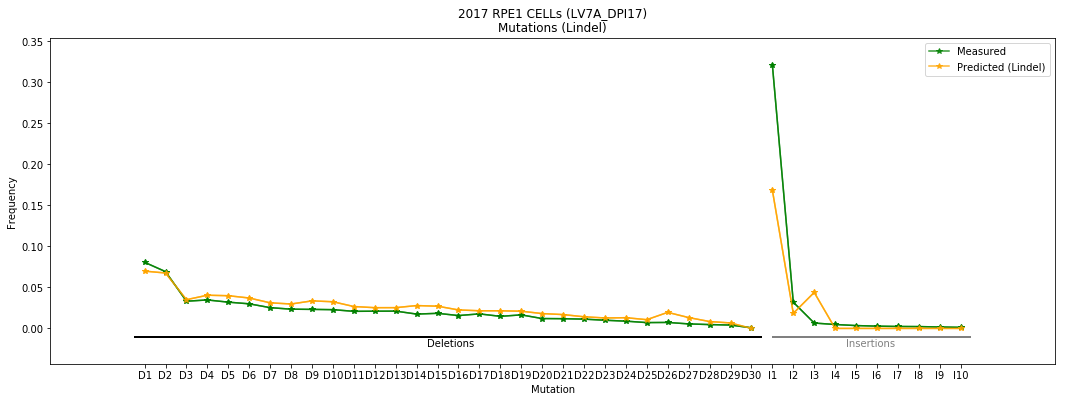

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import scipy.stats
import pylab
final_ground_dict=make_final_ground_dict(final_actual_df,keys)
final_pred_dict=make_final_pred_dict(final_sum_3k_perc,keys)

pickle.dump(final_ground_dict, open( "final_ground_dict_RPE.p", "wb" ) )
pickle.dump(final_pred_dict, open( "final_pred_dict_RPE.p", "wb" ) )

fig, ax = plt.subplots(figsize=(18,6))
 
fig.canvas.draw()

y1=list(final_ground_dict.values()) #actual
y2=list(final_pred_dict.values()) #pred
xrng = [x for x in range(0,40)]

plt.plot(xrng[0:30], y1[0:30], color='g', alpha = 0.8, marker = "*")
plt.plot(xrng[0:30], y2[0:30], color='orange', alpha = 0.8, marker = "*")
plt.plot(xrng[30:], y1[30:], color='g', alpha = 0.8, marker = "*")
plt.plot(xrng[30:], y2[30:], color='orange', alpha = 0.8, marker = "*")

## Add title, axes and legends
plt.xlabel('Mutation')
plt.ylabel('Frequency')
plt.title('2017 RPE1 CELLs (LV7A_DPI17)\nMutations (Lindel)')
plt.gca().legend(('Measured','Predicted (Lindel)'))
 
## Axis ticks and interval
plt.xticks(xrng)
labels=list(final_ground_dict.keys())
ax.set_xticklabels(labels)
 
## Add information about deletions and insertions
lines = [[(-0.5, -0.01 ), (29.5, -0.01)], [(30, -0.01 ), (39.5, -0.01)]]
lc = mc.LineCollection(lines, colors= ["black","grey"], linewidths=2)
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
 
plt.text(13.5, -0.0215, "Deletions", color = "black")
plt.text(33.5, -0.0215, "Insertions", color = "grey")


# plot data (note: the order of this is important to properly depict legend)
plt.plot(xrng[0:30], y1[0:30], color='g', alpha = 0.8, marker = "*")
plt.plot(xrng[0:30], y2[0:30], color='orange', alpha = 0.8, marker = "*")
plt.plot(xrng[30:], y1[30:], color='g', alpha = 0.8, marker = "*")
plt.plot(xrng[30:], y2[30:], color='orange', alpha = 0.8, marker = "*")

In [41]:
pickle.load( open( "final_ground_dict_RPE.p", "rb" ) )
pickle.load( open( "final_pred_dict_RPE.p", "rb" ) )
pickle.load( open( "final_ground_dict.p", "rb" ) )
pickle.load( open( "final_pred_dict.p", "rb" ) )

pickle.load( open( "final_ground_dict_RPE.p", "rb" ) )
#pickle.load( open( "final_ground_dict.p", "rb" ) )


#'D15': 0.0271008042316334,
# 'D15': 0.02704189049583329,

# 'D15': 0.02314706138685161,
# 'D15': 0.0183968027559342,


{'D1': 0.0806067916705526,
 'D2': 0.0692137348585463,
 'D3': 0.03316231763425306,
 'D4': 0.034706604608612815,
 'D5': 0.03201292452213703,
 'D6': 0.029984189605815094,
 'D7': 0.02532268254424912,
 'D8': 0.023448318107040258,
 'D9': 0.023204019044377796,
 'D10': 0.022866219993450787,
 'D11': 0.020827696908820147,
 'D12': 0.02098669080795528,
 'D13': 0.021078924292355066,
 'D14': 0.01748629882841379,
 'D15': 0.0183968027559342,
 'D16': 0.01569191819575274,
 'D17': 0.017711842058306823,
 'D18': 0.014731196709083664,
 'D19': 0.016505139646316253,
 'D20': 0.012030690439143937,
 'D21': 0.011862286280111399,
 'D22': 0.011332690199039328,
 'D23': 0.0099647979336322,
 'D24': 0.008854792410790182,
 'D25': 0.007102969031644972,
 'D26': 0.007293628931976143,
 'D27': 0.005490981978392196,
 'D28': 0.004691395871855168,
 'D29': 0.004095076826430838,
 'D30': 0.0007760570522132076,
 'I1': 0.3213461545650445,
 'I2': 0.03195780096280301,
 'I3': 0.006545237499128501,
 'I4': 0.004784517951708354,
 'I5': 0.

In [31]:
#returns inframe as well as out of frame mutation percentages as well
def frame_muts_pred(num_iterations):
    Modified_Input=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")

    list1=[]
    list2=[]
    for i in tqdm(range(num_iterations)):
        a=pickle.load( open(Modified_Input['ID'][i]+'_'+'RPE_indel%.p', "rb" ) )
        inframe_per_oligo=(list(a.values())[2]+list(a.values())[5]+list(a.values())[8]+list(a.values())[11]+list(a.values())[14]+list(a.values())[17]+list(a.values())[20]+list(a.values())[23]+list(a.values())[26]+list(a.values())[29]+list(a.values())[32]+list(a.values())[35]+list(a.values())[38])/100
        outframe_per_oligo=1-inframe_per_oligo
        list1.append(inframe_per_oligo)
        list2.append(outframe_per_oligo)
    return(list1,list2)
    
inframe_per_exp_RPE,outframe_per_oligo=frame_muts_pred(3000)
#pickle.dump(inframe_per_exp_RPE, open( "inframe_pred_RPE.p", "wb" ) )

inframe_per_exp_RPE
#pickle.dump(inframe_per_exp_RPE, open( "inframe_pred_RPE.p", "wb" ) )

#pickle.load( open('inframe_pred.p', "rb" ) )

# 0.2075745543,
#  0.11519258590000002,
#  0.2504771132,


100%|██████████| 3000/3000 [00:02<00:00, 1133.14it/s]


[0.2634381634,
 0.2504771132,
 0.34170888610000005,
 0.2863025126,
 0.24747196059999996,
 0.3197749012999999,
 0.2723438295,
 0.17472016180000005,
 0.15340293010000003,
 0.26915408510000005,
 0.2524184968,
 0.19384116029999998,
 0.2245040587,
 0.2252971983,
 0.20449938809999998,
 0.1936078072,
 0.6860608467,
 0.2007913198,
 0.24304644490000002,
 0.3273770575,
 0.33020764309999995,
 0.36232466529999996,
 0.2608019304,
 0.21327772820000004,
 0.1888430665,
 0.24641881909999996,
 0.1966625381,
 0.30135082129999996,
 0.2708243133,
 0.4358069946,
 0.2711809402,
 0.1781446183,
 0.3658743516,
 0.3612912036,
 0.23344782039999998,
 0.4584363544000001,
 0.2585578106,
 0.30231919430000004,
 0.301936895,
 0.31881326730000004,
 0.2153606975,
 0.3815491047999999,
 0.2336862056,
 0.3209190683,
 0.3378062055,
 0.1454360801,
 0.1725692952,
 0.1470651602,
 0.2467309943,
 0.40701727889999995,
 0.41556990050000003,
 0.18762356730000002,
 0.2551125422,
 0.44078027299999994,
 0.4716213536,
 0.1401367257,
 0.

In [45]:
inframe_per_exp_RPE[660] #0.2222393798

inframe_per_exp_RPE[80] #0.24759660879999998
inframe_per_exp_RPE[659]


0.2222393798

In [46]:
#**popped index 80 and 660 from list toremove oligos not present in ground truth

#inframe_per_exp_RPE.pop(80)
inframe_per_exp_RPE.pop(659)


#pickle.dump(inframe_per_exp_RPE, open( "inframe_pred_RPE.p", "wb" ) )


0.2222393798

In [47]:
#returns inframe percentages from ground truth

ground_truth_indelsummary=pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t")
#ground_truth_indelsummary['D3'][i]+ground_truth_indelsummary['D6'][i]+ground_truth_indelsummary['D9'][i]+ground_truth_indelsummary['D12'][i]+ground_truth_indelsummary['D15'][i]+ground_truth_indelsummary['D18'][i]+ground_truth_indelsummary['D21'][i]+ground_truth_indelsummary['D24'][i]+ground_truth_indelsummary['D27'][i]+ground_truth_indelsummary['D30'][i]+ground_truth_indelsummary['I3'][i]+ground_truth_indelsummary['I6'][i]+ground_truth_indelsummary['I9'][i]

def frame_muts_ground(num_iterations):
    #Modified_Input=pd.read_csv("Sampled_test_Oligos_modified.txt", sep="\t")
    ground_truth_indelsummary=pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t")
    list1=[]
    list2=[]
    for i in tqdm(range(num_iterations)):
        
        inframe_per_oligo=(ground_truth_indelsummary['D3'][i]+ground_truth_indelsummary['D6'][i]+ground_truth_indelsummary['D9'][i]+ground_truth_indelsummary['D12'][i]+ground_truth_indelsummary['D15'][i]+ground_truth_indelsummary['D18'][i]+ground_truth_indelsummary['D21'][i]+ground_truth_indelsummary['D24'][i]+ground_truth_indelsummary['D27'][i]+ground_truth_indelsummary['D30'][i]+ground_truth_indelsummary['I3'][i]+ground_truth_indelsummary['I6'][i]+ground_truth_indelsummary['I9'][i])/sum(ground_truth_indelsummary.loc[i])
        outframe_per_oligo=1-inframe_per_oligo
        list1.append(inframe_per_oligo)
        list2.append(outframe_per_oligo)
    return(list1,list2)


In [48]:
#get inframe ground truth

inframe_per_exp_ground,outframe_per_oligo_ground=frame_muts_ground(2998)
pickle.dump(inframe_per_exp_ground, open( "inframe_ground_RPE.p", "wb" ) )

len(outframe_per_oligo_ground)

  5%|▍         | 149/2998 [00:00<00:01, 1483.70it/s]/cluster/JideEzike/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
100%|██████████| 2998/2998 [00:01<00:00, 2359.86it/s]


2998

nan


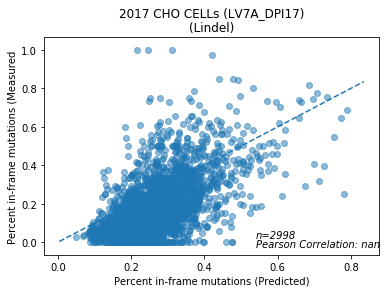

In [49]:
y=inframe_per_exp_ground
x=inframe_per_exp_RPE
#x=outframe_per_oligo
#y=outframe_per_oligo_ground

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

corr = scipy.stats.pearsonr(x, y)[0]
print(corr)
 
plt.scatter(x, y, alpha = 0.5)
plt.title('2017 CHO CELLs (LV7A_DPI17)\n(Lindel)')
plt.xlabel('Percent in-frame mutations (Predicted)')
plt.ylabel('Percent in-frame mutations (Measured')
abline(slope = 1, intercept = 0)
 
plt.text(0.54, 0.02, "n={0}".format(len(x)), style='italic')
plt.text(0.54, -0.025, "Pearson Correlation: {0}".format(round(corr,3)), style='italic')
#plt.savefig("in_delphi_mutations_correlation.png")
plt.show()


In [51]:
#removing rows 80 and 660  & renumber index
sampled_modified_RPE=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t")
dropped_sampled_modified_RPE=pd.read_csv("sampled_oligos_modified_RPE.txt", sep="\t").drop(80,axis=0).drop(660,axis=0)
#dropped_sampled_modified_RPE['ID'][80]
dropped_sampled_modified_RPE=dropped_sampled_modified_RPE.reset_index()
dropped_sampled_modified_RPE['ID'][80]

'Oligo16123'

In [52]:
def KL(P,Q):
	### Epsilon is used here to avoid conditional code for
	### checking that neither P nor Q is equal to 0. """
	epsilon = 0.00001
	P = np.asarray(P)
	Q = np.asarray(Q)
	P = P+epsilon
	Q = Q+epsilon

	divergence = np.sum(P*np.log(P/Q))
	return divergence


In [53]:
# def Calculate_KL_divergence_per_exp(num_iterations):
#     #Modified_Input=pd.read_csv("Sampled_test_Oligos_modified.txt", sep="\t")
#     Modified_Input=dropped_sampled_modified_RPE
#     ground_truth_indelsummary=pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t")
#     ground_truth_indelsummary=ground_truth_indelsummary[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']]

#     KLDivergence_across_samples=[]
#     for i in tqdm(range(num_iterations)):
#         q_0=pickle.load( open(Modified_Input['ID'][i]+'_'+'RPE_indel%.p', "rb" ))
#         q=np.array(list(q_0.values()))/100
#         p=np.array(list((ground_truth_indelsummary.loc[i])/sum(ground_truth_indelsummary.loc[i])))
#         kl1=KL(p,q)
#         KLDivergence_across_samples.append(kl1)
#     return(KLDivergence_across_samples)


def Calculate_KL_divergence_per_exp(num_iterations):
    #Modified_Input=pd.read_csv("Sampled_test_Oligos_modified.txt", sep="\t")
    Modified_Input=dropped_sampled_modified_RPE
    ground_truth_indelsummary=pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t")
    ground_truth_indelsummary=ground_truth_indelsummary[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']]

    KLDivergence_across_samples=[]
    for i in tqdm(range(num_iterations)):
        q_0=pickle.load( open(Modified_Input['ID'][i]+'_'+'RPE_indel%.p', "rb" ))
        q=np.array(list(q_0.values()))/100
        p=np.array(list(ground_truth_indelsummary.loc[i]))
        kl1=KL(p,q)
        KLDivergence_across_samples.append(kl1)
    return(KLDivergence_across_samples)




In [ ]:
def Calculate_KL_divergence_per_exp(num_iterations):
    Modified_Input=pd.read_csv("Sampled_test_Oligos_modified.txt", sep="\t")
    ground_truth_indelsummary=pd.read_csv('trial03_actual_mutation_frequencies.txt', header = 0, sep = "\t")
    ground_truth_indelsummary=ground_truth_indelsummary[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']]

    KLDivergence_across_samples=[]
    for i in tqdm(range(num_iterations)):
        q_0=pickle.load( open(Modified_Input['ID'][i]+'_'+'indel%.p', "rb" ))
        q=np.array(list(q_0.values()))/100
        p=np.array(list((ground_truth_indelsummary.loc[i])/sum(ground_truth_indelsummary.loc[i])))
        kl1=KL(p,q)
        KLDivergence_across_samples.append(kl1)
    return(KLDivergence_across_samples)

In [54]:
#calculate kl div for 2998 samples
kl_div_RPE_fixed=Calculate_KL_divergence_per_exp(2998)

#pickle.dump(kl_div_RPE_fixed, open( "kl_div_3ksamples_RPE_fixed.p", "wb" ) )


100%|██████████| 2998/2998 [00:03<00:00, 769.68it/s]


In [21]:
q=pickle.load( open('kl_div_3ksamples_RPE.p', "rb" ) )
r=pickle.load(open('kl_div_3ksamples_RPE_fixed.p',"rb"))
q,r

([2.161322708237653,
  1.4281822631155154,
  0.5200746175601171,
  0.8620934918948652,
  0.7220462569662482,
  0.5401119383413084,
  1.4426150456213602,
  2.892276824040178,
  0.7475728923833398,
  0.8172811913890471,
  0.721306868044119,
  0.3872206321364269,
  0.5553606639418069,
  0.8398623109782543,
  0.6451427597995993,
  0.859847035493316,
  0.7915943016695705,
  0.8518243559385439,
  0.9266410105169488,
  0.5825582385678582,
  3.6275698860498644,
  0.8524053982409332,
  2.055285726494083,
  1.6019908425989502,
  1.3868014573334797,
  1.8753882135732654,
  0.49278725269018525,
  0.9109355859133572,
  0.670905899454215,
  1.7065677637951322,
  0.6666711002141239,
  1.0406129579960495,
  0.6048336996958884,
  0.5494949909377841,
  1.2857826114293391,
  0.9020759123002595,
  0.431109138758067,
  0.5044327621044244,
  0.5939743206086519,
  0.9070265259468677,
  0.532430665027838,
  1.6288519905215817,
  0.8349751644946877,
  1.353025986684092,
  0.7932766170427308,
  0.88903821033033

In [42]:
len(kl_div_RPE)
dropped_sampled_modified_RPE['ID'][0]
pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t").iloc[0,:]
ground_truth_indelsummary=pd.read_csv('trial03_RPE_actual_mutation_frequencies.txt', header = 0, sep = "\t")
ground_truth_indelsummary=ground_truth_indelsummary[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']]
np.array(list(ground_truth_indelsummary.iloc[0,:]))

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.2, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. ])

In [69]:
## Calculating KL divergence contribution RPE: 

def Calc_Kl_div_contribution(num_iterations):
    indels=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23','D24','D25','D26','D27','D28','D29','D30','I1','I2','I3','I4','I5','I6','I7','I8','I9','I10']
    contribution_per_exp=dict((i,0) for i in indels)

    #contribution_per_exp=[]
    for i in range(dropped_sampled_modified_RPE.shape[0]):
        pred=np.array((list(pickle.load(open(dropped_sampled_modified_RPE['ID'][i]+'_'+'RPE_indel%.p',"rb")).values())))/100
        ground=np.array(list(ground_truth_indelsummary.iloc[i,:]))
        diff=np.absolute(ground-pred)
        Indel_dict_index=np.argmax(diff)
        contribution_per_exp[indels[Indel_dict_index]]+=1
    return contribution_per_exp

In [71]:
np.array(list(Calc_Kl_div_contribution(2998).values())/100)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [79]:
#qrz=(list(np.array(list(Calc_Kl_div_contribution(2998).values()))/2998))

#pickle.dump(qrz, open( "RPE_KL_contributions.p", "wb" ) )

#making dict instead
qrz=(Calc_Kl_div_contribution(2998))


# pickle.dump(qrz, open( "RPE_KL_contributions_dict.p", "wb" ) )
q_new=list(np.array(list(qrz.values()))/2998)
#pickle.dump(q_new, open( "RPE_KL_contributions_list_Corrected.p", "wb" ) )
sum(q_new)

0.9999999999999999